Librerias

In [1]:
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import sklearn as sk
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import LocalOutlierFactor

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Lectura Dataset

In [2]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [3]:
complete_dataset = pd.read_csv('datasets/properati_argentina_2021.csv')
df = complete_dataset.copy()

### Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

**Ultimas 5 observaciones**

In [5]:
df.tail()

id  start_date    end_date  created_on  \
460149  EWHC/xcODFkeEA0+pPE6Rw==  2021-01-05  2021-01-08  2021-01-05   
460150  txKUq0LjMaORjJQeeqTOfw==  2021-01-05  2021-11-01  2021-01-05   
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460149 -34.599594 -58.588715  Bs.As. G.B.A. Zona Oeste        Tres de Febrero   
460150 -34.582777 -58.545220  Bs.As. G.B.A. Zona Norte     General San Martín   
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

           place_l4 place_l5  place_l6 operation    property_type  \
460149          NaN      NaN       NaN     Venta  Local comercial   
460150  Villa Lynch      NaN       NaN     Venta  Local comercial   
460151          NaN      NaN       NaN     Venta  Local comercial   
460152          NaN      NaN       NaN  Alquiler  Local comercial   
460153          NaN      NaN       NaN     Venta  Local comercial   

        property_rooms  property_bedrooms  property_surface_total  \
460149             NaN                NaN                   113.0   
460150             NaN                NaN                 11580.0   
460151             NaN                NaN                   915.0   
460152             NaN                NaN                     NaN   
460153             1.0                NaN                   243.0   

        property_surface_covered  property_price property_currency  \
460149                     113.0        190000.0               USD   
460150                   11580.0       3500000.0               USD   
460151                     915.0        800000.0               USD   
460152                      15.0             NaN               NaN   
460153                     133.0        160000.0               USD   

                                           property_title  
460149   LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-  
460150                      Nave Industrial - Villa Lynch  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

**Filas y Columnas**

In [6]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 460154 filas y 20 columnas


**Metrica del dataset**

In [7]:
df.describe()

latitud       longitud  place_l6  property_rooms  \
count  419740.000000  419740.000000       0.0   368498.000000   
mean      -34.228570     -59.557066       NaN        3.278053   
std         3.251509       2.905129       NaN        1.870832   
min       -54.832057    -103.219258       NaN        1.000000   
25%       -34.640132     -58.899343       NaN        2.000000   
50%       -34.585122     -58.488309       NaN        3.000000   
75%       -34.423414     -58.404876       NaN        4.000000   
max        42.557773     -35.044991       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count      344113.000000           397813.000000              4.279160e+05   
mean            2.297960              420.601250              9.605005e+03   
std             1.673985             4026.380748              3.440367e+06   
min            -3.000000               -1.000000             -3.000000e+00   
25%             1.000000               50.000000              4.500000e+01   
50%             2.000000               90.000000              7.800000e+01   
75%             3.000000              210.000000              1.700000e+02   
max           390.000000           200000.000000              2.147484e+09   

       property_price  
count    4.421530e+05  
mean     3.063273e+05  
std      4.899613e+06  
min      0.000000e+00  
25%      4.490000e+04  
50%      9.800000e+04  
75%      1.990000e+05  
max      1.500000e+09

**Tipos de datos**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

**Descripción de las columnas**

- type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- place - Campos referidos a la ubicación de la propiedad o del desarrollo.

   - lat - Latitud.

   - lon - Longitud.

   - l1 - Nivel administrativo 1: país.

   - l2 - Nivel administrativo 2: usualmente provincia.

   - l3 - Nivel administrativo 3: usualmente ciudad.

   - l4 - Nivel administrativo 4: usualmente barrio.
- property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).

   - operation - Tipo de operación (Venta, Alquiler).

   - type - Tipo de propiedad (Casa, Departamento, PH).

   - rooms - Cantidad de ambientes (útil en Argentina).

   - bedrooms - Cantidad de dormitorios (útil en el resto de los países).

   - bathrooms - Cantidad de baños.

   - surface_total - Superficie total en m².

   - surface_covered - Superficie cubierta en m².

   - price - Precio publicado en el anuncio.

   - currency - Moneda del precio publicado.

   - price_period - Periodo del precio (Diario, Semanal, Mensual)

   - title - Título del anuncio.

   - description - Descripción del anuncio.
- development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
- status - Estado del desarrollo (Terminado, En construcción, ...)
- name - Nombre del desarrollo.
- short_description - Descripción corta del anuncio.
- description - Descripción del anuncio.


### Filtrado inicial del Dataset

In [9]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]].head()

place_l2 place_l3 property_currency property_type operation
25  Capital Federal      NaN               USD          Casa     Venta
42  Capital Federal     Boca               USD  Departamento     Venta
43  Capital Federal     Boca               USD  Departamento     Venta
49  Capital Federal     Once               USD  Departamento     Venta
51  Capital Federal    Boedo               USD            PH     Venta

#### Tipos de variable

In [10]:
categoricas = ['created_on', 'start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6',
               'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered',
                           None, None, None, None, None, None, None, None]
cuantitativas_continuas = ['latitud', 'longitud', 'property_price', None, None, None, None, None, None, None, None,
                           None]
ordinales = [None, None, None, None, None, None, None, None, None, None, None, None]
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': ordinales,
                     'Cuantitativas Discretas': cuantitativas_discretas,
                     'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

pd.DataFrame(tipos_de_variable)

Categoricas Ordinales   Cuantitativas Discretas  \
0          created_on      None            property_rooms   
1          start_date      None         property_bedrooms   
2            end_date      None    property_surface_total   
3            place_l2      None  property_surface_covered   
4            place_l3      None                      None   
5            place_l4      None                      None   
6            place_l5      None                      None   
7            place_l6      None                      None   
8           operation      None                      None   
9       property_type      None                      None   
10  property_currency      None                      None   
11     property_title      None                      None   

     Cuantitativas Continuas  
0             property_rooms  
1          property_bedrooms  
2     property_surface_total  
3   property_surface_covered  
4                       None  
5                       None  
6                       None  
7                       None  
8                       None  
9                       None  
10                      None  
11                      None

**Separacion en Train y Test**

Separamos el dataset.

Datos de entrenamiento = 80%

Datos de Testing = 20%

Con el 80% entrenaremos a los modelos y con el 20% testearemos que los modelos estén funcionando como se espera.

Realizamos la separación antes de comenzar a trabajar con los datos para que durante la etapa de entrenamiento no se conozcan los mismo ya que luego se usarán para testear y así se podrá predecir de forma adecuada.

In [11]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(ds_filtrado, test_size=0.2)

In [12]:
dias = pd.to_datetime(ds_train[ds_train.end_date != '9999-12-31']['end_date']) - pd.to_datetime(
    ds_train[ds_train.end_date != '9999-12-31']['start_date'])
dias.describe()

count                         71300
mean     74 days 07:47:58.182328191
std      84 days 01:35:19.950209038
min                 0 days 00:00:00
25%                16 days 00:00:00
50%                51 days 00:00:00
75%                99 days 00:00:00
max               618 days 00:00:00
dtype: object

In [13]:
ds_train.loc[ds_train.end_date == '9999-12-31', 'end_date'] = pd.to_datetime(
    ds_train[ds_train.end_date == '9999-12-31']['start_date']) + dias.mean()
ds_train.end_date

246905                       2022-02-20
214507                       2022-01-27
410704                       2021-04-20
137149                       2021-06-30
310802                       2021-09-02
                      ...              
169912                       2021-07-31
192135    2021-09-23 07:47:58.182328191
449809                       2022-02-09
87771                        2022-01-27
72569                        2021-06-19
Name: end_date, Length: 75399, dtype: object

In [14]:
## Train
new_ds = ds_train.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True)
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True)
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True)
ds_train = new_ds.copy()
ds_train.dtypes

## Test
new_test_ds = ds_test.copy()
new_test_ds.start_date = pd.to_datetime(ds_train.start_date, infer_datetime_format=True)
new_test_ds.end_date = pd.to_datetime(ds_train.end_date, infer_datetime_format=True)
new_test_ds.created_on = pd.to_datetime(ds_train.created_on, infer_datetime_format=True)
ds_test = new_test_ds.copy()
ds_test.dtypes

id                                  object
start_date                  datetime64[ns]
end_date                    datetime64[ns]
created_on                  datetime64[ns]
latitud                            float64
longitud                           float64
place_l2                            object
place_l3                            object
place_l4                            object
place_l5                            object
place_l6                           float64
operation                           object
property_type                       object
property_rooms                     float64
property_bedrooms                  float64
property_surface_total             float64
property_surface_covered           float64
property_price                     float64
property_currency                   object
property_title                      object
dtype: object

#### Variables Cuantitativas: medidas de resumen

In [15]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
cuantitativas_filtradas = list(filter(lambda element: element != None, cuantitativas))
description_quantitatives = ds_train[cuantitativas_filtradas].describe()

quantitative_mode = ds_train[cuantitativas_filtradas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

description_quantitatives.rename(index={"25%": "quartile 1", "50%": "median", "75%": "quartile 3"}, inplace=True)
description_quantitatives

property_rooms  property_bedrooms  property_surface_total  \
count         74555.000000       66693.000000            71469.000000   
mean              2.823781           2.013570              108.302593   
std               1.429397           1.141786              832.710242   
min               1.000000          -1.000000               10.000000   
quartile 1        2.000000           1.000000               45.000000   
median            3.000000           2.000000               65.000000   
quartile 3        4.000000           3.000000              105.000000   
max              40.000000          70.000000           100068.000000   
mode              3.000000           1.000000               50.000000   

            property_surface_covered       latitud      longitud  \
count                   72705.000000  72389.000000  72389.000000   
mean                       88.385297    -34.591512    -58.448986   
std                      1008.853422      0.178217      0.278455   
min                         1.000000    -53.788624    -71.471192   
quartile 1                 40.000000    -34.616044    -58.466524   
median                     58.000000    -34.595838    -58.438933   
quartile 3                 88.000000    -34.577474    -58.408862   
max                    217000.000000    -24.219827    -55.496357   
mode                       40.000000    -34.541250    -58.472966   

            property_price  
count         7.539900e+04  
mean          2.256974e+05  
std           3.186710e+05  
min           5.000000e+03  
quartile 1    9.500000e+04  
median        1.440000e+05  
quartile 3    2.360000e+05  
max           2.140000e+07  
mode          1.100000e+05

#### Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.


In [16]:
qualitative_dataset = ds_train[categoricas]

dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

#### Análisis gráfico de las distribuciones de las variables

**Distribución de fechas**

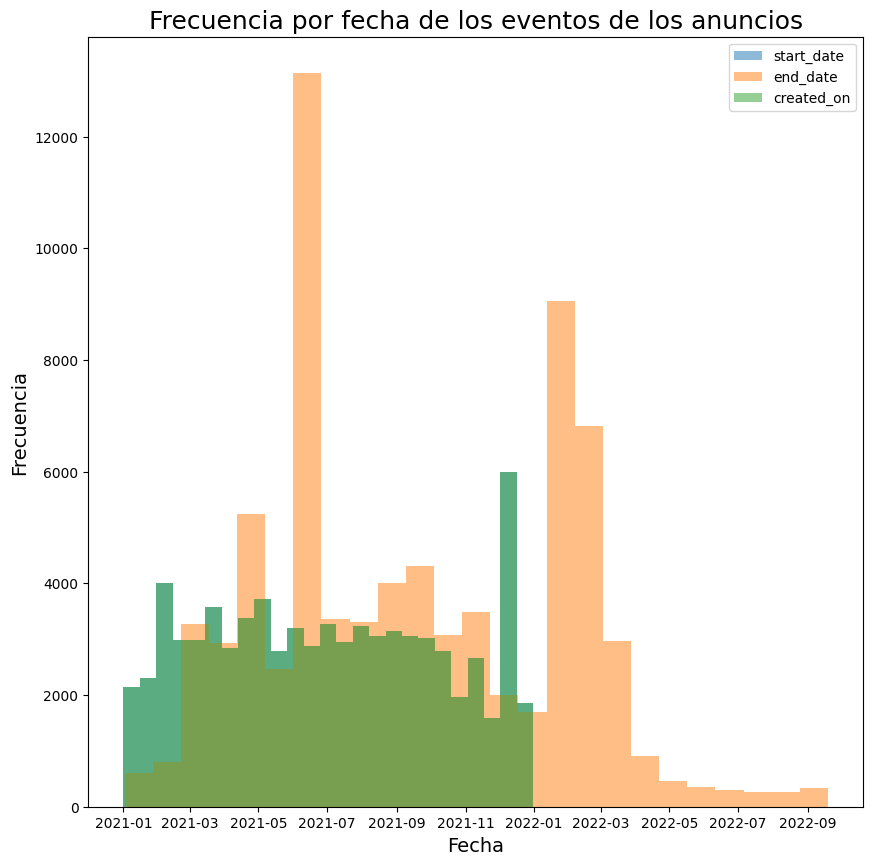

In [17]:
plt.figure(figsize=(10, 10))
plt.hist(ds_train.start_date, bins=25, alpha=0.5, label="start_date")
plt.hist(ds_train.end_date, bins=25, alpha=0.5, label="end_date")
plt.hist(ds_train.created_on, bins=25, alpha=0.5, label="created_on")
plt.xlabel("Fecha", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Frecuencia por fecha de los eventos de los anuncios", size=18)
plt.legend(loc='upper right')

**Distribución de barrios**

In [18]:
top25 = ds_train['place_l3'].value_counts().head(25)

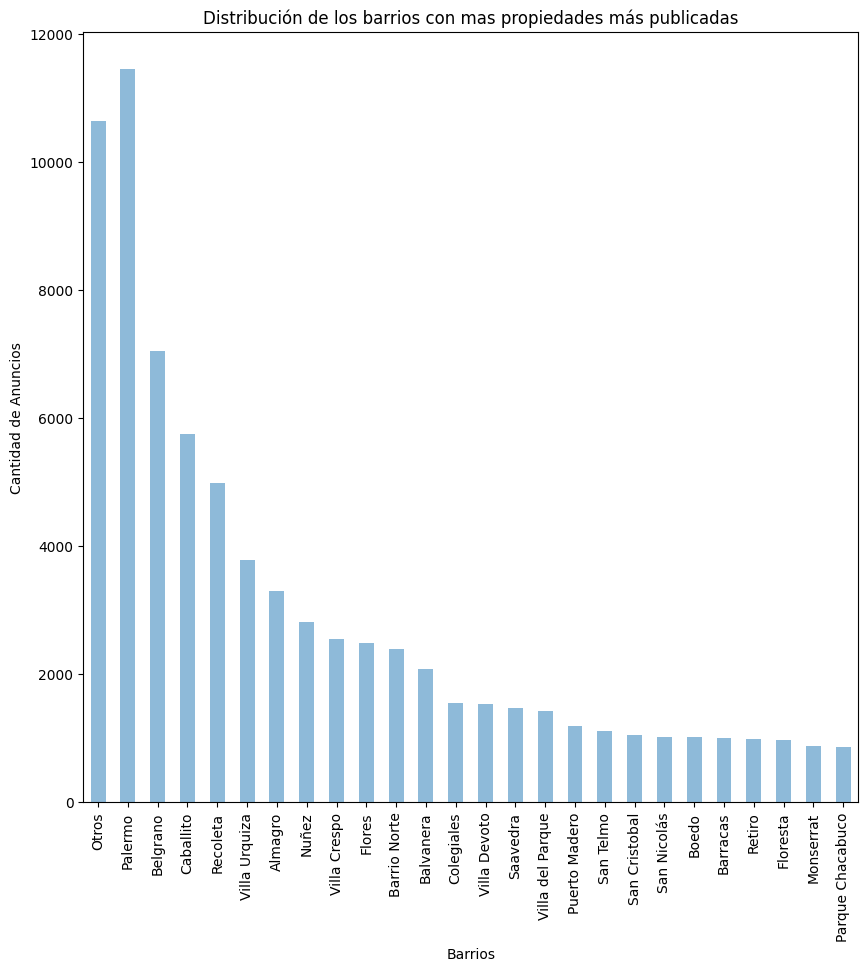

In [19]:
ds_otros_barrios = ds_train[~ds_train['place_l3'].isin(
    top25.index)]  # tomamos solo con las observaciones que no pertenecen al top 25 de barrios
frecuencia_otras = ds_otros_barrios.shape[0]
otras = pd.Series(data=[frecuencia_otras], index=["Otros"])
distribucion_por_barrios = pd.concat([otras, top25])

ax = distribucion_por_barrios.plot.bar(alpha=0.5,
                                       title="Distribución de los barrios con mas propiedades más publicadas",
                                       xlabel="Barrios", ylabel="Cantidad de Anuncios", figsize=(10, 10))

**Distribución de tipos de propiedad**

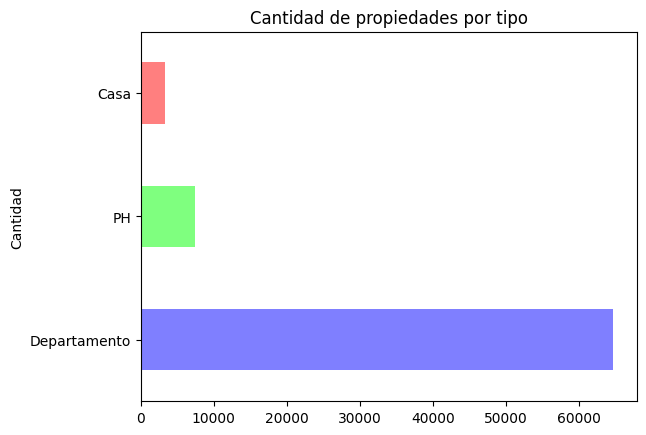

In [20]:
colores = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
grf = ds_train['property_type'].value_counts().plot.barh(alpha=0.5, color=colores,
                                                         title="Cantidad de propiedades por tipo", ylabel="Cantidad")

**Distribución de latitud y longitud**

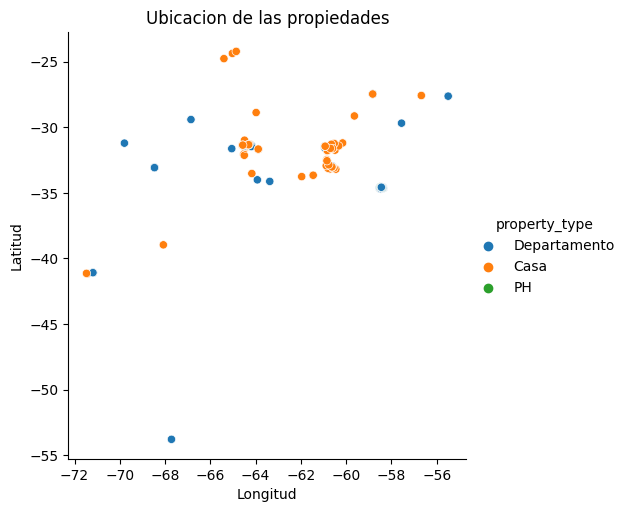

In [21]:

sns.relplot(data=ds_train, x="longitud", y="latitud", hue="property_type").set(title="Ubicacion de las propiedades",
                                                                               xlabel='Longitud', ylabel='Latitud')

**Distribución de habitaciones y baños**

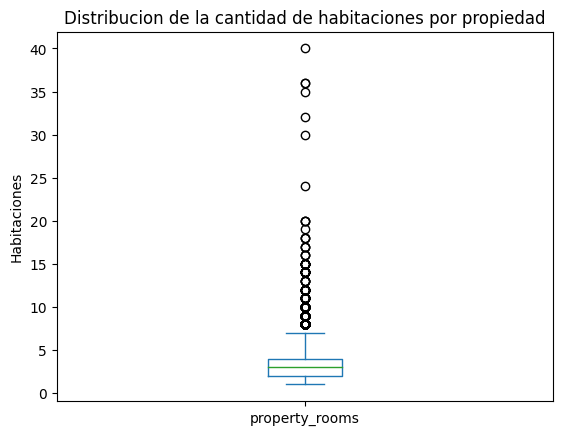

In [22]:
grf = ds_train.property_rooms.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad",
                                       ylabel="Habitaciones")

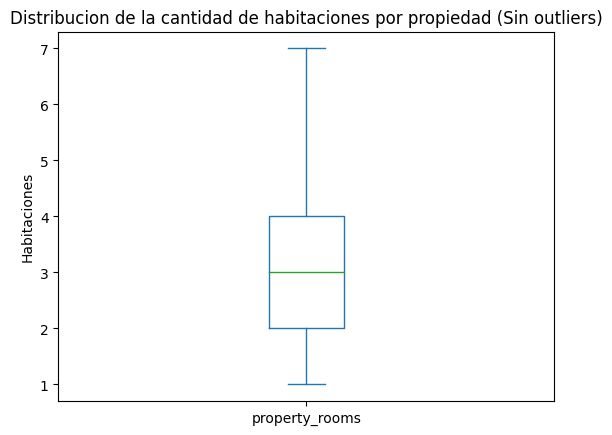

In [23]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_rooms_filtrado = ds_train[ds_train.property_rooms <= max].property_rooms
grf = property_rooms_filtrado.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad (Sin outliers)",
                                       ylabel="Habitaciones")

<AxesSubplot: title={'center': 'Distribucion de la cantidad de baños por propiedad'}, ylabel='Baños'>

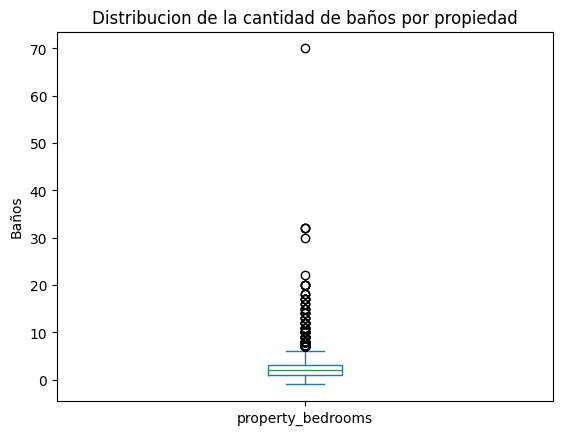

In [24]:
ds_train.property_bedrooms.plot.box(title="Distribucion de la cantidad de baños por propiedad", ylabel="Baños")


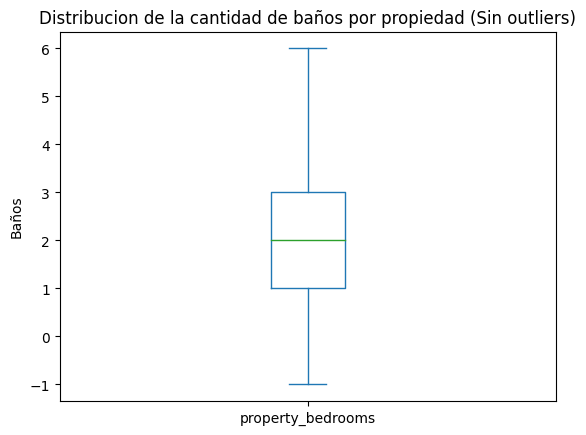

In [25]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_bedrooms_filtrado = ds_train[ds_train.property_bedrooms < max].property_bedrooms
grf = property_bedrooms_filtrado.plot.box(title="Distribucion de la cantidad de baños por propiedad (Sin outliers)",
                                          xlabel=" ", ylabel="Baños")

**Distribución de precio**

In [26]:
print(f"La mediana del precio es: {ds_train.property_price.median()}")

La mediana del precio es: 144000.0


<AxesSubplot: title={'center': 'Distribucion de los precios de las propiedades'}, ylabel='Rango de precios'>

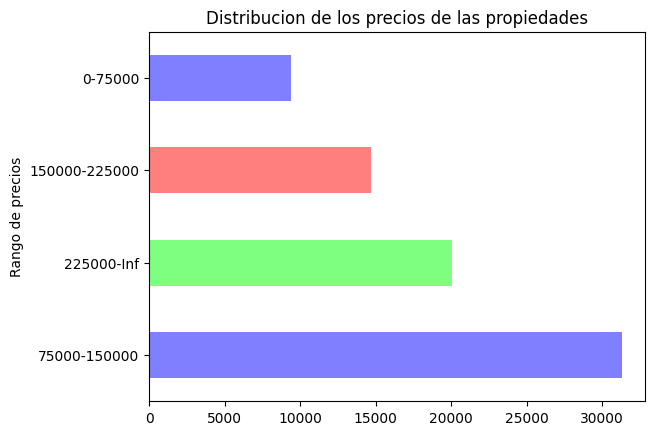

In [27]:
# Tomamos valores alrededor de la mediana
property_price_grouped = pd.cut(ds_train.property_price, bins=[0, 75000, 150000, 225000, float("inf")],
                                labels=["0-75000", "75000-150000", "150000-225000", "225000-Inf"], include_lowest=True)
property_price_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                title="Distribucion de los precios de las propiedades",
                                                xlabel="Rango de precios", ylabel="Frecuencia")

**Distribución de superficie total y cubierta**

<AxesSubplot: >

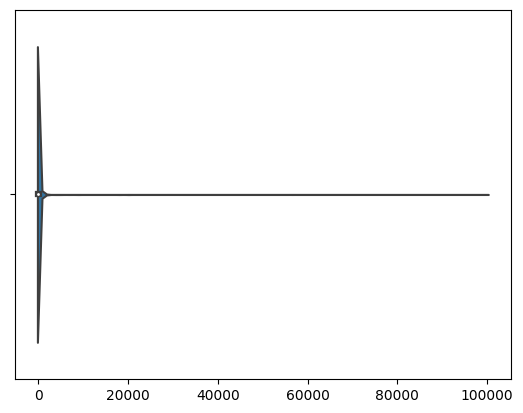

In [28]:
sns.violinplot(ds_train.property_surface_total.values)

<AxesSubplot: >

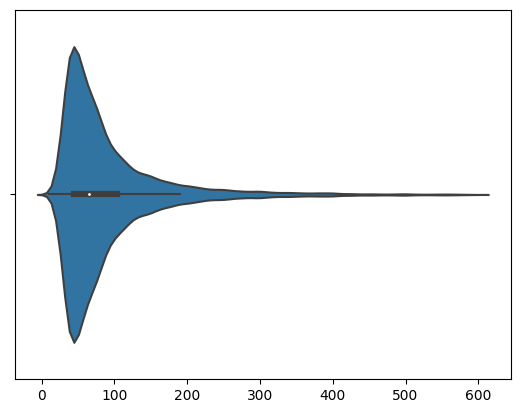

In [29]:
ds_surface_sin_outliers = ds_train[ds_train.property_surface_total < 600]
sns.violinplot(ds_surface_sin_outliers.property_surface_total.values)

<AxesSubplot: >

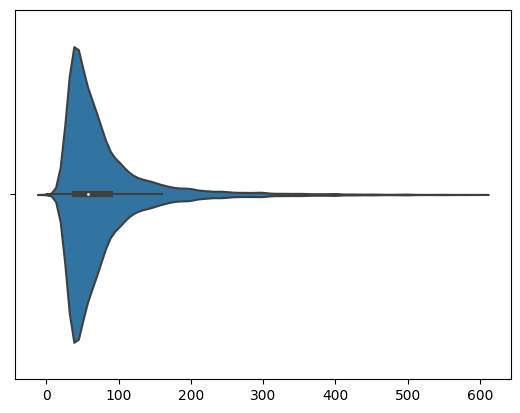

In [30]:
ds_surface_covered_sin_outliers = ds_train[ds_train.property_surface_covered < 600]
sns.violinplot(ds_surface_covered_sin_outliers.property_surface_covered.values)

#### Correlación entre variables

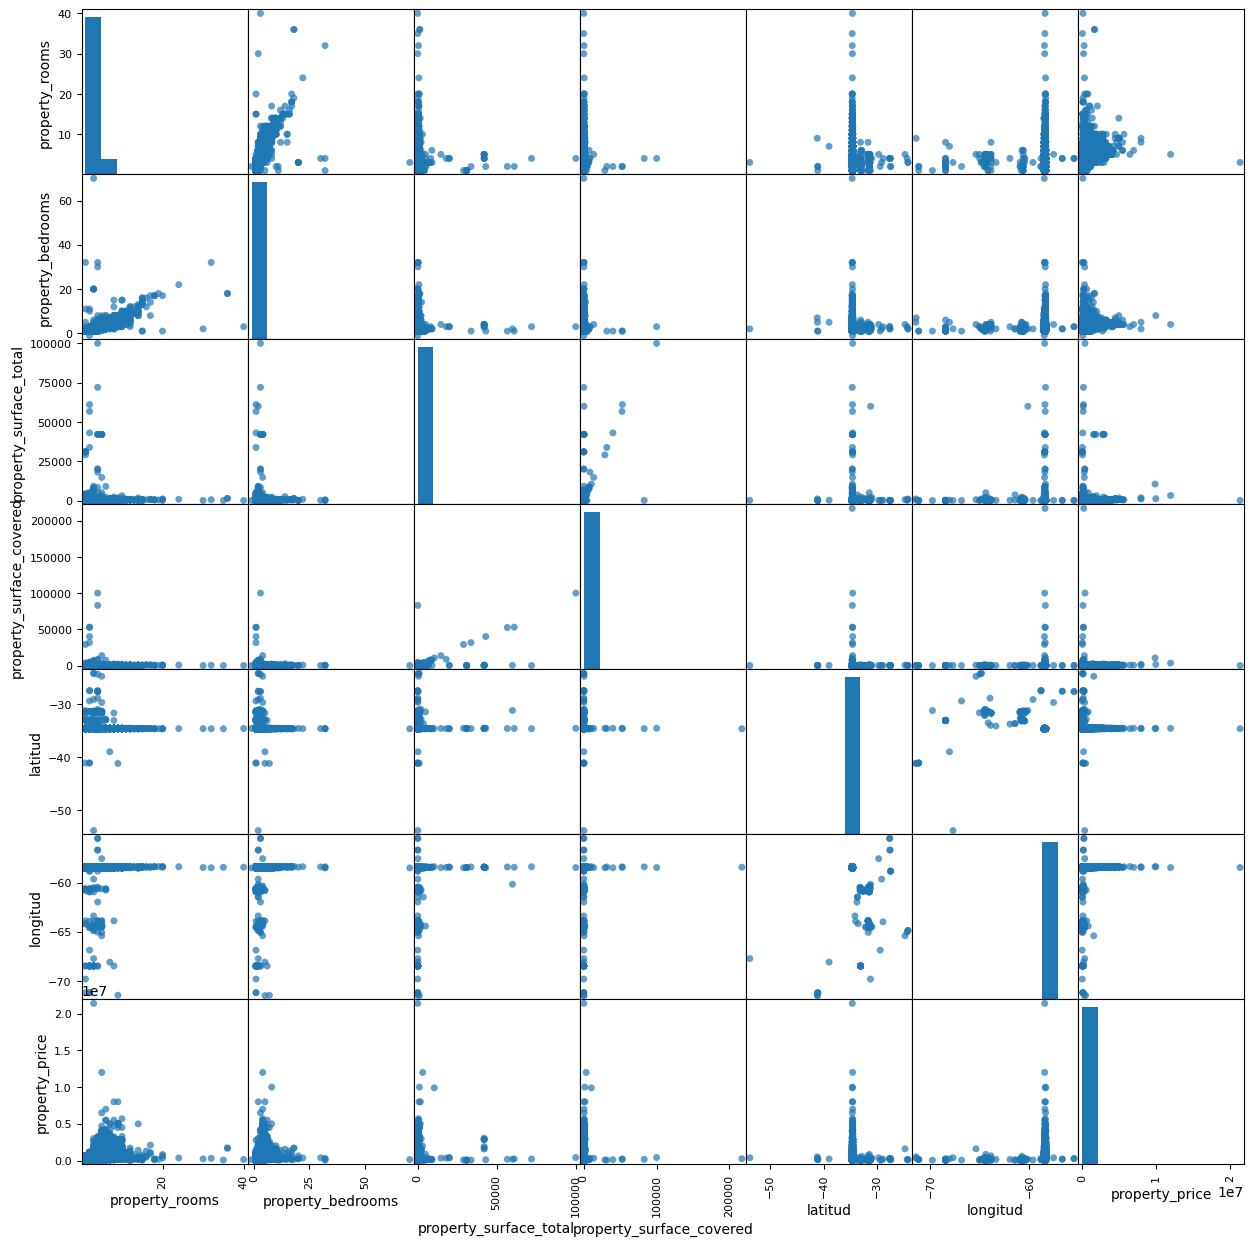

In [31]:
quantitative_dataset = ds_train[cuantitativas_filtradas]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

In [32]:
correlations = quantitative_dataset.corr()
correlations

property_rooms  property_bedrooms  \
property_rooms                  1.000000           0.864829   
property_bedrooms               0.864829           1.000000   
property_surface_total          0.078537           0.078554   
property_surface_covered        0.083653           0.086187   
latitud                         0.003192           0.001487   
longitud                       -0.008525          -0.008546   
property_price                  0.486842           0.421862   

                          property_surface_total  property_surface_covered  \
property_rooms                          0.078537                  0.083653   
property_bedrooms                       0.078554                  0.086187   
property_surface_total                  1.000000                  0.577681   
property_surface_covered                0.577681                  1.000000   
latitud                                 0.032564                  0.001979   
longitud                               -0.018128                 -0.000974   
property_price                          0.107937                  0.056523   

                           latitud  longitud  property_price  
property_rooms            0.003192 -0.008525        0.486842  
property_bedrooms         0.001487 -0.008546        0.421862  
property_surface_total    0.032564 -0.018128        0.107937  
property_surface_covered  0.001979 -0.000974        0.056523  
latitud                   1.000000 -0.305974        0.017489  
longitud                 -0.305974  1.000000        0.023526  
property_price            0.017489  0.023526        1.000000

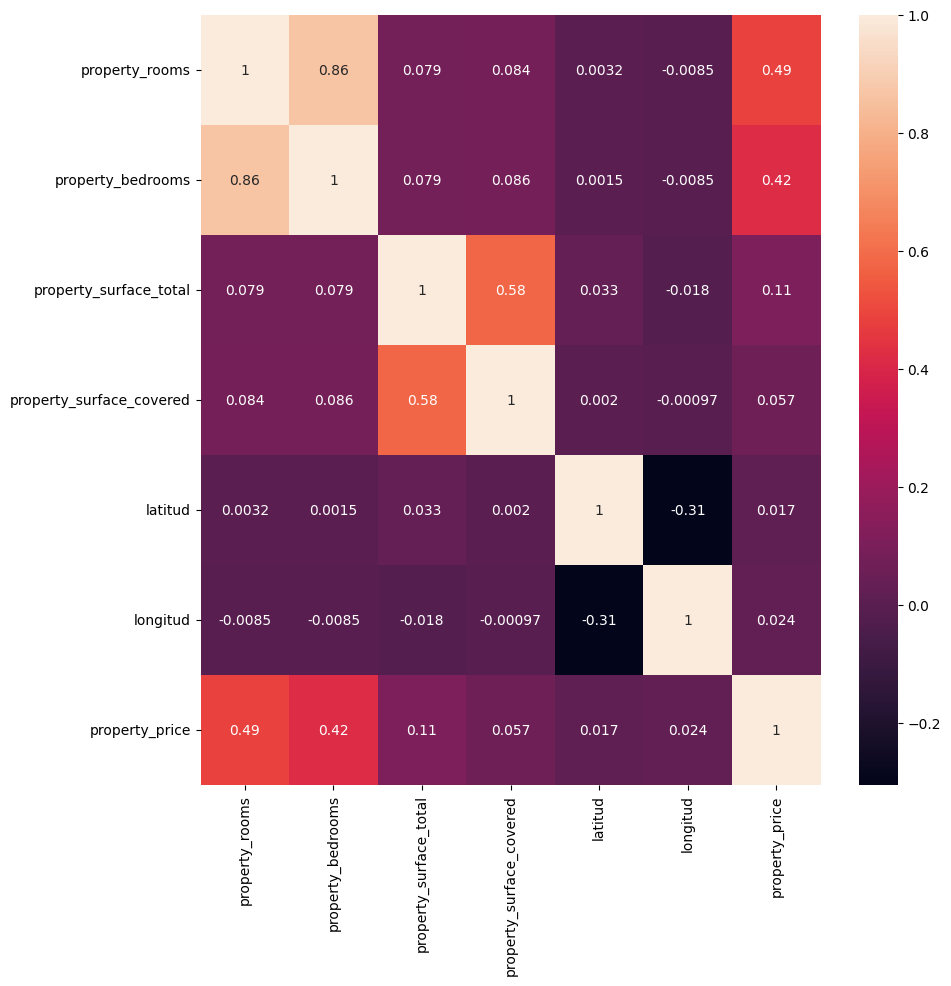

In [33]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(quantitative_dataset.corr(), annot=True)

In [34]:
posible_correlations = [('property_rooms', 'property_bedrooms'), ('property_price', 'property_bedrooms'),
                        ('property_price', 'property_rooms'), ('property_surface_total', 'property_surface_covered'),
                        ('longitud', 'latitud')]
for corr in posible_correlations:
    print(f"Entre {corr[0]} y {corr[1]}:{round(correlations.loc[corr[0], corr[1]], 2)}")

Entre property_rooms y property_bedrooms:0.86
Entre property_price y property_bedrooms:0.42
Entre property_price y property_rooms:0.49
Entre property_surface_total y property_surface_covered:0.58
Entre longitud y latitud:-0.31


### Análisis de valores faltantes

#### Porcentaje de valores faltantes por columna

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.992095
longitud                      3.992095
place_l2                      0.000000
place_l3                      0.440324
place_l4                     96.120638
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.119378
property_bedrooms            11.546572
property_surface_total        5.212271
property_surface_covered      3.572992
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


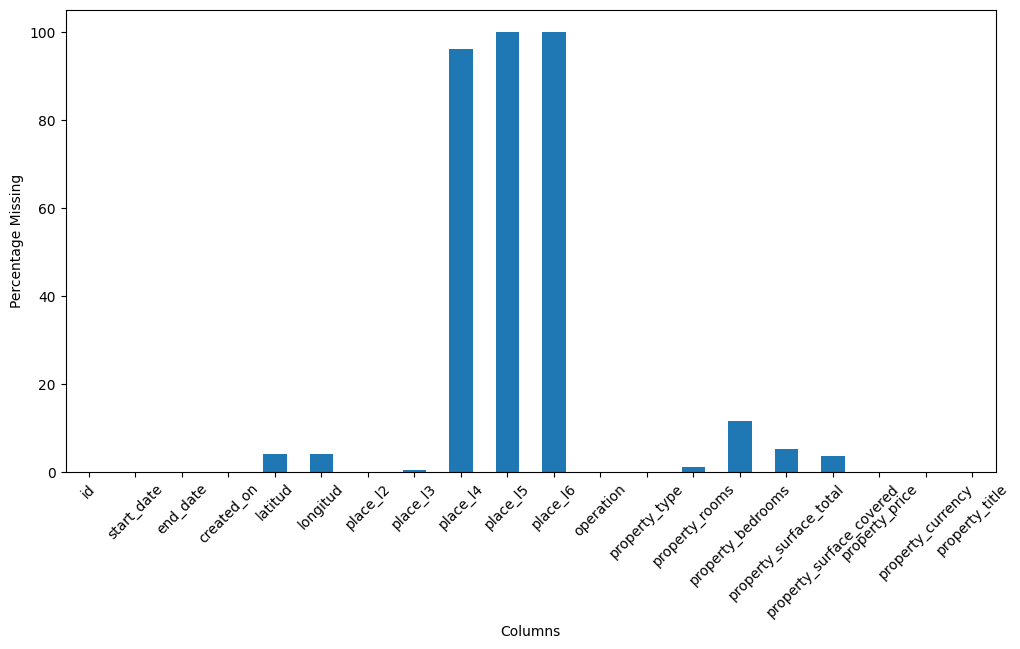

In [35]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

#### Porcentaje de datos faltantes por fila

<AxesSubplot: >

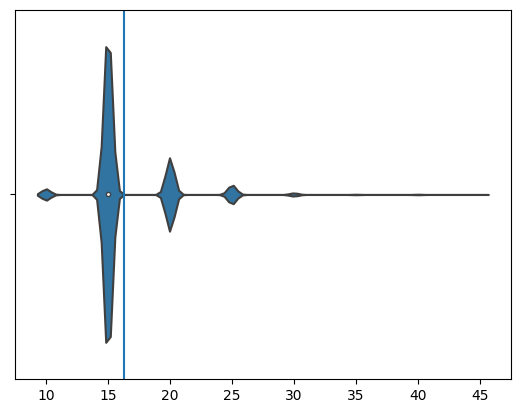

In [36]:
column_count = ds_train.shape[1]
ds_plot = ds_train.T.isna().sum() * 100 / column_count

plt.axvline(ds_plot.mean())
sns.violinplot(ds_plot.values)

In [37]:
def plot_missing_by_column(dataset):
    percent_missing = dataset.isna().sum() * 100 / len(dataset)
    plt.figure(figsize=(12, 6))
    percent_missing.plot.bar(x='index', rot=45)
    plt.xlabel("Columns")
    plt.ylabel("Percentage Missing")
    rows = dataset.shape[0]
    print(dataset.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.992095
longitud                      3.992095
place_l2                      0.000000
place_l3                      0.440324
place_l4                     96.120638
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.119378
property_bedrooms            11.546572
property_surface_total        5.212271
property_surface_covered      3.572992
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


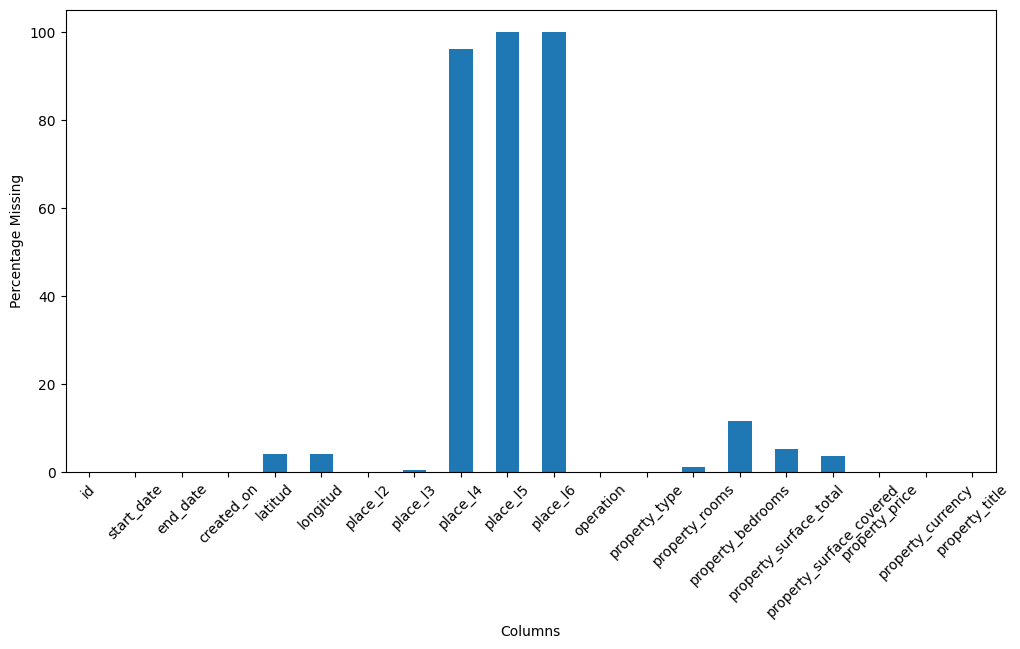

In [38]:
plot_missing_by_column(ds_train)

In [39]:
## Train

ds_train = ds_train.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'], axis=1)

## Test
ds_test = ds_test.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'], axis=1)

### Reparacion de datos faltantes

**Pre Imputacion de latitud y longitud**

latitud    3.992095
dtype: float64


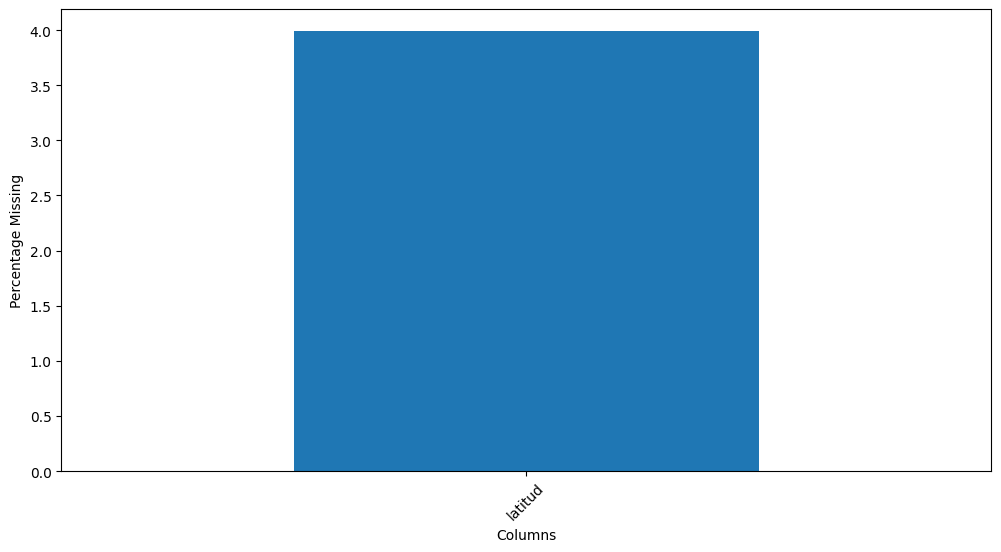

In [40]:
plot_missing_by_column(ds_train[['latitud']])

longitud    3.992095
dtype: float64


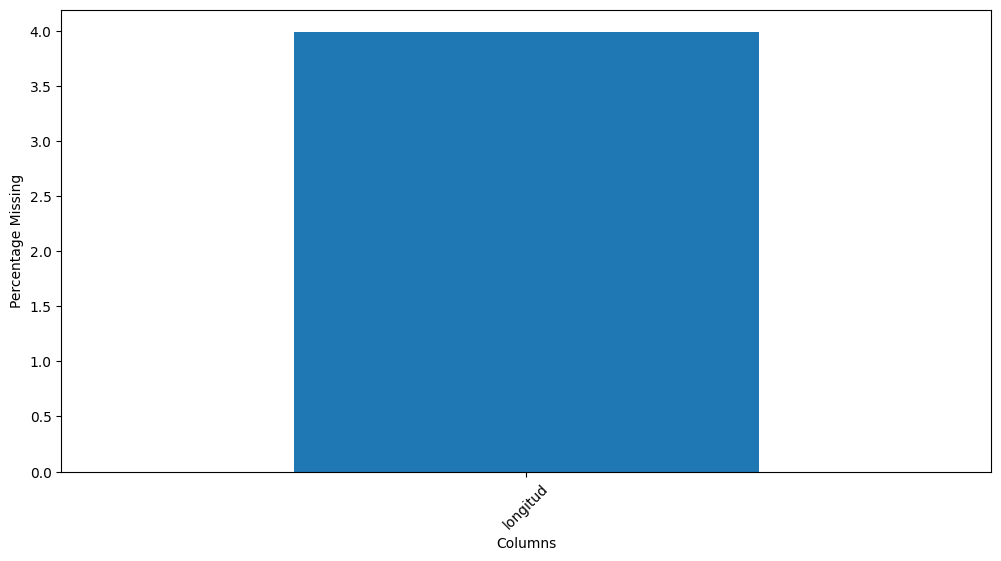

In [41]:
plot_missing_by_column(ds_train[['longitud']])

In [42]:
ds_train[(ds_train.latitud.isna()) & (~ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [43]:
ds_train[(~ds_train.latitud.isna()) & (ds_train.longitud.isna())]


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [44]:
# Train
percentage_train = ds_train[ds_train.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_train[ds_train.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para train representan el {round(percentage_train, 3)}%")

# Test
percentage_test = ds_test[ds_test.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_test[ds_test.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para test representan el {round(percentage_test, 3)}%")

Los datos faltantes en la columna place_l3 para train representan el 4.784%
Los datos faltantes en la columna place_l3 para test representan el 3.611%


In [45]:
# Train
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.latitud.isna()), ['latitud']] = latitud_media
    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.longitud.isna()), ['longitud']] = longitud_media

# Test
for barrio in ds_test.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.latitud.isna()), ['latitud']] = latitud_media
    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.longitud.isna()), ['longitud']] = longitud_media

In [46]:
ds_train[ds_train.latitud.isna()]

id start_date                      end_date  \
97180   tFdkkcTHiZcNpifiq0EJuQ== 2021-11-25 2022-01-12 00:00:00.000000000   
161811  OBEJUlZ0HWzDeQOdVfUQ5g== 2021-10-07 2022-02-17 00:00:00.000000000   
458616  aUqza6tHXiZJXBqZ4bpS9Q== 2021-01-05 2021-03-01 00:00:00.000000000   
433579  zYQ/wZdOxmyZK1asrNN/Ew== 2021-05-04 2021-07-08 00:00:00.000000000   
173649  +SQUH85tiajEW7WKMsBjZQ== 2021-05-11 2021-11-04 00:00:00.000000000   
...                          ...        ...                           ...   
159524  PHefnaqylyBP8DwDutBIIQ== 2021-07-14 2021-10-09 00:00:00.000000000   
265868  ZjdPr6PFzWhUf8R9DKpAsg== 2021-09-02 2021-09-08 00:00:00.000000000   
218048  vRA/0y8xkAUweY9h1T7EzA== 2021-11-30 2022-02-12 07:47:58.182328191   
119233  RXiEnxNZYAZm8tEhsv6sxQ== 2021-03-25 2021-11-04 00:00:00.000000000   
101428  gF45Up7vyzAOFVs11JkikQ== 2021-05-28 2021-06-05 00:00:00.000000000   

        latitud  longitud place_l3 property_type  property_rooms  \
97180       NaN       NaN      NaN          Casa             NaN   
161811      NaN       NaN      NaN  Departamento             2.0   
458616      NaN       NaN      NaN            PH             3.0   
433579      NaN       NaN      NaN  Departamento             2.0   
173649      NaN       NaN      NaN  Departamento             1.0   
...         ...       ...      ...           ...             ...   
159524      NaN       NaN      NaN  Departamento             3.0   
265868      NaN       NaN      NaN  Departamento             3.0   
218048      NaN       NaN      NaN          Casa             NaN   
119233      NaN       NaN      NaN            PH             2.0   
101428      NaN       NaN      NaN          Casa             NaN   

        property_bedrooms  property_surface_total  property_surface_covered  \
97180                 4.0                   814.0                     350.0   
161811                1.0                    39.0                      39.0   
458616                1.0                    60.0                      60.0   
433579                NaN                     NaN                      44.0   
173649                NaN                     NaN                      35.0   
...                   ...                     ...                       ...   
159524                2.0                    85.0                      77.0   
265868                2.0                    73.0                      52.0   
218048                2.0                   100.0                     100.0   
119233                NaN                    70.0                      43.0   
101428                2.0                    80.0                      80.0   

        property_price                                     property_title  
97180         598000.0                                ALQUILER TEMPORARIO  
161811         55000.0  25 DE MAYO AL 700 - APTO PROF LUMIN OPCION COC...  
458616         85000.0              PH FRENTE T/CASA  2/3 AMB. C/ TERRAZA  
433579         63000.0  Departamento en Venta Caba / Buenos Aires (B13...  
173649         90000.0  Departamento en Venta Caba / Buenos Aires (D03...  
...                ...                                                ...  
159524        220000.0            Departamento - Centro (Capital Federal)  
265868         87500.0  Departamento de 73 m2 - 3 ambientes en Alquile...  
218048        318000.0              1 - Ruta 1 km 22 - Marina Santa Lucía  
119233         75000.0         PH en Venta CABA / Buenos Aires (B119 394)  
101428        116780.0                    VENTA DEPARTAMENTO 2 DORMITORIO  

[144 rows x 13 columns]

In [47]:
ds_test[ds_test.latitud.isna()]

id start_date end_date  latitud  longitud  \
389690  BNsc9j62YZWgIQAaQ3vR7w==        NaT      NaT      NaN       NaN   
31871   BKX/oZw0f3iowrtswwdbMA==        NaT      NaT      NaN       NaN   
343265  ivCufxbxoTGNCsW8IF72Iw==        NaT      NaT      NaN       NaN   
6699    v+sxjFL/W8jKIb6kZ/utHQ==        NaT      NaT      NaN       NaN   
308980  yHH+c/hrvj+80CmVIyH+iw==        NaT      NaT      NaN       NaN   
119175  iBAE80MSUHIX96PwAFleUA==        NaT      NaT      NaN       NaN   
435764  6xJbFM++5tur6sP49ajkvQ==        NaT      NaT      NaN       NaN   
445804  BZF7xcpA0wDZYDkuTkn/kA==        NaT      NaT      NaN       NaN   
148947  TV/WQawW0ls6INCB6bqfnQ==        NaT      NaT      NaN       NaN   
389004  CPXCgjqRI/3js9VHc63/ew==        NaT      NaT      NaN       NaN   
447263  a8bAY8SHmXE6yDuJ267Sug==        NaT      NaT      NaN       NaN   
318282  OR5WhCzgKUhaDY9kcPPKug==        NaT      NaT      NaN       NaN   
45963   ZMETeO0JxjkcfJd8S+gZOg==        NaT      NaT      NaN       NaN   
286975  TO9zmGEevDqKAwW4/Ear4w==        NaT      NaT      NaN       NaN   
25      CyZu6IaZgmQYGk8jmPajCg==        NaT      NaT      NaN       NaN   
381103  O4yEtUmMXzMQRltyV5QZ9w==        NaT      NaT      NaN       NaN   
180567  VeUeVZzvn6CG1admtOWObg==        NaT      NaT      NaN       NaN   
172797  dhCe4MZHmoypIcCivygrAg==        NaT      NaT      NaN       NaN   
146411  MbCY2JnbC/KUc446DZLA6w==        NaT      NaT      NaN       NaN   
363969  p6PDh9UYBzTc/nWB1Ye2Xw==        NaT      NaT      NaN       NaN   
221794  SdTmE77MQdPHssmvcO78wg==        NaT      NaT      NaN       NaN   
241085  j/qJT+DHmdmfygjem/H1sw==        NaT      NaT      NaN       NaN   
113348  xSgDIxq5cTDtkRJUFK0wsg==        NaT      NaT      NaN       NaN   
161698  GhIxeNGs5rOvxRVwOhqxfA==        NaT      NaT      NaN       NaN   
39238   3BcwF2I3NzKXZRjhFa46Vw==        NaT      NaT      NaN       NaN   
169680  4uu6b2tzOIdwFnsGO1OIzA==        NaT      NaT      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
389690      NaN  Departamento             3.0                3.0   
31871       NaN  Departamento             NaN                2.0   
343265      NaN  Departamento             7.0                2.0   
6699        NaN          Casa             NaN                3.0   
308980      NaN          Casa             NaN                6.0   
119175      NaN  Departamento             1.0                NaN   
435764      NaN  Departamento             3.0                NaN   
445804      NaN            PH             4.0                NaN   
148947      NaN  Departamento             2.0                1.0   
389004      NaN            PH             3.0                2.0   
447263      NaN  Departamento             2.0                1.0   
318282      NaN          Casa             4.0                NaN   
45963       NaN  Departamento             1.0                NaN   
286975      NaN  Departamento             1.0                NaN   
25          NaN          Casa             4.0                3.0   
381103      NaN  Departamento             3.0                NaN   
180567      NaN  Departamento             4.0                3.0   
172797      NaN            PH             2.0                NaN   
146411      NaN          Casa             4.0                3.0   
363969      NaN          Casa             NaN                1.0   
221794      NaN          Casa             NaN                5.0   
241085      NaN          Casa             NaN                2.0   
113348      NaN  Departamento             4.0                3.0   
161698      NaN  Departamento             3.0                2.0   
39238       NaN  Departamento             4.0                3.0   
169680      NaN  Departamento             2.0                NaN   

        property_surface_total  property_surface_covered  property_price  \
389690                    56.0                       NaN         97000.0   
31871          

In [48]:
## Train
print(
    f"El porcentaje de valores a eliminar train corresponden a un {round((len(ds_train[ds_train.latitud.isna()]) / len(ds_train)), 4)}%")

## Test
print(
    f"El porcentaje de valores a eliminar en test corresponden a un {round((len(ds_test[ds_test.latitud.isna()]) / len(ds_test)), 4)}%")

El porcentaje de valores a eliminar train corresponden a un 0.0019%
El porcentaje de valores a eliminar en test corresponden a un 0.0014%


In [49]:
## Train

ds_train.drop(ds_train[ds_train.latitud.isna()].index, inplace=True)

## Test
ds_test.drop(ds_test[ds_test.latitud.isna()].index, inplace=True)

**Post Imputacion de latitud y longitud**

latitud    0.0
dtype: float64


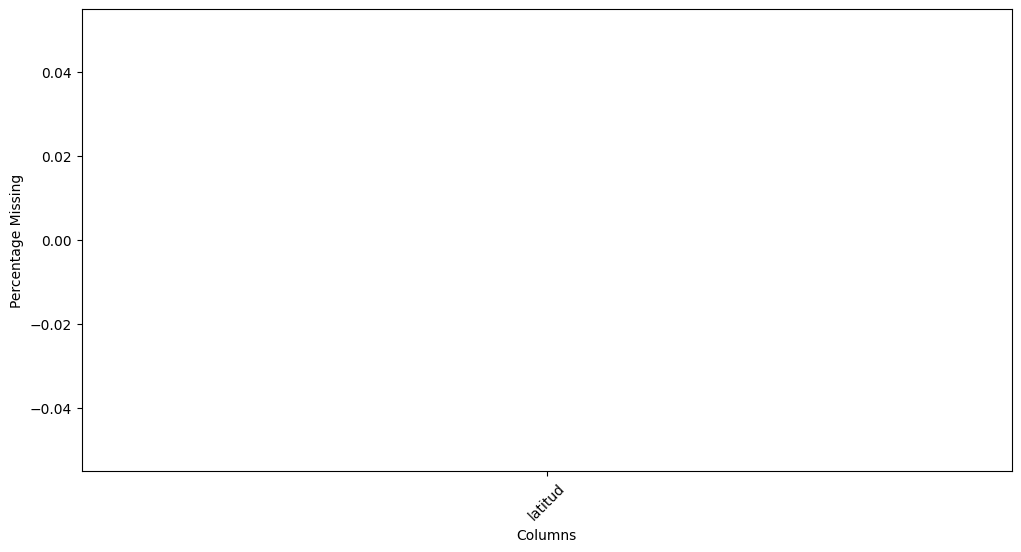

In [50]:
plot_missing_by_column(ds_train[['latitud']])

longitud    0.0
dtype: float64


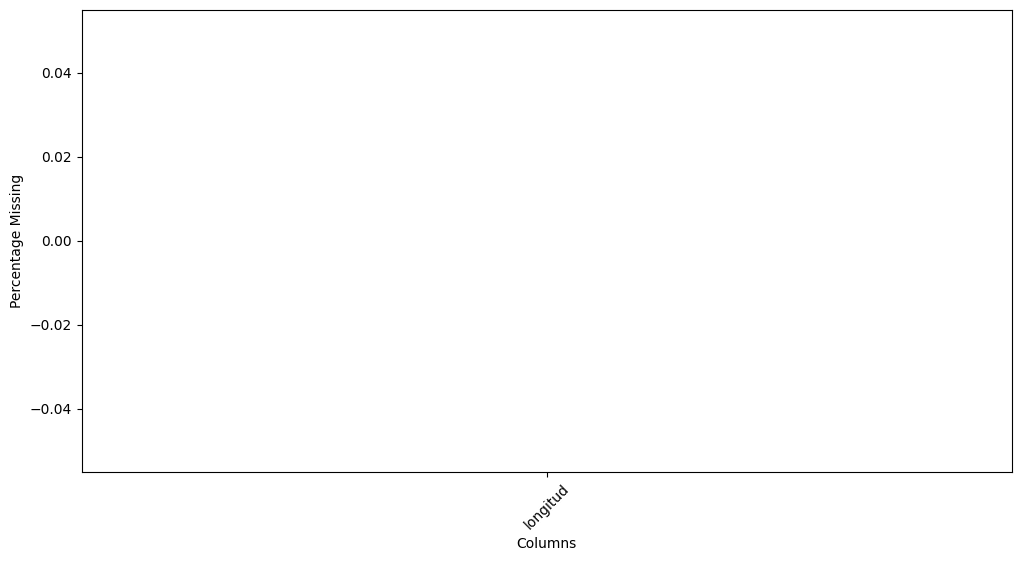

In [51]:
plot_missing_by_column(ds_train[['longitud']])

**Pre imputación de ambientes**

property_rooms    1.089629
dtype: float64


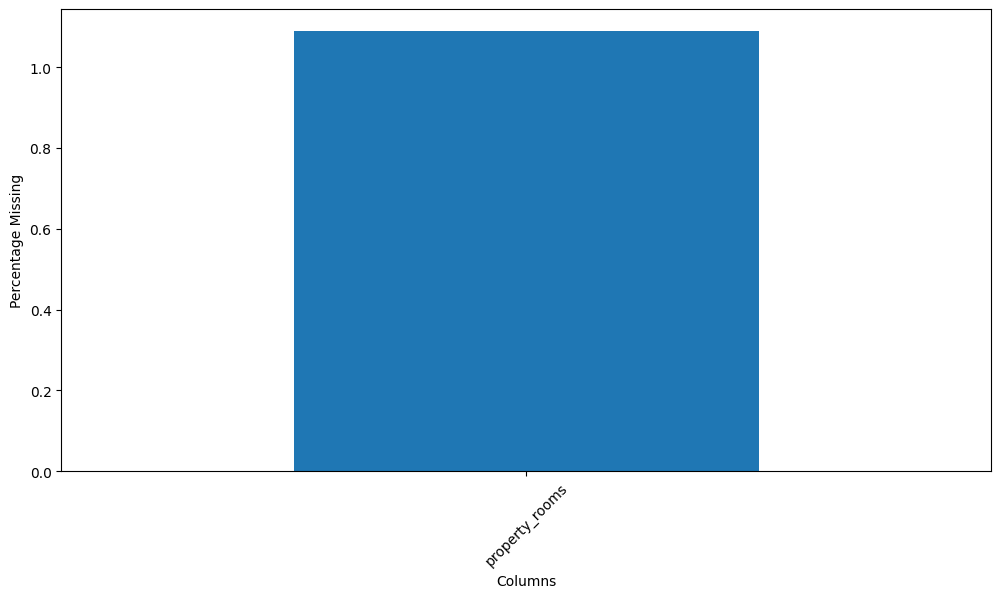

In [52]:
plot_missing_by_column(ds_train[['property_rooms']])

**Reparacion de ambientes faltantes en base al titulo de la propiedad**

In [53]:
def reparacion_amb_por_titulo_prop(ambientes_faltantes, ds):
    print(f"cantidad inicial de ambientes a reparar: {len(ds[ds['property_rooms'].isna()])}")
    regex = re.compile(r"(\d+ \bambientes?\b)")
    regex2 = re.compile(r"(\d+\ \b\bamb\b *)")

    a = {}
    for titulo in ambientes_faltantes.property_title:
        if (len(re.findall(regex, titulo.lower())) > 0):
            a[titulo] = re.findall(regex, titulo.lower())
        if (len(re.findall(regex2, titulo.lower())) > 0):
            a[titulo] = re.findall(regex2, titulo.lower())

    for i in ds.index:
        if ds.loc[i, 'property_title'] in a:
            if len(a[ds.loc[i, 'property_title']]) > 0:
                ds.loc[i, 'property_rooms'] = float("".join(a[ds.loc[i, 'property_title']]).split(" ")[0])
            if ("monoambiente" or "un ambiente" or "mono" or "mono ambiente") in str(
                    ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(1)
            if "dos ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(2)
            if "tres ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(3)
            if "cuatro ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(4)
            if "cinco ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(5)
            if "seis ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(6)

    print(f"cantidad de ambientes faltantes post reparacion: {len(ds[ds['property_rooms'].isna()])}")

In [54]:
datos_a_reparar = ds_train[['property_title', 'property_rooms']].reset_index()

# Train

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_train)

# Test

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_test)

cantidad inicial de ambientes a reparar: 820
cantidad de ambientes faltantes post reparacion: 664
cantidad inicial de ambientes a reparar: 194
cantidad de ambientes faltantes post reparacion: 184


**Post Imputacion de ambientes**

property_rooms    0.882333
dtype: float64


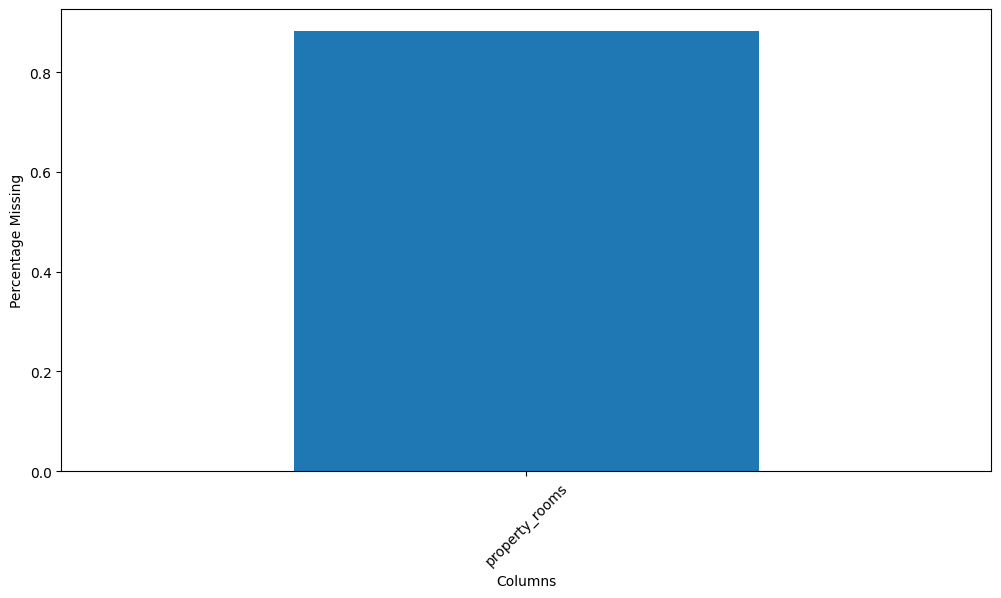

In [55]:
plot_missing_by_column(ds_train[['property_rooms']])

In [56]:
# Train
ds_train.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_train[ds_train.property_rooms.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_test[ds_test.property_rooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

property_rooms    0.0
dtype: float64


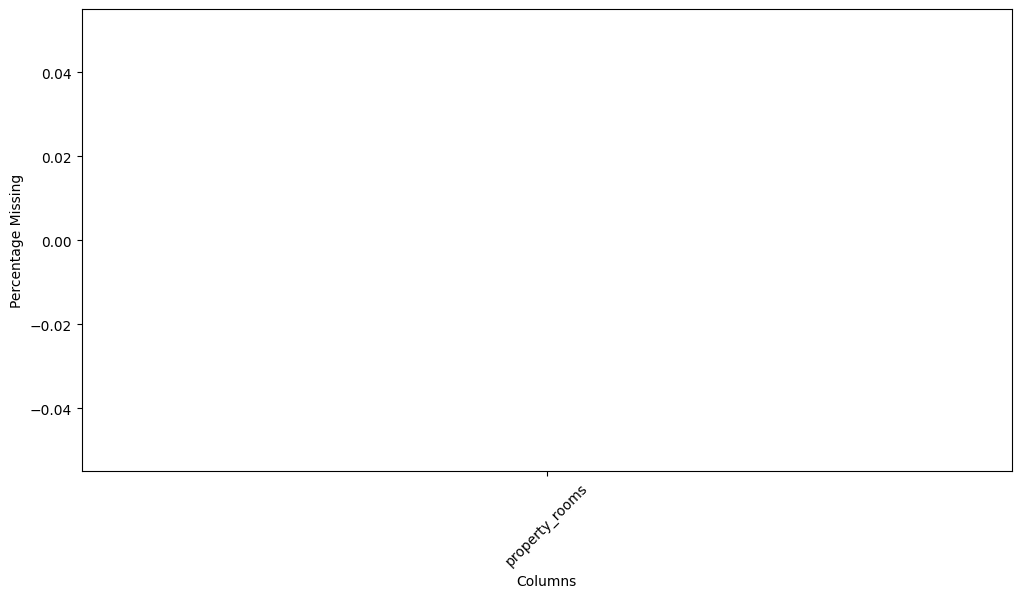

In [57]:
plot_missing_by_column(ds_train[['property_rooms']])

**Pre Imputacion de Habitaciones**

property_bedrooms    11.168908
dtype: float64


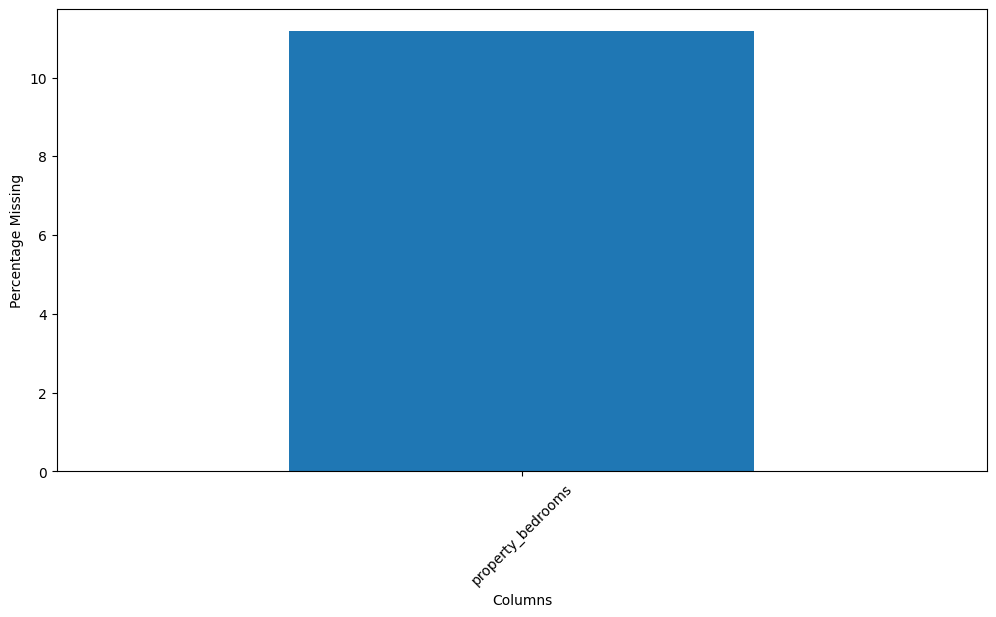

In [58]:
plot_missing_by_column(ds_train[['property_bedrooms']])

**Reparacion de habitaciones faltantes en base a los ambientes**

In [59]:
# Train
print(f"El total de habitaciones en train es: {len(ds_train.property_bedrooms)}")
habitaciones_invalidas = ds_train.loc[(ds_train['property_bedrooms'] > ds_train['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_train.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

# Test
print(f"El total de habitaciones en test es: {len(ds_test.property_bedrooms)}")
habitaciones_invalidas = ds_test.loc[(ds_test['property_bedrooms'] > ds_test['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_test.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

El total de habitaciones en train es: 74591
El total de habitaciones invalidas es: 129. Constituye al 0% de los datos del ds
El total de habitaciones en test es: 18640
El total de habitaciones invalidas es: 31. Constituye al 0% de los datos del ds


id start_date end_date    latitud   longitud  \
276086  26ynaivxGjWUJwbcP5zKfg==        NaT      NaT -34.639591 -58.442952   
387679  DkUF65vVg64ocWpyJ+3FIg==        NaT      NaT -34.650156 -58.473353   
459345  tDk6Qv0vzIsLSAkJbV/O/Q==        NaT      NaT -34.578661 -58.428397   
115472  8GnXLYvT917uZZQOseeXXw==        NaT      NaT -34.613037 -58.360984   
338919  xkxeuRCy0RtLzQkKyhCaNw==        NaT      NaT -34.669249 -58.474285   
24686   C3bkeU7dwuSasjU+dZfciw==        NaT      NaT -34.596455 -58.507433   
274570  VBHHqooTIdGIODHk3X70og==        NaT      NaT -34.573022 -58.419735   
115489  BtICH9RxtgHdJDZ+32rCdA==        NaT      NaT -34.613261 -58.361513   
426286  li3VQt01Um6JdlK/+w3Kwg==        NaT      NaT -34.567114 -58.441770   
371576  IXM/gb1ZLCR3m0DK/VczrQ==        NaT      NaT -34.604930 -58.440416   
15290   27TW766b0Uqnm/sMZTdUIQ==        NaT      NaT -34.598239 -58.400524   
393372  7nxreTyKxab7bspnoAodSQ==        NaT      NaT -34.612133 -58.406925   
340427  uP+f4jupr3E/oT2T1TNTkg==        NaT      NaT -34.621660 -58.381734   
115491  u5hOV+bJihRU3VAVxsfsrw==        NaT      NaT -34.613037 -58.360984   
148314  829VJfEw24JZQ8js/z/eGQ==        NaT      NaT -34.622874 -58.397855   
100807  3u2SeeteiBPk/c3nU9WQnA==        NaT      NaT -34.565974 -58.433832   
140832  2aHER3AXQs3zb3EegLhmgg==        NaT      NaT -34.588454 -58.385257   
442558  LcFV+buICyzuweftEQ0jUw==        NaT      NaT -34.594547 -58.384367   
428097  5Q58aJJXojGC5f6ryqbJjw==        NaT      NaT -34.595668 -58.389490   
385730  qgnjg2cQkLeAALjoJhJl1g==        NaT      NaT -34.623053 -58.447006   
423303  xGZlwqyhft5wzqmETnpu9Q==        NaT      NaT -34.561236 -58.460302   
432011  s14IJlvWuE+oZmMurxiGpw==        NaT      NaT -34.643086 -58.435170   
3028    epPD4VV0HDOb5M1cNSTFEw==        NaT      NaT -34.640603 -58.417313   
2516    uKy3ZC5YQ9kPZ1ztj7CKjw==        NaT      NaT -34.557573 -58.459926   
103915  LqBk5itH7jSvk1FBXV0LxQ==        NaT      NaT -34.577180 -58.451264   
452275  DzALh3DQ7Dp1VmfhkZvL4w==        NaT      NaT -34.596921 -58.402560   
236624  wNjDuMJwjrMgsHHpZdNidA==        NaT      NaT -34.626670 -58.439150   
115504  qsmPAKJ9brIGa8jbUAtQ1Q==        NaT      NaT -34.613261 -58.361513   
9495    OBDOu/FgK3dF4mwRcygTnA==        NaT      NaT -34.580919 -58.430717   
29406   OOz88YCCX3+F85n3z/yoiQ==        NaT      NaT -34.573955 -58.469930   
171569  zKrvUbrB7p50rDDxMp2yrw==        NaT      NaT -34.617993 -58.361880   

                 place_l3 property_type  property_rooms  property_bedrooms  \
276086   Parque Chacabuco            PH             3.0                5.0   
387679  Parque Avellaneda          Casa             5.0                7.0   
459345            Palermo  Departamento             2.0                3.0   
115472      Puerto Madero  Departamento             3.0                4.0   
338919       Villa Lugano          Casa             3.0                4.0   
24686        Villa Devoto  Departamento             1.0                2.0   
274570            Palermo  Departamento             5.0                6.0   
115489      Puerto Madero  Departamento             3.0                4.0   
426286            Palermo          Casa             7.0                8.0   
371576       Villa Crespo          Casa             5.0                8.0   
15290            Recoleta  Departamento             2.0                3.0   
393372          Balvanera            PH             6.0                7.0   
340427       Constitución            PH             4.0                7.0   
115491      Puerto Madero  Departamento             3.0                4.0   
148314      San Cristobal            PH             1.0                4.0   
100807            Palermo  Departamento             3.0                4.0   
140832           Recoleta  Departamento             5.0               22.0   
442558           Recoleta  Departamento             5.0                6.0   
428097           Recoleta  Departamento            

In [60]:
# Train
habitaciones_con_amb_menos_1_train = ds_train[ds_train.property_rooms == (ds_train.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en train son: {len(habitaciones_con_amb_menos_1_train)}. Constituyen al {(len(habitaciones_con_amb_menos_1_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test
habitaciones_con_amb_menos_1_test = ds_test[ds_test.property_rooms == (ds_test.property_bedrooms + 1)]
print(f"Las habitaciones que son Ambientes - 1 en test son: {len(habitaciones_con_amb_menos_1_test)}. Constituyen al {(len(habitaciones_con_amb_menos_1_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Las habitaciones que son Ambientes - 1 en train son: 55799. Constituyen al 74% de los datos
Las habitaciones que son Ambientes - 1 en test son: 13884. Constituyen al 74% de los datos


In [61]:
print(f"Valor inicial de habitaciones faltantes en el ds de train: {ds_train.property_bedrooms.isna().sum()}")
print(f"Valor inicial de habitaciones faltantes en el ds de test: {ds_test.property_bedrooms.isna().sum()}")

Valor inicial de habitaciones faltantes en el ds de train: 8331
Valor inicial de habitaciones faltantes en el ds de test: 2199


In [62]:
habitaciones_faltantes = ds_train[ds_train.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_train.loc[i, 'property_rooms'] == 1:
        ds_train.loc[i, 'property_bedrooms'] = 1
    else:
        ds_train.loc[i, 'property_bedrooms'] = ds_train.loc[i, 'property_rooms'] - 1
ds_train[ds_train.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [63]:
habitaciones_faltantes = ds_test[ds_test.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_test.loc[i, 'property_rooms'] == 1:
        ds_test.loc[i, 'property_bedrooms'] = 1
    else:
        ds_test.loc[i, 'property_bedrooms'] = ds_test.loc[i, 'property_rooms'] - 1
ds_test[ds_test.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

**Post Imputacion de habitaciones**

property_bedrooms    0.0
dtype: float64


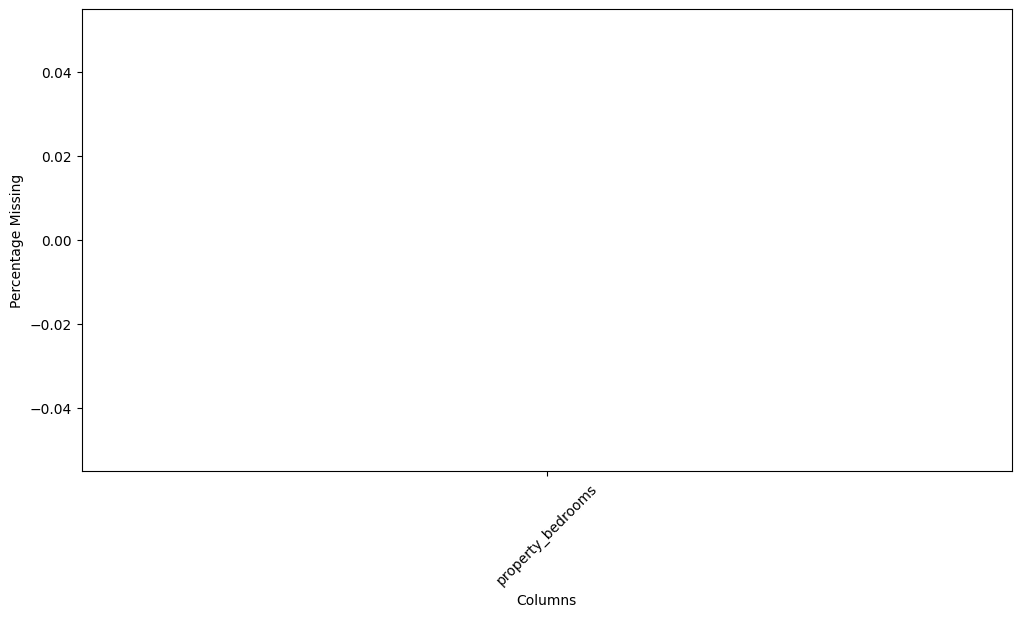

In [64]:
plot_missing_by_column(ds_train[['property_bedrooms']])

**Pre Imputación de Superficie total**

property_surface_total    4.987197
dtype: float64


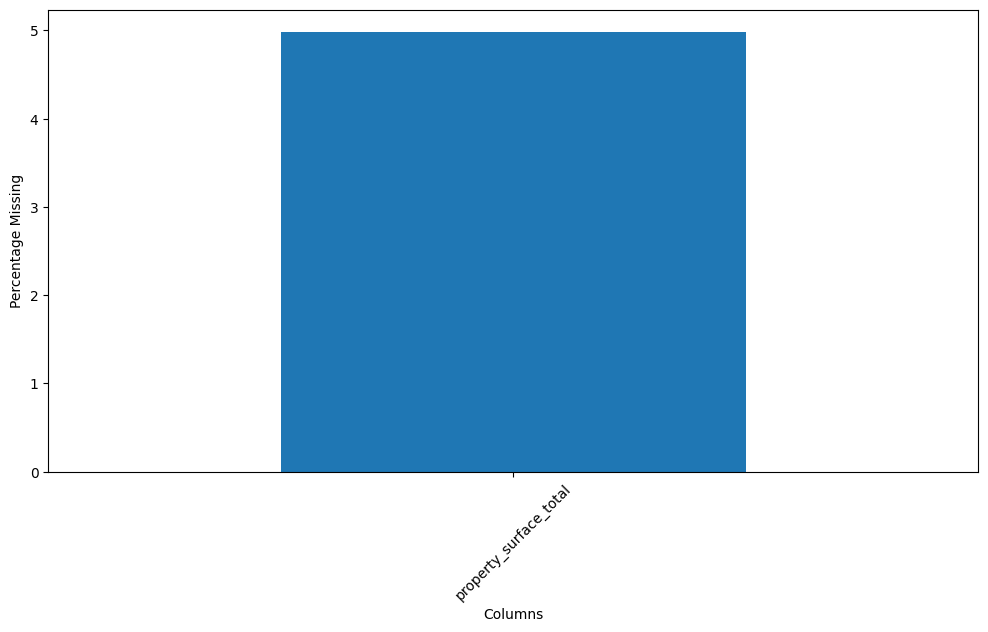

In [65]:
plot_missing_by_column(ds_train[['property_surface_total']])

In [66]:
ds_train[ds_train.property_surface_total.isna()][ds_train.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

**Reparación de datos faltantes en superficie cubierta**

In [67]:
# Train
ds_train.loc[ds_train.property_surface_total.isna(), 'property_surface_total'] = ds_train.loc[
    ds_train.property_surface_total.isna(), 'property_surface_covered']
len(ds_train.loc[ds_train.property_surface_total.isna()])

# Test
ds_test.loc[ds_test.property_surface_total.isna(), 'property_surface_total'] = ds_test.loc[
    ds_test.property_surface_total.isna(), 'property_surface_covered']
len(ds_test.loc[ds_test.property_surface_total.isna()])

0

**Post Imputación de Superficie total**

property_surface_total    0.0
dtype: float64


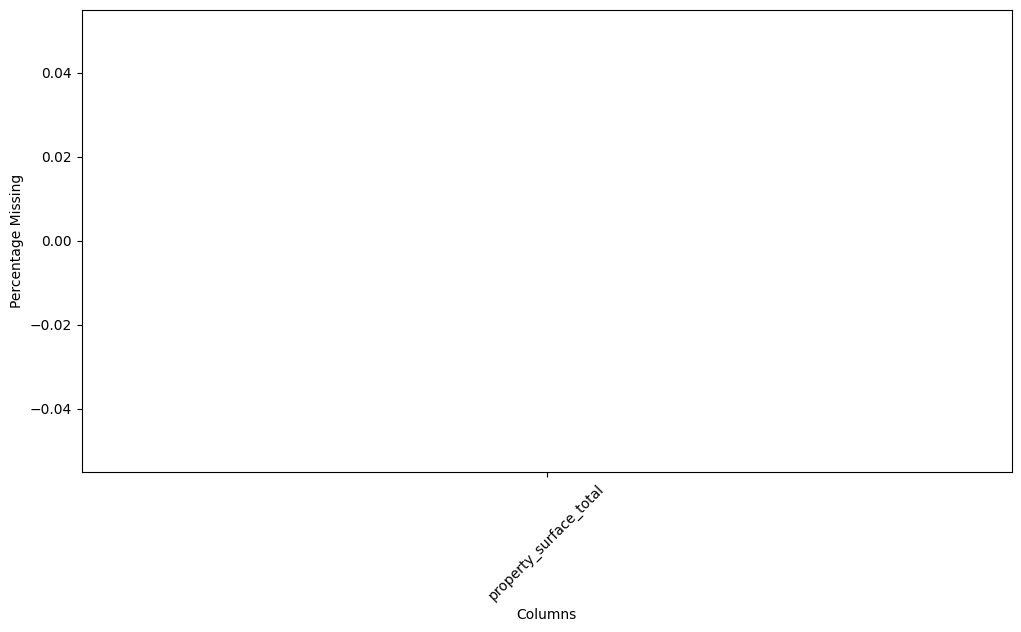

In [68]:
plot_missing_by_column(ds_train[['property_surface_total']])

**Pre Imputación de superficie cubierta**

In [69]:
ds_train[ds_train.property_surface_covered.isna()]

id start_date   end_date    latitud   longitud  \
270335  JEL9d1zH2s+oJla2o8gyCQ== 2021-07-13 2021-10-31 -34.605279 -58.424587   
272568  7k13KkNlM++GE45TmLp9+g== 2021-02-21 2022-01-28 -34.585934 -58.500868   
379789  kvcnbQeRTjhV5Cq2M0hbZA== 2021-05-19 2021-06-05 -34.544665 -58.480189   
68415   JSiJfnpnCwN7CCHgBgF0XQ== 2021-03-27 2021-04-15 -34.607950 -58.395034   
360190  QZruNAoEYQvqbK+8gaKF4w== 2021-06-11 2022-02-17 -34.557560 -58.458531   
...                          ...        ...        ...        ...        ...   
92439   8HUvJzXl9FG71ls0MF9lCA== 2021-08-03 2021-08-24 -34.560619 -58.459249   
69555   lzoN59lfjpwunHnAhhGuiQ== 2021-09-23 2022-03-09 -34.578159 -58.407252   
213846  RI5zCo5QQdWb+IbfeBE19Q== 2021-06-03 2021-06-05 -34.638987 -58.374281   
258429  f5Bh5q+tktDbbqH399RPmg== 2021-11-03 2022-01-27 -34.576814 -58.465850   
32503   ujMgOBug1XphvlY4xhIfkw== 2021-12-04 2022-02-20 -34.588935 -58.448338   

                place_l3 property_type  property_rooms  property_bedrooms  \
270335           Almagro  Departamento             3.0                2.0   
272568  Villa Pueyrredón            PH             3.0                2.0   
379789          Saavedra  Departamento             1.0                1.0   
68415          Balvanera  Departamento             4.0                3.0   
360190          Belgrano  Departamento             2.0                1.0   
...                  ...           ...             ...                ...   
92439           Belgrano  Departamento             1.0                1.0   
69555            Palermo  Departamento             4.0                3.0   
213846          Barracas  Departamento             3.0                2.0   
258429     Villa Ortuzar  Departamento             6.0                4.0   
32503          Chacarita  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
270335                    54.0                       NaN         95000.0   
272568                   110.0                       NaN        229000.0   
379789                    36.0                       NaN         90000.0   
68415                     96.0                       NaN        128000.0   
360190                    50.0                       NaN        147500.0   
...                        ...                       ...             ...   
92439                     27.0                       NaN         65000.0   
69555                    176.0                       NaN        720000.0   
213846                   106.0                       NaN        200000.0   
258429                   300.0                       NaN        850000.0   
32503                    100.0                       NaN        319000.0   

                                           property_title  
270335                       Departamento - Almagro Norte  
272568  PH 3 ambientes, patio/terraza, cochera cubiert...  
379789                            Departamento - Saavedra  
68415   DEPARTAMENTO EN VENTA 4 AMB DEP. APTO PROFESIONAL  
360190     2 AMB EN SEMI-TORRE SOUL BELGRANO - Belgrano C  
...                                                   ...  
92439   Monoambiente en Belgrano, a 1 cuadra de Av. Ca...  
69555                              Departamento - Palermo  
213846                            Departamento - Barracas  
258429  Piso de categoria hecho a nuevo en pleno Belgr...  
32503   Espectacular 4 ambientes en lo mejor de Chacar...  

[2622 rows x 13 columns]

property_surface_covered    3.515169
dtype: float64


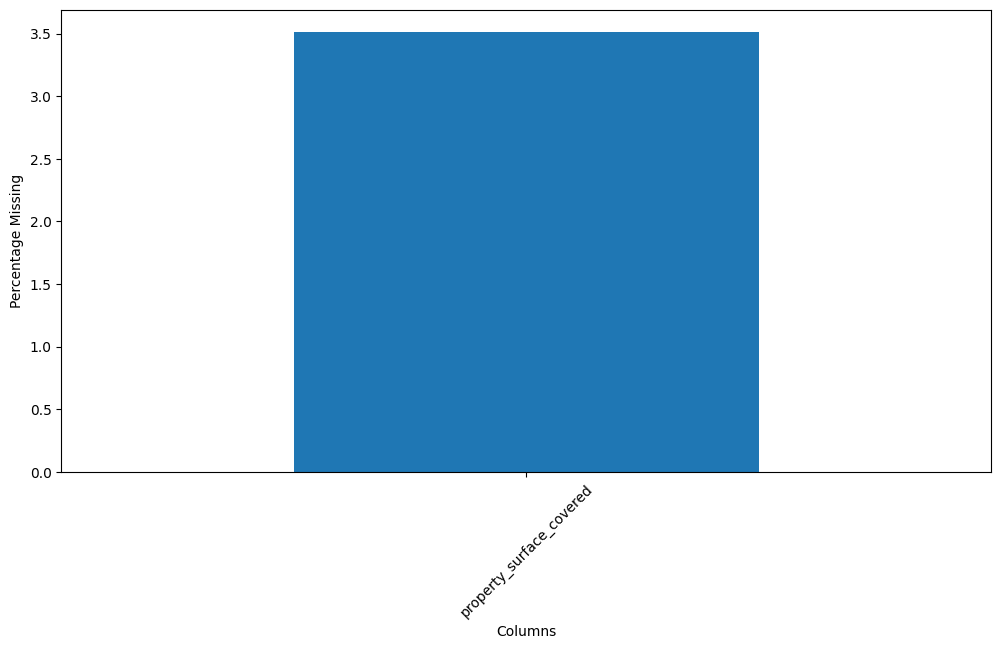

In [70]:
plot_missing_by_column(ds_train[['property_surface_covered']])

**Reparación de datos faltantes en Superficie cubierta**

In [71]:
ds_train[ds_train.property_surface_covered.isna()].property_type.value_counts()

Departamento    2354
PH               186
Casa              82
Name: property_type, dtype: int64

In [72]:
# Test
ds_test.loc[(ds_test.property_surface_covered.isna()) & (
        ds_test.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_test.loc[(ds_test.property_surface_covered.isna()) & (ds_test.property_type == 'Departamento')])

# Train
ds_train.loc[(ds_train.property_surface_covered.isna()) & (
        ds_train.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_train.loc[(ds_train.property_surface_covered.isna()) & (ds_train.property_type == 'Departamento')])

0

In [73]:
print(f"Registros Train: {ds_train.property_surface_covered.isna().sum()}")

Registros Train: 268


In [74]:
print(f"Registros Test: {ds_test.property_surface_covered.isna().sum()}")

Registros Test: 643


In [75]:
# Train
ds_train.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_train[ds_train.property_surface_covered.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_test[ds_test.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

id                          0.000000
start_date                  0.000000
end_date                    0.000000
latitud                     0.000000
longitud                    0.000000
place_l3                    0.200476
property_type               0.000000
property_rooms              0.000000
property_bedrooms           0.000000
property_surface_total      0.000000
property_surface_covered    0.000000
property_price              0.000000
property_title              0.000000
dtype: float64


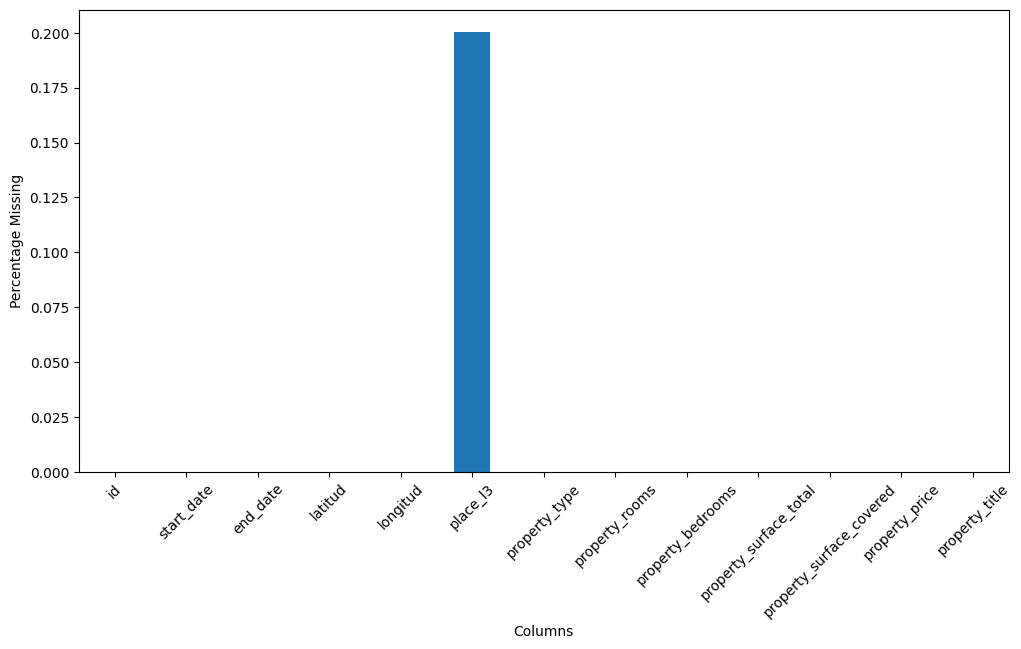

In [76]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

### Analisis de Valores Atipicos

#### Univariados

**Metodo IQR**

In [77]:
def calculate_univariate_iqr(column, dataset):
    print(f"cantidad de datos del ds: {len(dataset)}")

    # 1er cuartil para property_rooms
    q1 = column.quantile(0.25)

    # 3er cuartil para property_rooms
    q3 = column.quantile(0.75)
    med = column.median()

    # region IQR
    iqr = q3 - q1

    # Bigotes altos y bajos
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)

    outliers = dataset[(column <= limite_inferior) | (column >= limite_superior)]
    print(f"outliers encontrados para los {column.name}: {len(outliers)}")
    print(f"hay {len(outliers) * 100 // len(dataset)}% de outliers de {column.name} sobre el ds")
    print(f"limit sup: {limite_superior}, limite inf: {limite_inferior}")

    outliers_grafico = dataset[(column >= limite_inferior) & (column <= limite_superior)][column.name]

    plt.figure(figsize=(5, 5))
    plt.boxplot(outliers_grafico)
    plt.title(f"Boxplot de IQR para {column.name}")
    plt.show()

In [78]:
def boxplot_outliers_edges(series, moderated_outliers=True):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    if moderated_outliers:
        value = 1.5
    else:
        value = 3

    max = q3 + (value * iqr)
    min = q1 - (value * iqr)

    return min, max


In [79]:
def boxplot_with_outliers(dataset, column_name):
    column = dataset[column_name]
    moderated_min, moderated_max = boxplot_outliers_edges(column)
    severe_min, severe_max = boxplot_outliers_edges(column, moderated_outliers=False)

    print(f"Moderated outliers limits [min: {moderated_min},max: {moderated_max}]")
    print(f"Severe outliers limits [min: {severe_min},max: {severe_max}]")

    plt.figure(figsize=(5, 10))
    column.plot.box()

    plt.axhline(moderated_min, label="Moderated")
    plt.axhline(moderated_max)
    plt.axhline(severe_min, color="r", label="Severe")
    plt.axhline(severe_max, color="r")
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend(title="Limites")

**Ambientes**

cantidad de datos del ds: 74323
outliers encontrados para los property_rooms: 1190
hay 1% de outliers de property_rooms sobre el ds
limit sup: 7.0, limite inf: -1.0


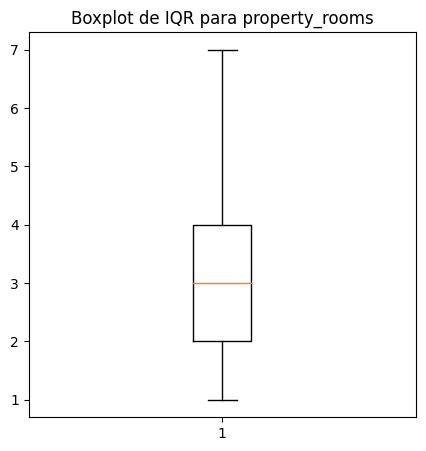

In [80]:
calculate_univariate_iqr(ds_train.property_rooms, ds_train)

In [81]:
# Train
outlier_inf_rooms_iqr_train = ds_train[ds_train['property_rooms'] < 0]
outlier_sup_rooms_iqr_train = ds_train[ds_train['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en train son: {len(outlier_inf_rooms_iqr_train)}. Constituyen al {(len(outlier_inf_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en train son: {len(outlier_sup_rooms_iqr_train)}. Constituyen al {(len(outlier_sup_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test
outlier_inf_rooms_iqr_test = ds_test[ds_test['property_rooms'] < 0]
outlier_sup_rooms_iqr_test = ds_test[ds_test['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en test son: {len(outlier_inf_rooms_iqr_test)}. Constituyen al {(len(outlier_inf_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en test son: {len(outlier_sup_rooms_iqr_test)}. Constituyen al {(len(outlier_sup_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en train son: 596. Constituyen al 0% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 133. Constituyen al 0% de los datos


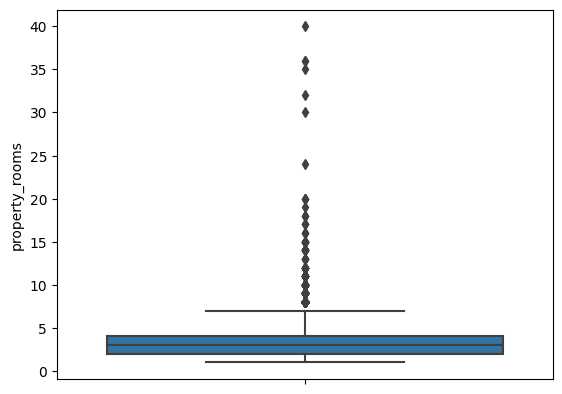

In [82]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

In [83]:
# Train
ds_train.drop(outlier_sup_rooms_iqr_train.index, inplace=True)
print(f"Los outliers sup de rooms en train post eliminacion son: {len(ds_train[ds_train['property_rooms'] > 7])}")

# Test
ds_test.drop(outlier_sup_rooms_iqr_test.index, inplace=True)
print(f"Los outliers sup de rooms en test post eliminacion son: {len(ds_test[ds_test['property_rooms'] > 7])}")

Los outliers sup de rooms en train post eliminacion son: 0
Los outliers sup de rooms en test post eliminacion son: 0


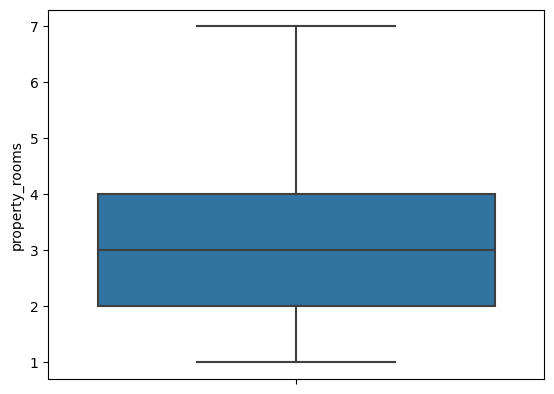

In [84]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

**Habitaciones**

Moderated outliers limits [min: -0.5,max: 3.5]
Severe outliers limits [min: -2.0,max: 5.0]


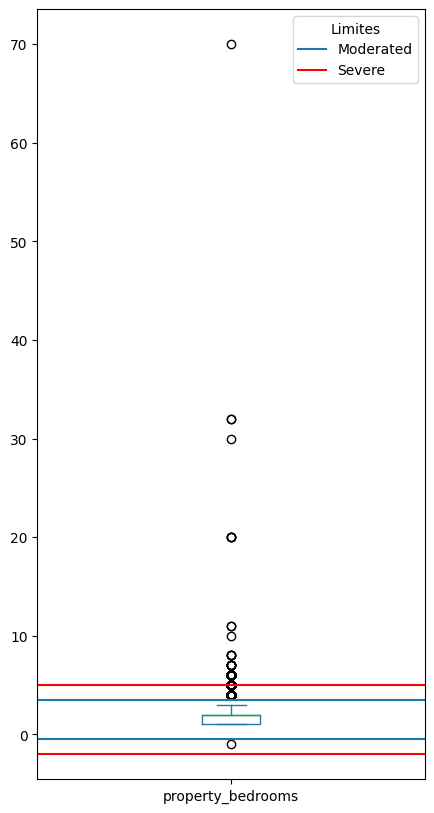

In [85]:
boxplot_with_outliers(ds_train, 'property_bedrooms')

cantidad de datos del ds: 73727
outliers encontrados para los property_bedrooms: 4351
hay 5% de outliers de property_bedrooms sobre el ds
limit sup: 3.5, limite inf: -0.5


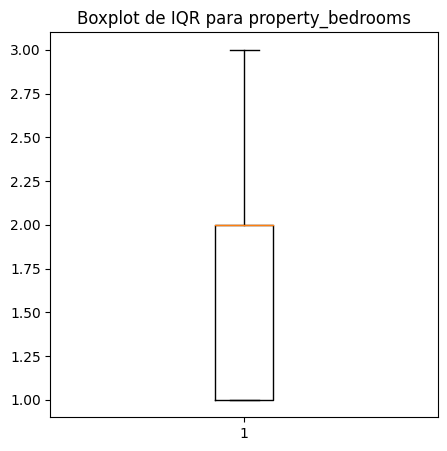

In [86]:
calculate_univariate_iqr(ds_train.property_bedrooms, ds_train)

In [87]:
# Train
outlier_inf_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_train)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_train)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test

outlier_inf_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_test)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_test)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Los outliers inf de bedrooms son: 1. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 23. Constituyen al 0% de los datos
Los outliers inf de bedrooms son: 0. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 11. Constituyen al 0% de los datos


In [88]:
# Train

print(f"fila a eliminar: {ds_train[ds_train['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_train.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en train")

# Test

print(f"filas a eliminar: {ds_test[ds_test['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_test.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en test")

fila a eliminar:                               id start_date   end_date    latitud   longitud  \
406880  3WI+zCCMeb9TR5kOBm7rhg== 2021-01-07 2021-03-18 -34.577595 -58.495185   

             place_l3 property_type  property_rooms  property_bedrooms  \
406880  Villa Urquiza  Departamento             2.0               -1.0   

        property_surface_total  property_surface_covered  property_price  \
406880                    61.0                      43.0        125000.0   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...  
Se han eliminado: 1 registros en train
filas a eliminar: Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []
Se han eliminado: 0 registros en test


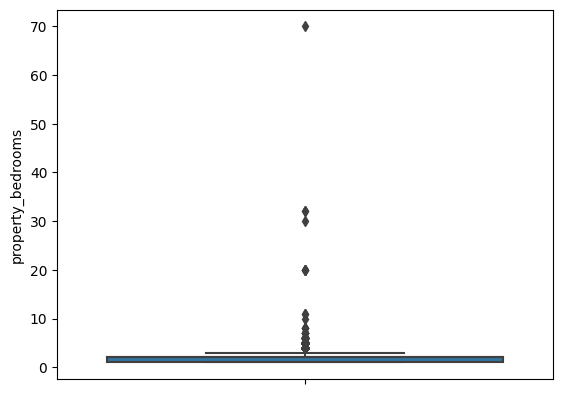

In [89]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

In [90]:
print("Ejemplos: ")
len(f"AMB < HAB = {len(outlier_sup_bedrooms_iqr_train[outlier_sup_bedrooms_iqr_train.property_rooms < outlier_sup_bedrooms_iqr_train.property_rooms])}")

Ejemplos: 


13

In [91]:
# Train

indice_outlier_train = outlier_sup_bedrooms_iqr_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_bedrooms_iqr_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 23 registros en train
Se han eliminado: 11 registros en test


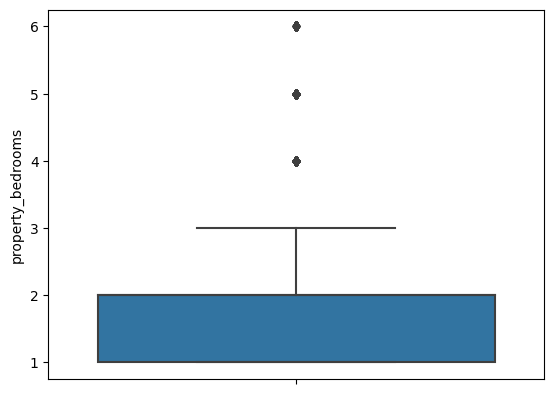

In [92]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

**Superficie Total**

cantidad de datos del ds: 73703
outliers encontrados para los property_surface_total: 5863
hay 7% de outliers de property_surface_total sobre el ds
limit sup: 186.5, limite inf: -41.5


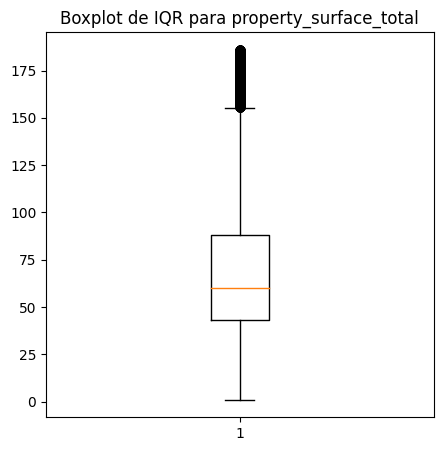

In [93]:
calculate_univariate_iqr(ds_train.property_surface_total, ds_train)

In [94]:
# Train

indice_outlier_train = ds_train[ds_train.property_surface_total < 18].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = ds_test[ds_test.property_surface_total < 18].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 69 registros en train
Se han eliminado: 26 registros en test


In [95]:
inf, sup = boxplot_outliers_edges(ds_train.property_surface_total, False)
print(f"Nuestro rango intercuartil está comprendido entre: {inf}, {sup}")

Nuestro rango intercuartil está comprendido entre: -127.0, 272.0


In [96]:
# Train

outlier_inf_total_iqr_train = ds_train[ds_train['property_surface_total'] < -44]
outlier_sup_total_iqr_train = ds_train[ds_train['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en train son: {len(outlier_inf_total_iqr_train)}. Constituyen al {(len(outlier_inf_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en train son: {len(outlier_sup_total_iqr_train)}. Constituyen al {(len(outlier_sup_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_inf_total_iqr_test = ds_test[ds_test['property_surface_total'] < -44]
outlier_sup_total_iqr_test = ds_test[ds_test['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en test son: {len(outlier_inf_total_iqr_test)}. Constituyen al {(len(outlier_inf_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en test son: {len(outlier_sup_total_iqr_test)}. Constituyen al {(len(outlier_sup_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en train son: 5547. Constituyen al 7% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en test son: 1361. Constituyen al 7% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


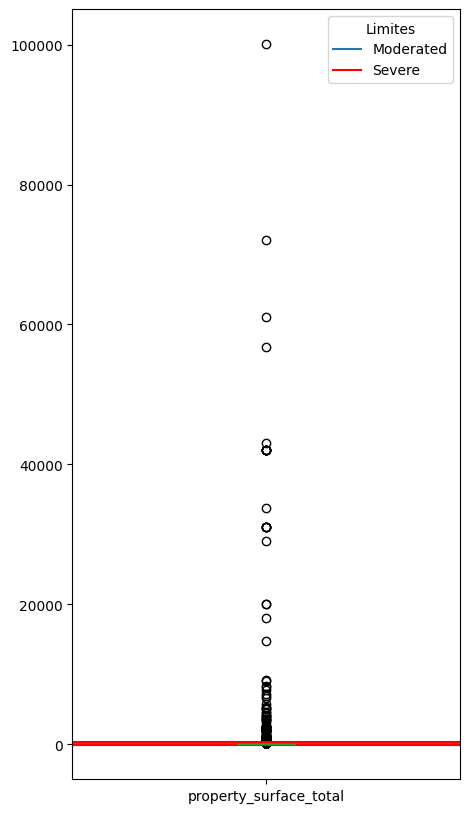

In [97]:
boxplot_with_outliers(ds_train, ds_train.property_surface_total.name)

0-272       3208
272-500     2039
500-750      188
1000-inf      91
750-1000      21
Name: property_surface_total, dtype: int64


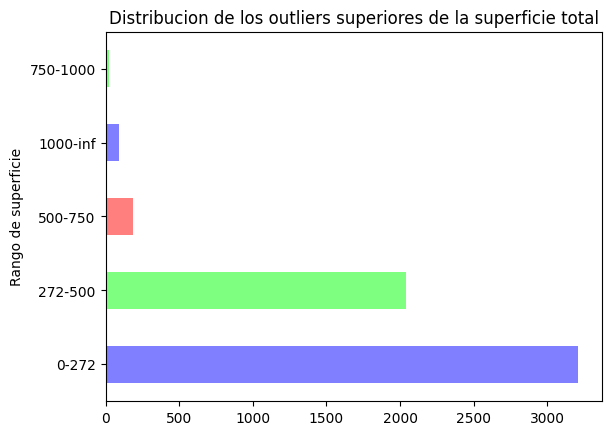

In [98]:
property_surface_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_total,
                                  bins=[0, 272, 500, 750, 1000, float("inf")],
                                  labels=["0-272", "272-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(property_surface_grouped.value_counts())
ax = property_surface_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                       title="Distribucion de los outliers superiores de la superficie total",
                                                       xlabel="Rango de superficie", ylabel="Frecuencia")

In [99]:
surface_median = ds_train[ds_train.property_type == 'Casa'].property_surface_total.median()
print(
    f"Si bien la mediana de la superficite total es {surface_median} y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500")
    
    
    

Si bien la mediana de la superficite total es 220.0 y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500


In [100]:
# Train

outlier_sup_total_500_train = ds_train[ds_train['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en train son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_train[ds_train['property_surface_total'] > 500]) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_sup_total_500_test = ds_test[ds_test['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en test son: {len(ds_test[ds_test['property_surface_total'] > 500])}. Constituyen al {(len(ds_test[ds_test['property_surface_total'] > 500]) * 100) // len(ds_test.property_surface_total)}% de los datos")




Los outliers superiores de sup total en train son: 300. Constituyen al 0% de los datos
Los outliers superiores de sup total en test son: 69. Constituyen al 0% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


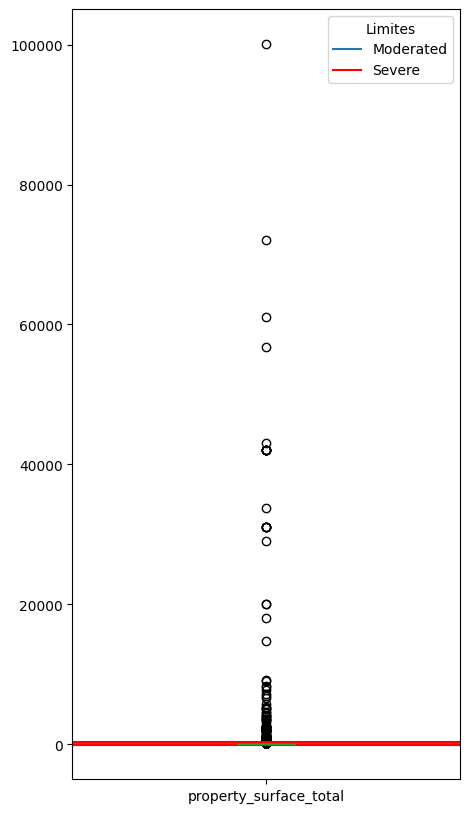

In [101]:
boxplot_with_outliers(ds_train, 'property_surface_total')

In [102]:
# Train

indice_outlier_train = outlier_sup_total_500_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_total_500_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 300 registros en train
Se han eliminado: 69 registros en test


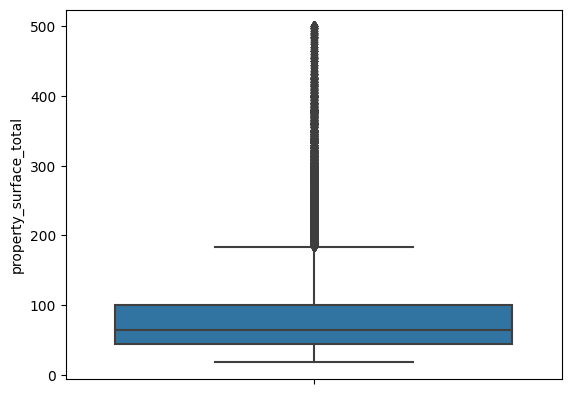

In [103]:
sns.boxplot(y=ds_train.property_surface_total)
plt.show()

**Superficie cubierta**

cantidad de datos del ds: 73334
outliers encontrados para los property_surface_covered: 5777
hay 7% de outliers de property_surface_covered sobre el ds
limit sup: 155.0, limite inf: -29.0


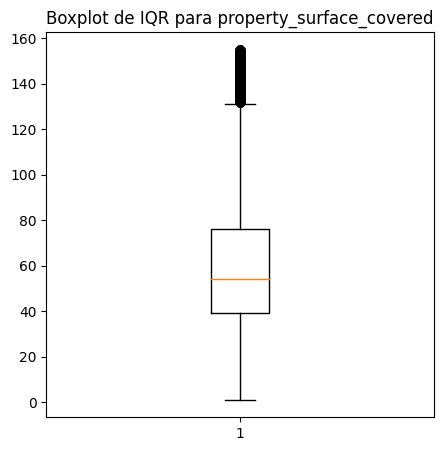

In [104]:
calculate_univariate_iqr(ds_train.property_surface_covered, ds_train)

In [105]:
# Train

outlier_inf_covered_iqr_train = ds_train[ds_train['property_surface_covered'] < 0]
outlier_sup_covered_iqr_train = ds_train[ds_train['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en train son: {len(outlier_inf_covered_iqr_train)}. Constituyen al {(len(outlier_inf_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en train son: {len(outlier_sup_covered_iqr_train)}. Constituyen al {(len(outlier_sup_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")

# Test

outlier_inf_covered_iqr_test = ds_test[ds_test['property_surface_covered'] < 0]
outlier_sup_covered_iqr_test = ds_test[ds_test['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en test son: {len(outlier_inf_covered_iqr_test)}. Constituyen al {(len(outlier_inf_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en test son: {len(outlier_sup_covered_iqr_test)}. Constituyen al {(len(outlier_sup_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")

Los outliers inf de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en train son: 5686. Constituyen al 7% de los datos
Los outliers inf de sup cubierta en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en test son: 1370. Constituyen al 7% de los datos


Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


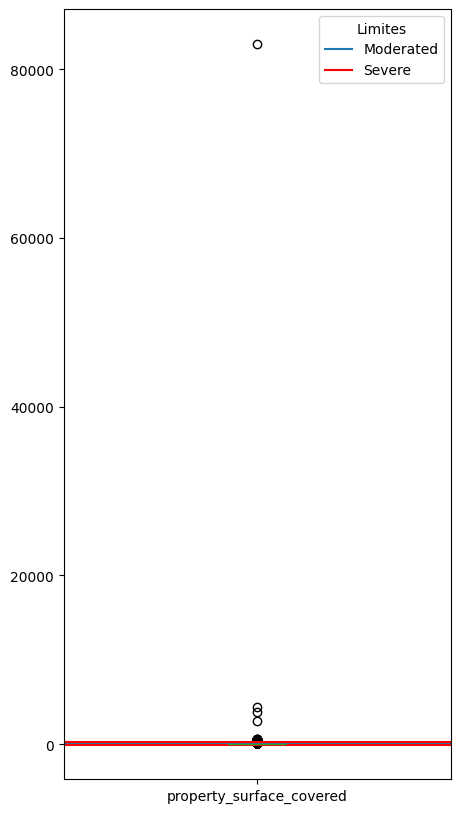

In [106]:
boxplot_with_outliers(ds_train, 'property_surface_covered')

Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


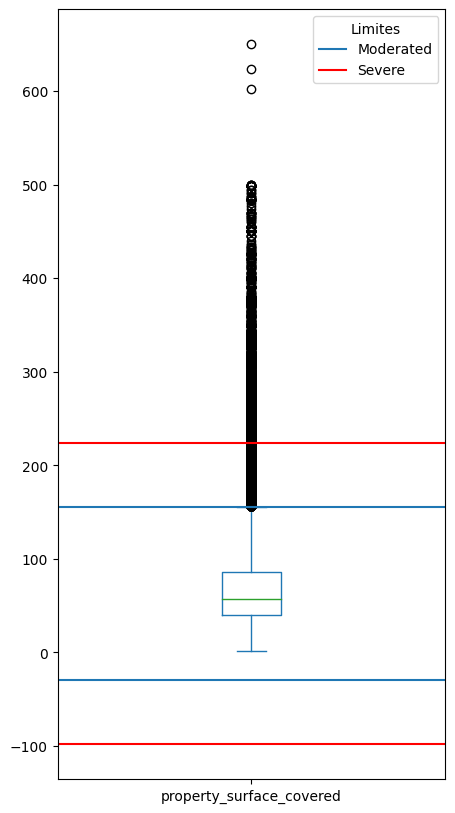

In [107]:
boxplot_with_outliers(ds_train[ds_train.property_surface_covered < 750], 'property_surface_covered')

0-224       3183
224-500     2270
500-750       65
1000-inf      20
750-1000       9
Name: property_surface_covered, dtype: int64


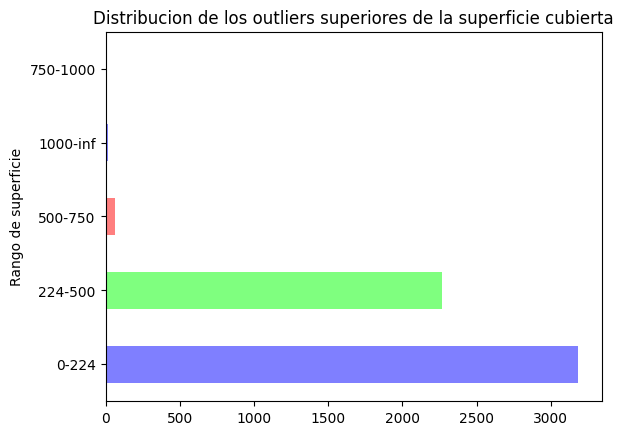

In [108]:
surface_total_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_covered,
                               bins=[0, 224, 500, 750, 1000, float("inf")],
                               labels=["0-224", "224-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(surface_total_grouped.value_counts())
ax = surface_total_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                    title="Distribucion de los outliers superiores de la superficie cubierta",
                                                    xlabel="Rango de superficie", ylabel="Frecuencia")

In [109]:
# Train

outlier_sup_cubierta_500 = ds_train[ds_train['property_surface_covered'] > 500]
indice_outlier_train = outlier_sup_cubierta_500.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

outlier_sup_cubierta_500 = ds_test[ds_test['property_surface_covered'] > 500]
indice_outlier_test = outlier_sup_cubierta_500.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 7 registros en train
Se han eliminado: 0 registros en test


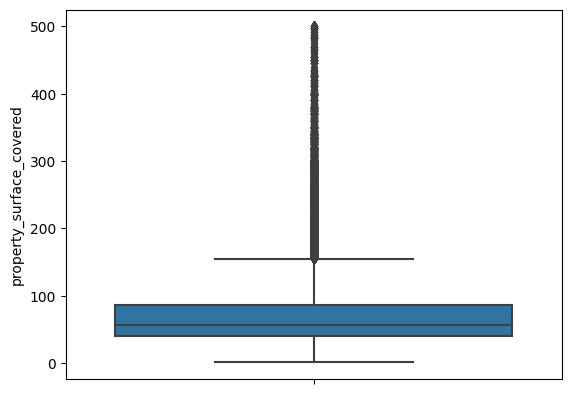

In [110]:
sns.boxplot(y=ds_train.property_surface_covered)
plt.show()

**Latitud y longitud**

cantidad de datos del ds: 73327
outliers encontrados para los latitud: 416
hay 0% de outliers de latitud sobre el ds
limit sup: -34.52014918175, limite inf: -34.67280489094999


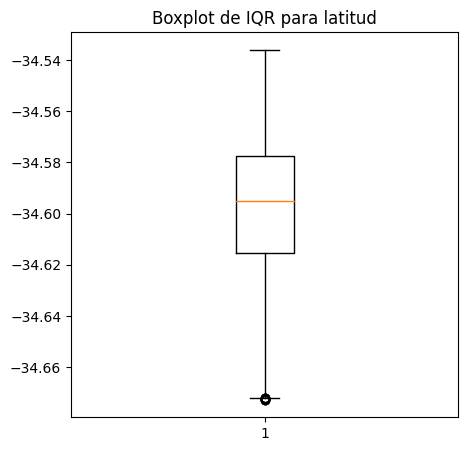

In [111]:
calculate_univariate_iqr(ds_train.latitud, ds_train)

cantidad de datos del ds: 73327
outliers encontrados para los longitud: 83
hay 0% de outliers de longitud sobre el ds
limit sup: -58.32456561024999, limite inf: -58.54995407385


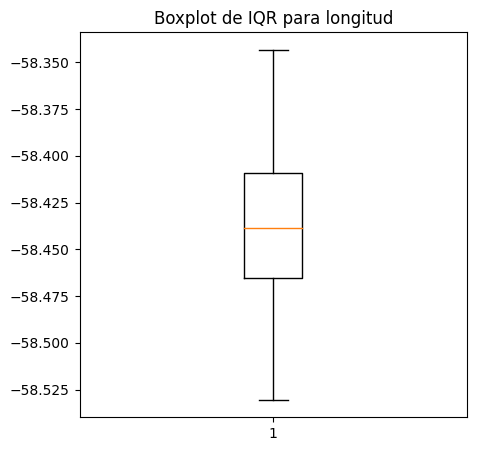

In [112]:
calculate_univariate_iqr(ds_train.longitud, ds_train)

In [113]:
# Train

outlier_inf_latitud_iqr_train = ds_train[ds_train['latitud'] < -34]
outlier_sup_latitud_iqr_train = ds_train[ds_train['latitud'] > -34]
print(
    f"Los outliers inf de latitud en train son: {len(outlier_inf_latitud_iqr_train)}. Constituyen al {(len(outlier_inf_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en train son: {len(outlier_sup_latitud_iqr_train)}. Constituyen al {(len(outlier_sup_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")

# Test

outlier_inf_latitud_iqr_test = ds_test[ds_test['latitud'] < -34]
outlier_sup_latitud_iqr_test = ds_test[ds_test['latitud'] > -34]
print(
    f"Los outliers inf de latitud en test son: {len(outlier_inf_latitud_iqr_test)}. Constituyen al {(len(outlier_inf_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en test son: {len(outlier_sup_latitud_iqr_test)}. Constituyen al {(len(outlier_sup_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")

Los outliers inf de latitud en train son: 73251. Constituyen al 99% de los datos
Los outliers sup de latitud en train son: 76. Constituyen al 0% de los datos
Los outliers inf de latitud en test son: 17738. Constituyen al 99% de los datos
Los outliers sup de latitud en test son: 20. Constituyen al 0% de los datos


#### Metodo Z score

In [114]:
def calculate_zscore_st(dataset, column):
    dataset_copy = dataset.copy()
    media = np.mean(column)
    std = np.std(column)
    dataset_copy[f'z_{column.name}'] = (column - media) / std
    return dataset_copy

**Ambientes**

In [115]:
z_rooms_ds = calculate_zscore_st(ds_train, ds_train.property_rooms)

In [116]:
# Train

print(
    f"Los outliers sup de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test

print(
    f"Los outliers sup de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers sup de rooms en train son: 535. Constituyen al 0% de los datos
Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 535. Constituyen al 3% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 3% de los datos


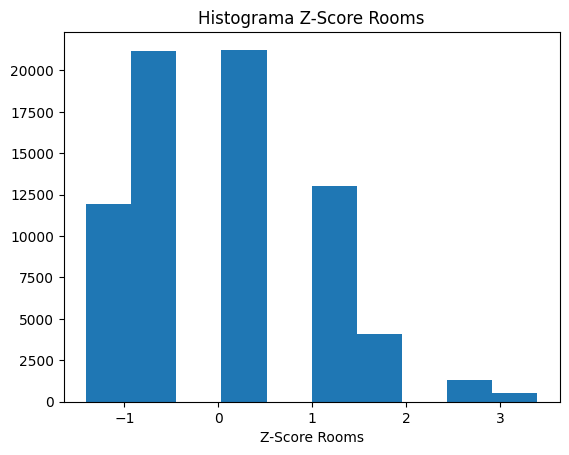

In [117]:
plt.hist(z_rooms_ds.z_property_rooms)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.show()

**Habitaciones**

In [118]:
z_bedrooms_ds = calculate_zscore_st(ds_train, ds_train.property_bedrooms)

In [119]:
# Train

print(
    f"Los outliers sup de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

print(
    f"Los outliers sup de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

Los outliers sup de bedrooms en train son: 629.Constituyen al 0% de los datos
Los outliers sup de bedrooms en test son: 629.Constituyen al 3% de los datos


id start_date   end_date    latitud   longitud  \
204107  AN09t0cj6CnyV9CYFqPsTg== 2021-05-10 2021-06-05 -34.590275 -58.383917   
378523  hDXGlEpS2HXNQFBY+mEjLg== 2021-05-19 2021-06-05 -34.598438 -58.432395   
301634  bfuYXsTByykKwf6FHb9OhA== 2021-08-10 2022-02-09 -34.654324 -58.494557   
99690   kEHNuSQJk+1QdQ15xNmbpQ== 2021-10-30 2022-01-27 -34.559845 -58.469584   
153301  PVGmJSzkbGxe4s+SNSZgcg== 2021-12-09 2021-12-28 -34.562451 -58.453956   
...                          ...        ...        ...        ...        ...   
213945  4Wu1ehLdcgcI3a6G1slocg== 2021-06-03 2021-06-14 -34.605723 -58.405866   
21968   eWg4wCT/y2YhjxQYaKT7dQ== 2021-10-01 2021-12-23 -34.630999 -58.494643   
185852  V1EHVX0t3ojfgw1bTJs+lA== 2021-08-07 2022-03-29 -34.604891 -58.449569   
355025  UDvAIKbPxcpZIpMvBIbzXA== 2021-03-31 2021-07-06 -34.601949 -58.455970   
310304  oPFFWYZK24A+1R05P1Miyg== 2021-09-01 2022-04-13 -34.567684 -58.446609   

            place_l3 property_type  property_rooms  property_bedrooms  \
204107      Recoleta  Departamento             6.0                6.0   
378523  Villa Crespo            PH             7.0                5.0   
301634     Mataderos          Casa             6.0                5.0   
99690        Coghlan          Casa             6.0                5.0   
153301      Belgrano  Departamento             6.0                5.0   
...              ...           ...             ...                ...   
213945     Balvanera  Departamento             5.0                5.0   
21968       Floresta          Casa             7.0                5.0   
185852  Villa Crespo          Casa             5.0                5.0   
355025  Villa Crespo          Casa             7.0                5.0   
310304      Belgrano  Departamento             6.0                5.0   

        property_surface_total  property_surface_covered  property_price  \
204107                   379.0                     379.0       1150000.0   
378523                   238.0                     238.0        600000.0   
301634                   314.0                     214.0        140000.0   
99690                    463.0                     235.0        675000.0   
153301                   270.0                     240.0        690000.0   
...                        ...                       ...             ...   
213945                   169.0                     165.0        210000.0   
21968                    202.0                     202.0        240000.0   
185852                   192.0                      80.0        170000.0   
355025                   292.0                     265.0        390000.0   
310304                   395.0                     344.0       1200000.0   

                                           property_title  z_property_bedrooms  
204107                                      Libertad 1500             4.353298  
378523               PH - Villa Crespo - Apto profesional             3.301812  
301634  VENTA CASA A REFACIONAR EN MATADEROS LOTE TERRENO             3.301812  
99690                Casa  coghlan con  pileta y parrilla             3.301812  
153301  Venta-Departamento -6 ambientes -Belgrano-Segu...             3.301812  
...                                                   ...                  ...  
213945            VENTA - 5 AMB. C/ DEPENDENCIA SERVICIO              3.301812  
21968   Casa en Velez Sarfield OPORTUNIDAD !!! ( Ideal...             3.301812  
185852       Casa de 6 ambientes en Venta en Villa crespo             3.301812  
355025  Casa en Lote de 8,66 x 34 en venta en Villa Cr...             3.301812  
310304  TORRE MANSION, 6 ambientes, seguridad, ameniti...             3.301812  

[629 rows x 14 columns]

In [120]:
# Train

print(
    f"Los outliers inf de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

# Test

print(
    f"Los outliers inf de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

Los outliers inf de bedrooms en train son: 0.Constituyen al 0% de los datos
Los outliers inf de bedrooms en test son: 0.Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_bedrooms]
Index: []

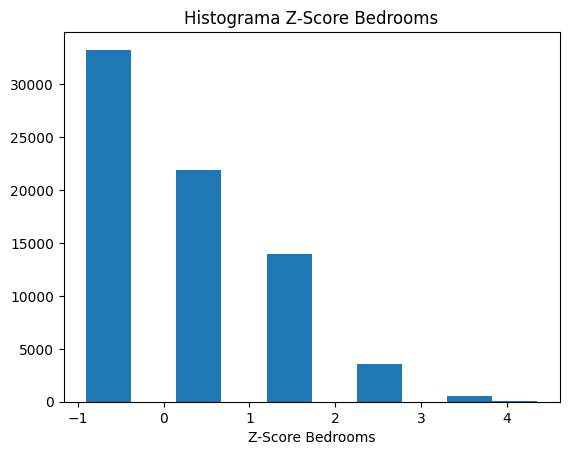

In [121]:
plt.hist(z_bedrooms_ds.z_property_bedrooms)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.show()

**Superficie Total**

In [122]:
z_total_ds = calculate_zscore_st(ds_train, ds_train.property_surface_total)

In [123]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

Los outliers superiores de sup total en train son: 1823. Constituyen al 2% de los datos
Los outliers superiores de sup total en test son: 1823. Constituyen al 10% de los datos


id start_date   end_date    latitud   longitud  \
133466  ayVCJLcCsiSfZsiRt5Y9GA== 2021-02-18 2021-03-08 -34.562451 -58.453956   
36875   CbMQaNWhgGiXPGNy6KY/lQ== 2021-09-21 2021-09-30 -34.591371 -58.405355   
240451  TR/nJQSkUtdHF0BUviO3Wg== 2021-05-21 2021-06-05 -34.588256 -58.408203   
119614  YXvW6zmciLKQlKgv6NkEbw== 2021-03-25 2021-04-21 -34.612289 -58.359324   
204107  AN09t0cj6CnyV9CYFqPsTg== 2021-05-10 2021-06-05 -34.590275 -58.383917   

             place_l3 property_type  property_rooms  property_bedrooms  \
133466       Belgrano  Departamento             7.0                4.0   
36875        Recoleta  Departamento             5.0                4.0   
240451   Barrio Norte  Departamento             4.0                3.0   
119614  Puerto Madero  Departamento             6.0                4.0   
204107       Recoleta  Departamento             6.0                6.0   

        property_surface_total  property_surface_covered  property_price  \
133466                   297.0                     297.0        890000.0   
36875                    284.0                     184.0        540000.0   
240451                   301.0                     130.0        450000.0   
119614                   426.0                     426.0       4000000.0   
204107                   379.0                     379.0       1150000.0   

                                           property_title  \
133466  RETASADO VENTA importante piso ALTO en edifici...   
36875   VENTA DEPTO DUPLEX4 AMB DEP RECOLETA  JARDIN C...   
240451  Venta, Semipiso de 4 ambientes con gran terraz...   
119614  VENTA importante PISO alto COMPLETO en torre E...   
204107                                      Libertad 1500   

        z_property_surface_total  
133466                  3.211258  
36875                   3.013686  
240451                  3.272050  
119614                  5.171781  
204107                  4.457482

In [124]:
# Train

print(
    f"Los outliers inf de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

# Test

print(
    f"Los outliers inf de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_total]
Index: []

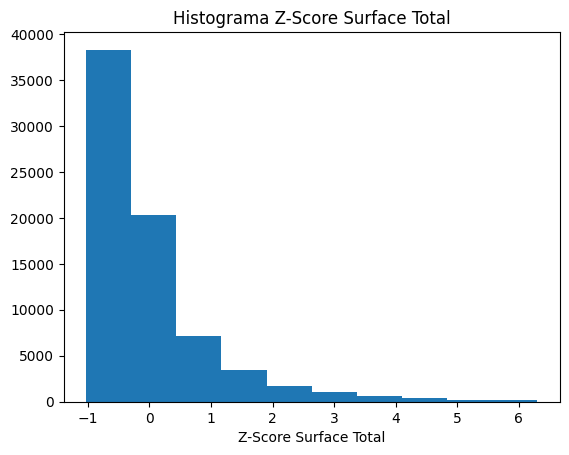

In [125]:
plt.hist(z_total_ds.z_property_surface_total)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

**Superficie Cubierta**

In [126]:
z_covered_ds = calculate_zscore_st(ds_train, ds_train.property_surface_covered)

In [127]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

Los outliers superiores de sup cubierta en train son: 1716. Constituyen al 2% de los datos
Los outliers superiores de sup cubierta en test son: 1716. Constituyen al 9% de los datos


id start_date   end_date    latitud   longitud  \
133466  ayVCJLcCsiSfZsiRt5Y9GA== 2021-02-18 2021-03-08 -34.562451 -58.453956   
119614  YXvW6zmciLKQlKgv6NkEbw== 2021-03-25 2021-04-21 -34.612289 -58.359324   
204107  AN09t0cj6CnyV9CYFqPsTg== 2021-05-10 2021-06-05 -34.590275 -58.383917   
450438  zs2bFBMKyYf+xAe0vOxS9A== 2021-12-16 2022-02-09 -34.576346 -58.405366   
184242  ig2lE0pUuS+psaMN2mT0BA== 2021-06-06 2021-10-17 -34.615804 -58.457114   
...                          ...        ...        ...        ...        ...   
178051  JyP2IyOrCk7x1CK+fATOcQ== 2021-03-23 2021-04-14 -34.613984 -58.391485   
344936  /Pen4iXkwpJlw4YPsSiP1Q== 2021-12-02 2022-01-27 -34.559873 -58.449254   
272850  uGqWSxu99KjzOduuxJO/+Q== 2021-02-21 2021-09-11 -34.610060 -58.361354   
33508   2L7pa7oEVXJfnpnKXgPSFw== 2021-02-08 2021-03-10 -34.576255 -58.405259   
258429  f5Bh5q+tktDbbqH399RPmg== 2021-11-03 2022-01-27 -34.576814 -58.465850   

             place_l3 property_type  property_rooms  property_bedrooms  \
133466       Belgrano  Departamento             7.0                4.0   
119614  Puerto Madero  Departamento             6.0                4.0   
204107       Recoleta  Departamento             6.0                6.0   
450438        Palermo  Departamento             7.0                4.0   
184242      Caballito            PH             1.0                1.0   
...               ...           ...             ...                ...   
178051       Belgrano  Departamento             6.0                4.0   
344936       Belgrano  Departamento             7.0                4.0   
272850  Puerto Madero  Departamento             4.0                3.0   
33508         Palermo  Departamento             7.0                4.0   
258429  Villa Ortuzar  Departamento             6.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
133466                   297.0                     297.0        890000.0   
119614                   426.0                     426.0       4000000.0   
204107                   379.0                     379.0       1150000.0   
450438                   280.0                     260.0       1200000.0   
184242                   376.0                     288.0        299900.0   
...                        ...                       ...             ...   
178051                   390.0                     390.0       1290000.0   
344936                   425.0                     425.0       1250000.0   
272850                   253.0                     253.0       1700000.0   
33508                    280.0                     260.0       1200000.0   
258429                   300.0                     300.0        850000.0   

                                           property_title  \
133466  RETASADO VENTA importante piso ALTO en edifici...   
119614  VENTA importante PISO alto COMPLETO en torre E...   
204107                                      Libertad 1500   
450438   Depto piso 7 ambientes en venta en Palermo Chico   
184242  PH-LOFT 367 M2.COCHERAS. A REFACCIONAR .CABALLITO   
...                                                   ...   
178051  RETASADO TORRE AZUL!!!! PISO muy importante de...   
344936  venta duplex 7 amb 4 dorm,dos coch, depend vis...   
272850                       Departamento - Puerto Madero   
33508    VENTA DEPARTAMENTO 7 AMBIENTES EN BARRIO PARQUE!   
258429  Piso de categoria hecho a nuevo en pleno Belgr...   

        z_property_surface_covered  
133466                    3.984609  
119614                    6.295156  
204107                    5.453329  
450438                    3.321895  
184242                    3.823409  
...                            ...  
178051                    5.650353  
344936                    6.277245  
272850                    3.196516  
33508                     3.321895  
258429                    4.038343  

[1716 rows x 14 columns]

In [128]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_covered]
Index: []

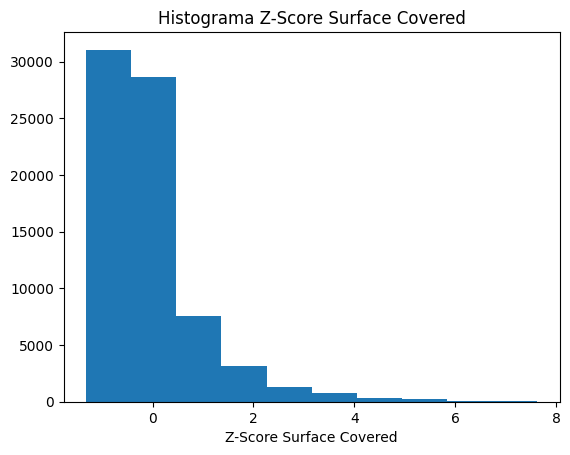

In [129]:
plt.hist(z_covered_ds.z_property_surface_covered)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

**Latitud y Longitud**

In [130]:
z_latitud_ds = calculate_zscore_st(ds_train, ds_train.latitud)

In [131]:
# Train

print(
    f"Los outliers superiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

# Test

print(
    f"Los outliers superiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

Los outliers superiores de latitud en train son: 78. Constituyen al 0% de los datos
Los outliers superiores de latitud en test son: 78. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
209842  ixRG8+1byV5RBYM2jMjErA== 2021-07-22 2021-08-08 -33.081030 -68.468140   
102556  iYCZ0sBG3sJ8kQOchQnm2Q== 2021-05-28 2021-06-05 -32.961851 -60.628828   
45536   2ITWucolLr1c130cvc6zvw== 2021-05-02 2021-06-05 -32.065926 -64.527838   
61175   9iQt75eNK/qHEusRaz2rLQ== 2021-05-01 2021-06-05 -31.464181 -64.426088   
318763  21X2XW7KwPHKb73K0LDWUg== 2021-03-17 2021-06-05 -27.469213 -58.830635   
...                          ...        ...        ...        ...        ...   
107791  u74hqeFj1Cj8baglm/LrYg== 2021-07-16 2021-08-08 -33.762758 -61.966286   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.631190 -55.496357   
156989  fvqkY/3auYxSwcNuPnBVUQ== 2021-02-17 2021-03-01 -33.081030 -68.468140   
284385  VI55L0vKxTBvvMD4h0MjWQ== 2021-02-24 2021-03-29 -33.081030 -68.468140   
248772  bjxIbEY7mcbCYqnpCBMJcQ== 2021-04-29 2021-11-04 -27.469213 -58.830635   

       place_l3 property_type  property_rooms  property_bedrooms  \
209842      NaN            PH             3.0                2.0   
102556      NaN  Departamento             1.0                1.0   
45536       NaN          Casa             3.0                2.0   
61175       NaN          Casa             5.0                3.0   
318763      NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
107791      NaN          Casa             4.0                3.0   
234893      NaN  Departamento             4.0                3.0   
156989      NaN  Departamento             3.0                2.0   
284385      NaN  Departamento             3.0                2.0   
248772      NaN          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
209842                    52.0                      38.0         89000.0   
102556                    42.0                      42.0         85000.0   
45536                    307.0                     106.0        139000.0   
61175                    500.0                     200.0        208000.0   
318763                    55.0                      55.0        125000.0   
...                        ...                       ...             ...   
107791                   180.0                     160.0        154000.0   
234893                    98.0                      88.0        269000.0   
156989                    71.0                      67.0         93000.0   
284385                    62.0                      57.0         88000.0   
248772                   220.0                     220.0        295000.0   

                                           property_title  z_latitud  
209842        Hermoso PH en Villa Ballester 2 dormitorios  10.604146  
102556           VENTA DEPTO 1 DORMITORIO ZONA PELLEGRINI  11.439763  
45536   Se Vende Casa Amoblada en Santa Rosa de Calamu...  17.721482  
61175   Casa de categoría en venta 3 Dormitorios, 3 ba...  21.940575  
318763  2 Ambientes de 70 mts2 reciclado a Nuevo. Con ...  49.951031  
...                                                   ...        ...  
107791  VENTA Casa 4 ambientes en Los caracoles Maschwitz   5.824255  
234893  Venta departamento 4 amb Vicente Lopez con cochea  48.815340  
156989  VENTA DEPTO 3 AMB CON BALCON SAN MARTIN EXP BAJAS  10.604146  
284385   VENTA SAN MARTIN DEPARTAMENTO 3 AMB MUY LUMINOSO  10.604146  
248772  HERMOSA CASA Estilo Tradicional - DETALLES UNICOS  49.951031  

[78 rows x 14 columns]

In [132]:
# Train

print(
    f"Los outliers inferiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

# Test

print(
    f"Los outliers inferiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

Los outliers inferiores de latitud en train son: 5. Constituyen al 0% de los datos
Los outliers inferiores de latitud en test son: 5. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 -41.086352 -71.185720   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 -41.083002 -71.182747   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 -38.964493 -68.075830   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 -53.788624 -67.718089   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 -41.084900 -71.187159   

       place_l3 property_type  property_rooms  property_bedrooms  \
106297      NaN  Departamento             2.0                1.0   
131188      NaN  Departamento             2.0                1.0   
410404      NaN          Casa             7.0                5.0   
457631      NaN  Departamento             3.0                2.0   
105792      NaN  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
106297                    53.0                      53.0        145000.0   
131188                    66.0                      56.0        135000.0   
410404                   218.0                     218.0        230000.0   
457631                   121.0                     100.0        375000.0   
105792                    53.0                      53.0        145000.0   

                                           property_title   z_latitud  
106297  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...  -45.524644  
131188  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO   -45.501154  
410404  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...  -30.647370  
457631                Depto 3 ambientes Arboris Las Lomas -134.585786  
105792  Villa Huapi - Dina Huapi - Río Negro - APTO CR...  -45.514459

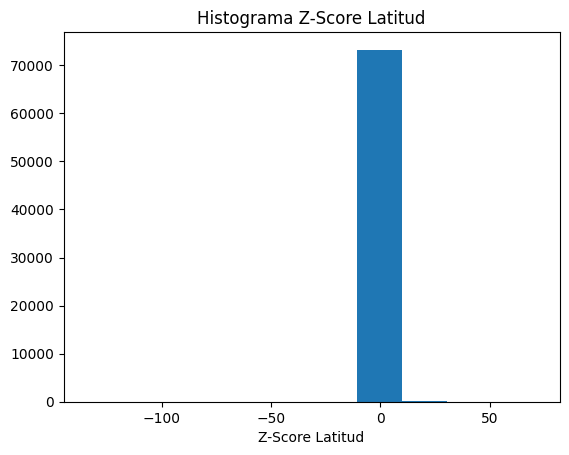

In [133]:
plt.hist(z_latitud_ds.z_latitud)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.show()

In [134]:
z_longitud_ds = calculate_zscore_st(ds_train, ds_train.longitud)
z_latitud_ds.head()

id start_date   end_date    latitud   longitud  \
246905  T1d2uwg2mrb8jlndfZTy5w== 2021-10-08 2022-02-20 -34.613560 -58.436845   
214507  SNtdz2yZJ9bFEKtLVfMdGQ== 2021-12-27 2022-01-27 -34.608650 -58.408870   
410704  1d/ZXQI90kkVumA6Q4kFog== 2021-03-02 2021-04-20 -34.625915 -58.520649   
137149  tj3+Udsk+N3j9Tc4sgViMQ== 2021-01-22 2021-06-30 -34.582098 -58.448859   
310802  izBngRb9/lTBT7mrPh5JIw== 2021-09-01 2021-09-02 -34.578438 -58.462492   

             place_l3 property_type  property_rooms  property_bedrooms  \
246905      Caballito  Departamento             4.0                3.0   
214507      Balvanera  Departamento             4.0                3.0   
410704      Versalles          Casa             3.0                2.0   
137149        Palermo  Departamento             2.0                1.0   
310802  Villa Ortuzar  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
246905                    72.0                      72.0        127000.0   
214507                   107.0                     103.0        165000.0   
410704                   151.0                     151.0        155000.0   
137149                    55.0                      50.0        142298.0   
310802                    79.0                      79.0        167900.0   

                                           property_title  z_latitud  
246905  RECICLADO A NUEVO!! Hermoso Departamento 4 Amb...  -0.141090  
214507  Departamento 4 Amb c/dep.serv al Frente c/Coch...  -0.106661  
410704           CASA A RECICLAR - EN VENTA - VERSALLES!   -0.227717  
137149                   Venta - Newbery Jorge  3445 5º A   0.079506  
310802     VENTA DEPARTAMENTO 4 AMBIENTES - VILLA ORTUZAR   0.105168

In [135]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

# Test

print(
    f"Los outliers superiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

Los outliers superiores de longitud en train son: 5. Constituyen al 0% de los datos
Los outliers superiores de longitud en test son: 5. Constituyen al 0% de los datos


id start_date   end_date   latitud   longitud  \
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   

       place_l3 property_type  property_rooms  property_bedrooms  \
173667      NaN  Departamento             4.0                3.0   
134196      NaN          Casa             4.0                2.0   
187631      NaN  Departamento             5.0                4.0   
220851      NaN          Casa             4.0                2.0   
234893      NaN  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
173667                    98.0                      88.0        269000.0   
134196                   105.0                     105.0        200000.0   
187631                   158.0                     150.0        380000.0   
220851                   105.0                     105.0        190000.0   
234893                    98.0                      88.0        269000.0   

                                           property_title  z_longitud  
173667  Venta departamento 4 amb Vicente Lopez con cochea   12.386431  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.404692  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    3.731878  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.404692  
234893  Venta departamento 4 amb Vicente Lopez con cochea   12.386431

In [136]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

Los outliers inferiores de longitud en train son: 75. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 75. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
209842  ixRG8+1byV5RBYM2jMjErA== 2021-07-22 2021-08-08 -33.081030 -68.468140   
102556  iYCZ0sBG3sJ8kQOchQnm2Q== 2021-05-28 2021-06-05 -32.961851 -60.628828   
45536   2ITWucolLr1c130cvc6zvw== 2021-05-02 2021-06-05 -32.065926 -64.527838   
61175   9iQt75eNK/qHEusRaz2rLQ== 2021-05-01 2021-06-05 -31.464181 -64.426088   
25574   5AF0wjAb/TIyttOJjURixw== 2021-06-24 2022-02-09 -33.081030 -68.468140   
...                          ...        ...        ...        ...        ...   
226093  /3HzGdxDHF3F6Syq9x0Ptg== 2021-01-09 2021-01-10 -33.081030 -68.468140   
57093   1ZEWcMLZlEAFQteSlGdqKw== 2021-04-20 2021-04-25 -34.009160 -63.924113   
107791  u74hqeFj1Cj8baglm/LrYg== 2021-07-16 2021-08-08 -33.762758 -61.966286   
156989  fvqkY/3auYxSwcNuPnBVUQ== 2021-02-17 2021-03-01 -33.081030 -68.468140   
284385  VI55L0vKxTBvvMD4h0MjWQ== 2021-02-24 2021-03-29 -33.081030 -68.468140   

       place_l3 property_type  property_rooms  property_bedrooms  \
209842      NaN            PH             3.0                2.0   
102556      NaN  Departamento             1.0                1.0   
45536       NaN          Casa             3.0                2.0   
61175       NaN          Casa             5.0                3.0   
25574       NaN  Departamento             3.0                2.0   
...         ...           ...             ...                ...   
226093      NaN  Departamento             2.0                1.0   
57093       NaN  Departamento             2.0                1.0   
107791      NaN          Casa             4.0                3.0   
156989      NaN  Departamento             3.0                2.0   
284385      NaN  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
209842                    52.0                      38.0         89000.0   
102556                    42.0                      42.0         85000.0   
45536                    307.0                     106.0        139000.0   
61175                    500.0                     200.0        208000.0   
25574                     66.0                      60.0         75000.0   
...                        ...                       ...             ...   
226093                    51.0                      51.0         85000.0   
57093                     43.0                      40.0         84000.0   
107791                   180.0                     160.0        154000.0   
156989                    71.0                      67.0         93000.0   
284385                    62.0                      57.0         88000.0   

                                           property_title  z_longitud  
209842        Hermoso PH en Villa Ballester 2 dormitorios  -42.103116  
102556           VENTA DEPTO 1 DORMITORIO ZONA PELLEGRINI   -9.173136  
45536   Se Vende Casa Amoblada en Santa Rosa de Calamu...  -25.551401  
61175   Casa de categoría en venta 3 Dormitorios, 3 ba...  -25.123987  
25574     Venta 3 ambientes San Martín Centro Gran VISTA   -42.103116  
...                                                   ...         ...  
226093  Vta. 2 Amb. Pozo "Las Victorias Plaza". Entr. ...  -42.103116  
57093     Venta Depto 2amb c/balcon a Estrenar Saenz Peña  -23.015380  
107791  VENTA Casa 4 ambientes en Los caracoles Maschwitz  -14.791290  
156989  VENTA DEPTO 3 AMB CON BALCON SAN MARTIN EXP BAJAS  -42.103116  
284385   VENTA SAN MARTIN DEPARTAMENTO 3 AMB MUY LUMINOSO  -42.103116  

[75 rows x 14 columns]

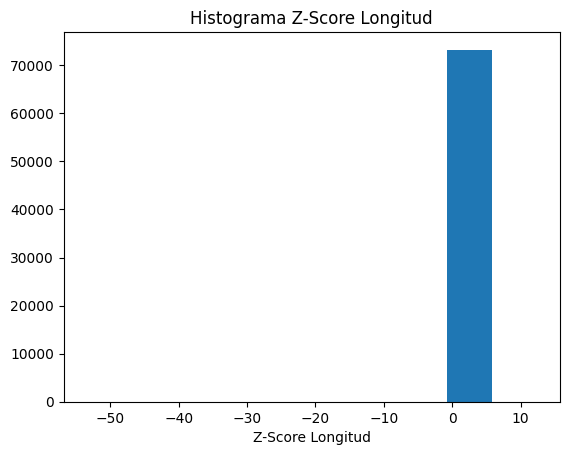

In [137]:
plt.hist(z_longitud_ds.z_longitud)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.show()

**Metodo Z Score modificado**

In [138]:
def calculate_modified_zscore_st(dataset, column):
    new_df = dataset.copy()
    mediana = column.median()
    MAD = np.absolute(column - mediana).median()

    new_df[f'zm_{column.name}'] = (column - mediana) * 0.6745 / MAD
    return new_df

**Ambientes**

In [139]:
zm_rooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_rooms)

In [140]:
# Train

print(
    f"Los outliers superiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de rooms en test son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

Los outliers superiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de rooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

In [141]:
# Train

print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

# Test


print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

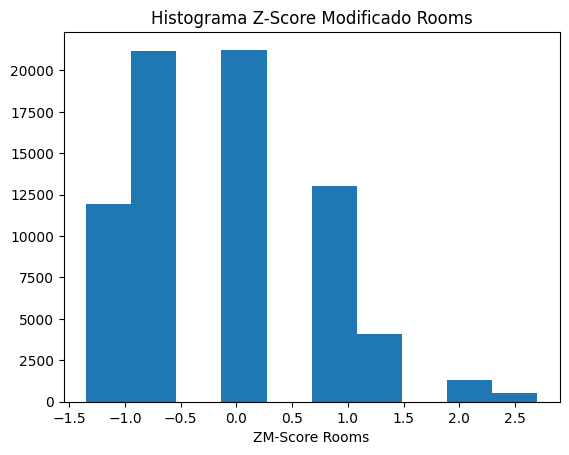

In [142]:
plt.hist(zm_rooms_ds.zm_property_rooms)
plt.title('Histograma Z-Score Modificado Rooms')
plt.xlabel('ZM-Score Rooms')
plt.show()

**Habitaciones**

In [143]:
zm_bedrooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_bedrooms)

In [144]:
# Train

print(
    f"Los outliers superiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

Los outliers superiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

In [145]:
# Train

print(
    f"Los outliers inferiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

# Test

print(
    f"Los outliers inferiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

Los outliers inferiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

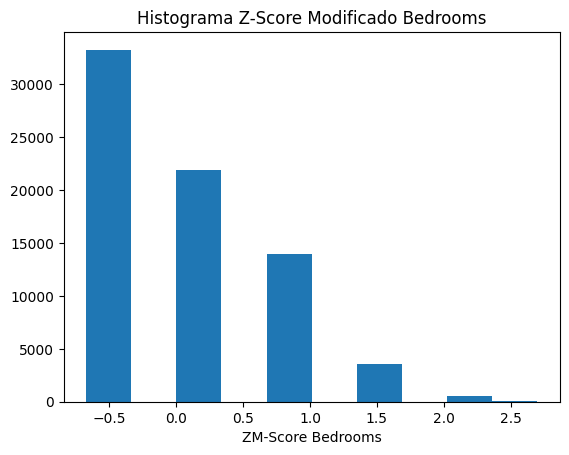

In [146]:
plt.hist(zm_bedrooms_ds.zm_property_bedrooms)
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.xlabel('ZM-Score Bedrooms')
plt.show()

**Superficie Total**

In [147]:
zm_total_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_total)
zm_total_ds.head()

id start_date   end_date    latitud   longitud  \
246905  T1d2uwg2mrb8jlndfZTy5w== 2021-10-08 2022-02-20 -34.613560 -58.436845   
214507  SNtdz2yZJ9bFEKtLVfMdGQ== 2021-12-27 2022-01-27 -34.608650 -58.408870   
410704  1d/ZXQI90kkVumA6Q4kFog== 2021-03-02 2021-04-20 -34.625915 -58.520649   
137149  tj3+Udsk+N3j9Tc4sgViMQ== 2021-01-22 2021-06-30 -34.582098 -58.448859   
310802  izBngRb9/lTBT7mrPh5JIw== 2021-09-01 2021-09-02 -34.578438 -58.462492   

             place_l3 property_type  property_rooms  property_bedrooms  \
246905      Caballito  Departamento             4.0                3.0   
214507      Balvanera  Departamento             4.0                3.0   
410704      Versalles          Casa             3.0                2.0   
137149        Palermo  Departamento             2.0                1.0   
310802  Villa Ortuzar  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
246905                    72.0                      72.0        127000.0   
214507                   107.0                     103.0        165000.0   
410704                   151.0                     151.0        155000.0   
137149                    55.0                      50.0        142298.0   
310802                    79.0                      79.0        167900.0   

                                           property_title  \
246905  RECICLADO A NUEVO!! Hermoso Departamento 4 Amb...   
214507  Departamento 4 Amb c/dep.serv al Frente c/Coch...   
410704           CASA A RECICLAR - EN VENTA - VERSALLES!    
137149                   Venta - Newbery Jorge  3445 5º A   
310802     VENTA DEPARTAMENTO 4 AMBIENTES - VILLA ORTUZAR   

        zm_property_surface_total  
246905                   0.224833  
214507                   1.208479  
410704                   2.445063  
137149                  -0.252937  
310802                   0.421563

In [148]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

Los outliers superiores de sup total en train son: 5444. Constituyen al 7% de los datos
Los outliers superiores de sup total en test son: 5444. Constituyen al 30% de los datos


id start_date   end_date    latitud   longitud  \
133466  ayVCJLcCsiSfZsiRt5Y9GA== 2021-02-18 2021-03-08 -34.562451 -58.453956   
103975  RxLrunqFNAzENYSbhHB/8A== 2021-05-28 2021-06-05 -34.593326 -58.405087   
36875   CbMQaNWhgGiXPGNy6KY/lQ== 2021-09-21 2021-09-30 -34.591371 -58.405355   
243284  JSc4zxTvmC6R+wWYDuphcQ== 2021-02-11 2021-03-18 -34.557254 -58.445597   
108021  FszoFrRdgghakh2P7TsYWg== 2021-07-16 2021-07-17 -34.655957 -58.517453   
...                          ...        ...        ...        ...        ...   
272850  uGqWSxu99KjzOduuxJO/+Q== 2021-02-21 2021-09-11 -34.610060 -58.361354   
327340  0cjKMkI/sPDxoFveItdN4Q== 2021-12-14 2022-01-26 -34.593353 -58.419663   
102783  gQt6LcCGkefz+tjzn6cNtg== 2021-05-28 2021-06-05 -34.572211 -58.421198   
33508   2L7pa7oEVXJfnpnKXgPSFw== 2021-02-08 2021-03-10 -34.576255 -58.405259   
258429  f5Bh5q+tktDbbqH399RPmg== 2021-11-03 2022-01-27 -34.576814 -58.465850   

             place_l3 property_type  property_rooms  property_bedrooms  \
133466       Belgrano  Departamento             7.0                4.0   
103975   Barrio Norte  Departamento             5.0                4.0   
36875        Recoleta  Departamento             5.0                4.0   
243284       Belgrano  Departamento             5.0                3.0   
108021      Mataderos          Casa             4.0                3.0   
...               ...           ...             ...                ...   
272850  Puerto Madero  Departamento             4.0                3.0   
327340        Palermo            PH             5.0                4.0   
102783        Palermo  Departamento             5.0                3.0   
33508         Palermo  Departamento             7.0                4.0   
258429  Villa Ortuzar  Departamento             6.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
133466                   297.0                     297.0        890000.0   
103975                   220.0                     220.0        600000.0   
36875                    284.0                     184.0        540000.0   
243284                   235.0                     235.0       1390000.0   
108021                   238.0                     173.0        365000.0   
...                        ...                       ...             ...   
272850                   253.0                     253.0       1700000.0   
327340                   250.0                     150.0        360000.0   
102783                   192.0                     166.0        885000.0   
33508                    280.0                     260.0       1200000.0   
258429                   300.0                     300.0        850000.0   

                                           property_title  \
133466  RETASADO VENTA importante piso ALTO en edifici...   
103975  Venta Departamento Barrio Norte piso 220m2 tor...   
36875   VENTA DEPTO DUPLEX4 AMB DEP RECOLETA  JARDIN C...   
243284                      Departamento - Belgrano Chico   
108021  Casa en venta Barrio Naon Mataderos Amplio Patio    
...                                                   ...   
272850                       Departamento - Puerto Madero   
327340                                       PH - Palermo   
102783  Excelente semipiso sobre Avenida del Libertado...   
33508    VENTA DEPARTAMENTO 7 AMBIENTES EN BARRIO PARQUE!   
258429  Piso de categoria hecho a nuevo en pleno Belgr...   

        zm_property_surface_total  
133466                   6.548271  
103975                   4.384250  
36875                    6.182917  
243284                   4.805813  
108021                   4.890125  
...                           ...  
272850                   5.311687  
327340                   5.227375  
102783                   3.597333  
33508                    6.070500  
258429                   6.632583  

[5444 rows x 14 columns]

In [149]:
# Train

print(
    f"Los outliers inferiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

Los outliers inferiores de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_total]
Index: []

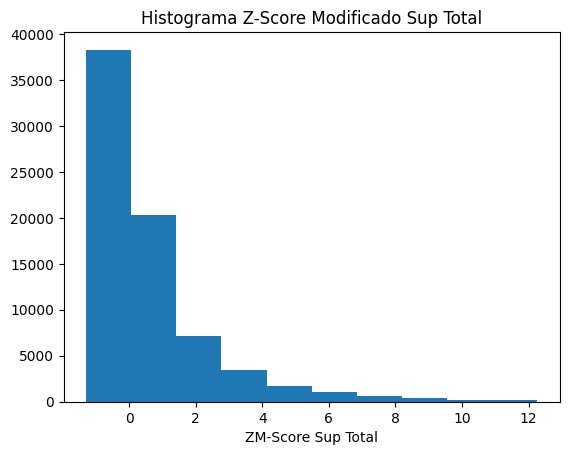

In [150]:
plt.hist(zm_total_ds.zm_property_surface_total)
plt.title('Histograma Z-Score Modificado Sup Total')
plt.xlabel('ZM-Score Sup Total')
plt.show()

**Superficie Cubierta**

In [151]:
zm_covered_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_covered)

In [152]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

Los outliers superiores de sup cubierta en train son: 7% de los datos
Los outliers superiores de sup cubierta en test son: 29% de los datos


id start_date   end_date    latitud   longitud  \
159308  jmFQq5MgkGpQfB9t5pYv7g== 2021-11-13 2022-01-27 -34.563584 -58.442879   
133466  ayVCJLcCsiSfZsiRt5Y9GA== 2021-02-18 2021-03-08 -34.562451 -58.453956   
103975  RxLrunqFNAzENYSbhHB/8A== 2021-05-28 2021-06-05 -34.593326 -58.405087   
36875   CbMQaNWhgGiXPGNy6KY/lQ== 2021-09-21 2021-09-30 -34.591371 -58.405355   
243284  JSc4zxTvmC6R+wWYDuphcQ== 2021-02-11 2021-03-18 -34.557254 -58.445597   
...                          ...        ...        ...        ...        ...   
102783  gQt6LcCGkefz+tjzn6cNtg== 2021-05-28 2021-06-05 -34.572211 -58.421198   
33508   2L7pa7oEVXJfnpnKXgPSFw== 2021-02-08 2021-03-10 -34.576255 -58.405259   
69555   lzoN59lfjpwunHnAhhGuiQ== 2021-09-23 2022-03-09 -34.578159 -58.407252   
258429  f5Bh5q+tktDbbqH399RPmg== 2021-11-03 2022-01-27 -34.576814 -58.465850   
169912  HYD5mYaP6gMtpqNmeSL2Mg== 2021-07-28 2021-07-31 -34.582722 -58.414936   

             place_l3 property_type  property_rooms  property_bedrooms  \
159308        Palermo  Departamento             4.0                3.0   
133466       Belgrano  Departamento             7.0                4.0   
103975   Barrio Norte  Departamento             5.0                4.0   
36875        Recoleta  Departamento             5.0                4.0   
243284       Belgrano  Departamento             5.0                3.0   
...               ...           ...             ...                ...   
102783        Palermo  Departamento             5.0                3.0   
33508         Palermo  Departamento             7.0                4.0   
69555         Palermo  Departamento             4.0                3.0   
258429  Villa Ortuzar  Departamento             6.0                4.0   
169912        Palermo  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
159308                   180.0                     170.0        460000.0   
133466                   297.0                     297.0        890000.0   
103975                   220.0                     220.0        600000.0   
36875                    284.0                     184.0        540000.0   
243284                   235.0                     235.0       1390000.0   
...                        ...                       ...             ...   
102783                   192.0                     166.0        885000.0   
33508                    280.0                     260.0       1200000.0   
69555                    176.0                     176.0        720000.0   
258429                   300.0                     300.0        850000.0   
169912                   181.0                     171.0        580000.0   

                                           property_title  \
159308                         Departamento - Las Cañitas   
133466  RETASADO VENTA importante piso ALTO en edifici...   
103975  Venta Departamento Barrio Norte piso 220m2 tor...   
36875   VENTA DEPTO DUPLEX4 AMB DEP RECOLETA  JARDIN C...   
243284                      Departamento - Belgrano Chico   
...                                                   ...   
102783  Excelente semipiso sobre Avenida del Libertado...   
33508    VENTA DEPARTAMENTO 7 AMBIENTES EN BARRIO PARQUE!   
69555                              Departamento - Palermo   
258429  Piso de categoria hecho a nuevo en pleno Belgr...   
169912  VENTA DEPARTAMENTO 4 AMBIENTES PALERMO COCHERA...   

        zm_property_surface_covered  
159308                     3.810925  
133466                     8.094000  
103975                     5.497175  
36875                      4.283075  
243284                     6.003050  
...                             ...  
102783                     3.676025  
33508                      6.846175  
69555                      4.013275  
258429                     8.195175  
169912                     3.844650  

[5209 rows x 14 columns]

In [153]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_covered]
Index: []

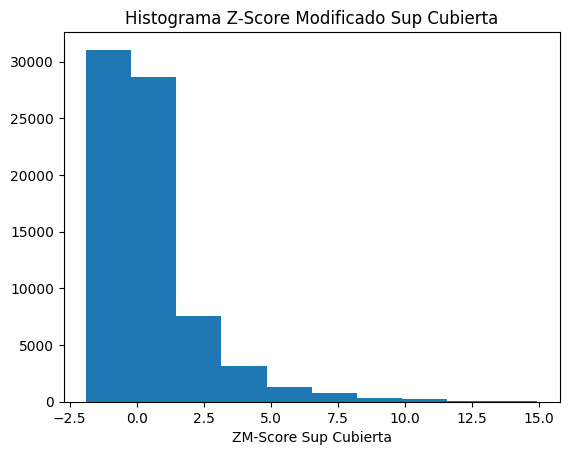

In [154]:
plt.hist(zm_covered_ds.zm_property_surface_covered)
plt.title('Histograma Z-Score Modificado Sup Cubierta')
plt.xlabel('ZM-Score Sup Cubierta')
plt.show()

**Latitud y longitud**

In [155]:
zm_latitud_ds = calculate_modified_zscore_st(ds_train, ds_train.latitud)

In [156]:
# Train

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

Los outliers superiores de latitud son: 0% de los datos
Los outliers superiores de latitud son: 0% de los datos


id start_date   end_date    latitud   longitud  \
209842  ixRG8+1byV5RBYM2jMjErA== 2021-07-22 2021-08-08 -33.081030 -68.468140   
102556  iYCZ0sBG3sJ8kQOchQnm2Q== 2021-05-28 2021-06-05 -32.961851 -60.628828   
45536   2ITWucolLr1c130cvc6zvw== 2021-05-02 2021-06-05 -32.065926 -64.527838   
61175   9iQt75eNK/qHEusRaz2rLQ== 2021-05-01 2021-06-05 -31.464181 -64.426088   
318763  21X2XW7KwPHKb73K0LDWUg== 2021-03-17 2021-06-05 -27.469213 -58.830635   
...                          ...        ...        ...        ...        ...   
107791  u74hqeFj1Cj8baglm/LrYg== 2021-07-16 2021-08-08 -33.762758 -61.966286   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.631190 -55.496357   
156989  fvqkY/3auYxSwcNuPnBVUQ== 2021-02-17 2021-03-01 -33.081030 -68.468140   
284385  VI55L0vKxTBvvMD4h0MjWQ== 2021-02-24 2021-03-29 -33.081030 -68.468140   
248772  bjxIbEY7mcbCYqnpCBMJcQ== 2021-04-29 2021-11-04 -27.469213 -58.830635   

       place_l3 property_type  property_rooms  property_bedrooms  \
209842      NaN            PH             3.0                2.0   
102556      NaN  Departamento             1.0                1.0   
45536       NaN          Casa             3.0                2.0   
61175       NaN          Casa             5.0                3.0   
318763      NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
107791      NaN          Casa             4.0                3.0   
234893      NaN  Departamento             4.0                3.0   
156989      NaN  Departamento             3.0                2.0   
284385      NaN  Departamento             3.0                2.0   
248772      NaN          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
209842                    52.0                      38.0         89000.0   
102556                    42.0                      42.0         85000.0   
45536                    307.0                     106.0        139000.0   
61175                    500.0                     200.0        208000.0   
318763                    55.0                      55.0        125000.0   
...                        ...                       ...             ...   
107791                   180.0                     160.0        154000.0   
234893                    98.0                      88.0        269000.0   
156989                    71.0                      67.0         93000.0   
284385                    62.0                      57.0         88000.0   
248772                   220.0                     220.0        295000.0   

                                           property_title  zm_latitud  
209842        Hermoso PH en Villa Ballester 2 dormitorios   53.572852  
102556           VENTA DEPTO 1 DORMITORIO ZONA PELLEGRINI   57.789038  
45536   Se Vende Casa Amoblada en Santa Rosa de Calamu...   89.484048  
61175   Casa de categoría en venta 3 Dormitorios, 3 ba...  110.771884  
318763  2 Ambientes de 70 mts2 reciclado a Nuevo. Con ...  252.101295  
...                                                   ...         ...  
107791  VENTA Casa 4 ambientes en Los caracoles Maschwitz   29.455459  
234893  Venta departamento 4 amb Vicente Lopez con cochea  246.371061  
156989  VENTA DEPTO 3 AMB CON BALCON SAN MARTIN EXP BAJAS   53.572852  
284385   VENTA SAN MARTIN DEPARTAMENTO 3 AMB MUY LUMINOSO   53.572852  
248772  HERMOSA CASA Estilo Tradicional - DETALLES UNICOS  252.101295  

[78 rows x 14 columns]

In [157]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 16. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 16. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
208451  r5h8YGMTL3OG6u8wekYDWg== 2021-02-01 2021-05-02 -34.694366 -58.468208   
271609  pMxqmA1WxzslUoiQPG4qFg== 2021-06-19 2021-07-05 -34.694451 -58.467532   
82540   j0CggSFoqC9J+F1N9h91wg== 2021-03-12 2021-03-13 -34.698989 -58.469994   
106297  oqSIUrrkBRMakJoEW/hYPg== 2021-03-11 2021-06-05 -41.086352 -71.185720   
411779  jt4VEm3y2Ktb573eFDHQUw== 2021-03-02 2021-03-12 -34.698989 -58.469994   
131188  Qmi68tFcN9DiyOJjVmGvYg== 2021-05-27 2021-06-05 -41.083002 -71.182747   
410404  KeQ40Z6VTXMHoq4j8oOp+A== 2021-03-02 2021-06-05 -38.964493 -68.075830   
65844   0tGMaOsXgkOAnx8GSH1pmA== 2021-05-15 2021-05-25 -34.698989 -58.469994   
308365  j4l0DxeSfN6KnNMYSo6bSg== 2021-04-28 2021-05-01 -34.694900 -58.469161   
250707  n/VGq/lp+AH1XRd4RSHphg== 2021-04-29 2021-05-15 -34.698989 -58.469994   
457631  ZskNGaMaM9MxJ4seQfgjtg== 2021-05-08 2021-08-08 -53.788624 -67.718089   
351916  BKk+pz+G7Tajvr6LE+9UZw== 2021-06-25 2021-07-17 -34.694900 -58.469161   
171545  2IMMhWMUVZd6htI0Xo9m8Q== 2021-04-19 2021-06-05 -34.694322 -58.469549   
105792  LHDYXTfhEERw7S90k5WA+Q== 2021-03-11 2021-06-05 -41.084900 -71.187159   
270589  tQfZpYXLoOwWd990nrLpBg== 2021-07-13 2021-10-16 -34.694451 -58.467532   
317537  x1BlLb49Up0aSX9yuzhrMw== 2021-09-29 2022-03-25 -34.698989 -58.469994   

               place_l3 property_type  property_rooms  property_bedrooms  \
208451     Villa Lugano  Departamento             2.0                1.0   
271609     Villa Lugano          Casa             3.0                2.0   
82540   Villa Riachuelo  Departamento             4.0                3.0   
106297              NaN  Departamento             2.0                1.0   
411779  Villa Riachuelo  Departamento             4.0                3.0   
131188              NaN  Departamento             2.0                1.0   
410404              NaN          Casa             7.0                5.0   
65844   Villa Riachuelo  Departamento             4.0                3.0   
308365     Villa Lugano          Casa             2.0                1.0   
250707  Villa Riachuelo  Departamento             4.0                3.0   
457631              NaN  Departamento             3.0                2.0   
351916     Villa Lugano          Casa             2.0                1.0   
171545     Villa Lugano            PH             3.0                2.0   
105792              NaN  Departamento             1.0                1.0   
270589     Villa Lugano          Casa             3.0                2.0   
317537  Villa Riachuelo  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
208451                    74.0                      42.0        118000.0   
271609                    70.0                      50.0         69000.0   
82540                     91.0                      79.0         65000.0   
106297                    53.0                      53.0        145000.0   
411779                    91.0                      79.0         65000.0   
131188                    66.0                      56.0        135000.0   
410404                   218.0                     218.0        230000.0   
65844                     91.0                      79.0         59900.0   
308365                    80.0                      80.0        159000.0   
250707                    91.0                      79.0         59900.0   
457631                   121.0                     100.0        375000.0   
351916                    72.0                      72.0        149000.0   
171545                    70.0                      70.0        229000.0   
105792                    53.0                      53.0        145000.0   
270589                    70.0                      50.0         69000.0   
317537                    91.0                      79.0         59900.0   

                                           property_title  zm_latitud  
208451  Se 

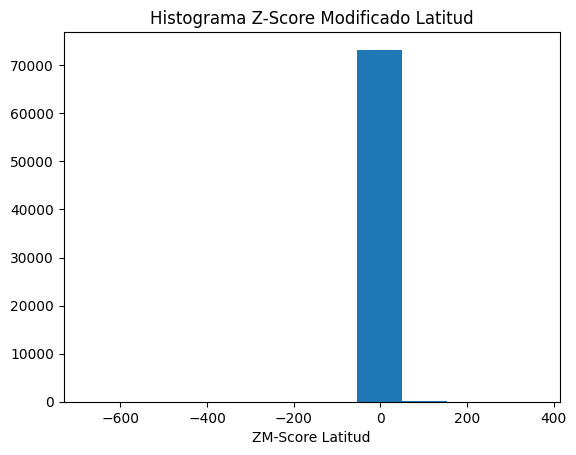

In [158]:
plt.hist(zm_latitud_ds.zm_latitud)
plt.title('Histograma Z-Score Modificado Latitud')
plt.xlabel('ZM-Score Latitud')
plt.show()

In [159]:
zm_longitud_ds = calculate_modified_zscore_st(ds_train, ds_train.longitud)

In [160]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de longitud en test son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

Los outliers superiores de longitud en train son: 0% de los datos
Los outliers superiores de longitud en test son: 0% de los datos


id start_date   end_date   latitud   longitud  \
173667  NPA86ettFBDIW2fcHGhq9Q== 2021-05-11 2021-05-12 -27.63119 -55.496357   
134196  s3z8Y8u6UYiGamjl7GKWUA== 2021-04-06 2021-04-25 -27.58162 -56.682310   
187631  kQaGoFd//JEG6YJEilDGzg== 2021-06-05 2021-08-26 -29.68992 -57.556660   
220851  /4CiKZFK0D3wJRClv4OO8Q== 2021-06-30 2021-07-02 -27.58162 -56.682310   
234893  FmDOCgqTy/T9iZXvORmyuw== 2021-06-02 2021-06-18 -27.63119 -55.496357   

       place_l3 property_type  property_rooms  property_bedrooms  \
173667      NaN  Departamento             4.0                3.0   
134196      NaN          Casa             4.0                2.0   
187631      NaN  Departamento             5.0                4.0   
220851      NaN          Casa             4.0                2.0   
234893      NaN  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
173667                    98.0                      88.0        269000.0   
134196                   105.0                     105.0        200000.0   
187631                   158.0                     150.0        380000.0   
220851                   105.0                     105.0        190000.0   
234893                    98.0                      88.0        269000.0   

                                           property_title  zm_longitud  
173667  Venta departamento 4 amb Vicente Lopez con cochea    70.752419  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.234380  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    21.209307  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.234380  
234893  Venta departamento 4 amb Vicente Lopez con cochea    70.752419

In [161]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

Los outliers inferiores de longitud en train son: 78. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 78. Constituyen al 0% de los datos


id start_date   end_date    latitud   longitud  \
209842  ixRG8+1byV5RBYM2jMjErA== 2021-07-22 2021-08-08 -33.081030 -68.468140   
102556  iYCZ0sBG3sJ8kQOchQnm2Q== 2021-05-28 2021-06-05 -32.961851 -60.628828   
45536   2ITWucolLr1c130cvc6zvw== 2021-05-02 2021-06-05 -32.065926 -64.527838   
61175   9iQt75eNK/qHEusRaz2rLQ== 2021-05-01 2021-06-05 -31.464181 -64.426088   
318763  21X2XW7KwPHKb73K0LDWUg== 2021-03-17 2021-06-05 -27.469213 -58.830635   
...                          ...        ...        ...        ...        ...   
57093   1ZEWcMLZlEAFQteSlGdqKw== 2021-04-20 2021-04-25 -34.009160 -63.924113   
107791  u74hqeFj1Cj8baglm/LrYg== 2021-07-16 2021-08-08 -33.762758 -61.966286   
156989  fvqkY/3auYxSwcNuPnBVUQ== 2021-02-17 2021-03-01 -33.081030 -68.468140   
284385  VI55L0vKxTBvvMD4h0MjWQ== 2021-02-24 2021-03-29 -33.081030 -68.468140   
248772  bjxIbEY7mcbCYqnpCBMJcQ== 2021-04-29 2021-11-04 -27.469213 -58.830635   

       place_l3 property_type  property_rooms  property_bedrooms  \
209842      NaN            PH             3.0                2.0   
102556      NaN  Departamento             1.0                1.0   
45536       NaN          Casa             3.0                2.0   
61175       NaN          Casa             5.0                3.0   
318763      NaN  Departamento             2.0                1.0   
...         ...           ...             ...                ...   
57093       NaN  Departamento             2.0                1.0   
107791      NaN          Casa             4.0                3.0   
156989      NaN  Departamento             3.0                2.0   
284385      NaN  Departamento             3.0                2.0   
248772      NaN          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
209842                    52.0                      38.0         89000.0   
102556                    42.0                      42.0         85000.0   
45536                    307.0                     106.0        139000.0   
61175                    500.0                     200.0        208000.0   
318763                    55.0                      55.0        125000.0   
...                        ...                       ...             ...   
57093                     43.0                      40.0         84000.0   
107791                   180.0                     160.0        154000.0   
156989                    71.0                      67.0         93000.0   
284385                    62.0                      57.0         88000.0   
248772                   220.0                     220.0        295000.0   

                                           property_title  zm_longitud  
209842        Hermoso PH en Villa Ballester 2 dormitorios  -241.173785  
102556           VENTA DEPTO 1 DORMITORIO ZONA PELLEGRINI   -52.665634  
45536   Se Vende Casa Amoblada en Santa Rosa de Calamu...  -146.423255  
61175   Casa de categoría en venta 3 Dormitorios, 3 ba...  -143.976517  
318763  2 Ambientes de 70 mts2 reciclado a Nuevo. Con ...    -9.425352  
...                                                   ...          ...  
57093     Venta Depto 2amb c/balcon a Estrenar Saenz Peña  -131.905761  
107791  VENTA Casa 4 ambientes en Los caracoles Maschwitz   -84.826841  
156989  VENTA DEPTO 3 AMB CON BALCON SAN MARTIN EXP BAJAS  -241.173785  
284385   VENTA SAN MARTIN DEPARTAMENTO 3 AMB MUY LUMINOSO  -241.173785  
248772  HERMOSA CASA Estilo Tradicional - DETALLES UNICOS    -9.425352  

[78 rows x 14 columns]

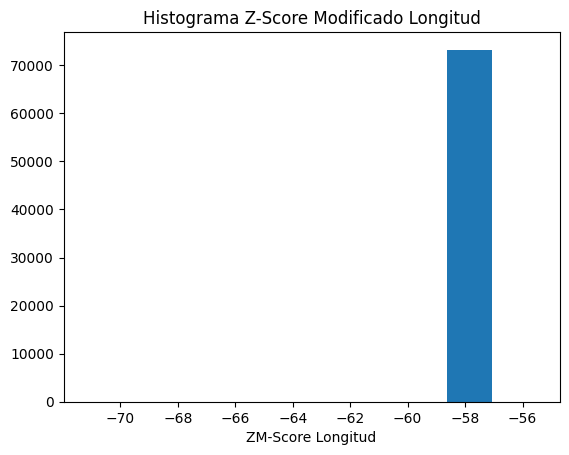

In [162]:
plt.hist(zm_longitud_ds.longitud)
plt.title('Histograma Z-Score Modificado Longitud')
plt.xlabel('ZM-Score Longitud')
plt.show()

#### Multivariados

**Clustering - Mahalanobis**

In [163]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X

In [164]:
def create_scatter_plot(dataset, col1, col2):
    #Scatter Plot
    plt.scatter(dataset[col1], dataset[col2])
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

In [165]:
def create_scattergram(dataset, col1, col2, outlier_limit):
    #Grafico scatter
    es_outlier = (dataset['mahalanobis'] > outlier_limit)

    sns.scatterplot(x=dataset[col1], y=dataset[col2], hue=es_outlier)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.show()

**Analisis entre ambientes y habitaciones de valores atipicos**

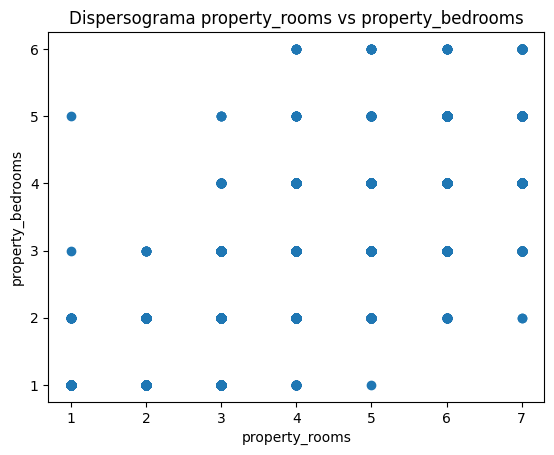

In [166]:
create_scatter_plot(ds_train, 'property_rooms', 'property_bedrooms')

In [167]:
mahalanobis_rooms_bedrooms_train = calculate_mahalanobis_distance(ds_train, 'property_rooms', 'property_bedrooms')
mahalanobis_rooms_bedrooms_test = calculate_mahalanobis_distance(ds_test, 'property_rooms', 'property_bedrooms')

mahalanobis_rooms_bedrooms_train.head()

property_rooms  property_bedrooms  mahalanobis
246905             4.0                3.0     1.576352
214507             4.0                3.0     1.576352
410704             3.0                2.0     0.038301
137149             2.0                1.0     1.142338
310802             4.0                3.0     1.576352

<AxesSubplot: ylabel='mahalanobis'>

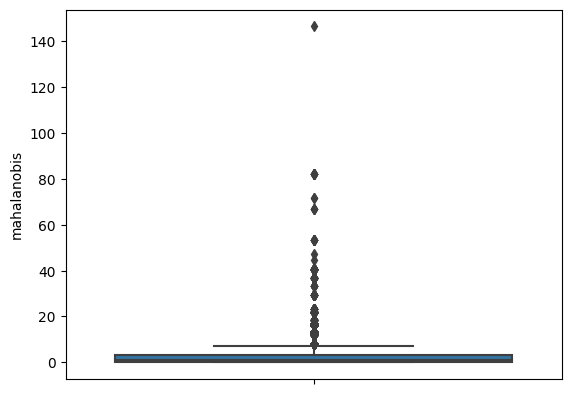

In [168]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train.mahalanobis)

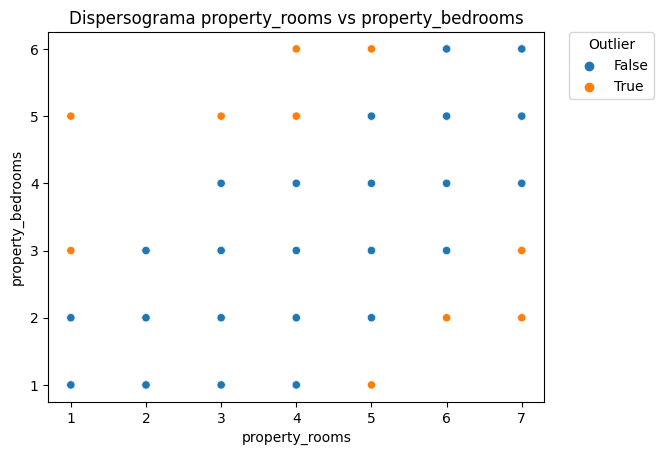

Los outliers para mahalanobis con un umbral de 35 son: 144. Constituyen el 0% de los datos


In [169]:
umbral = 35
create_scattergram(mahalanobis_rooms_bedrooms_train, 'property_rooms', 'property_bedrooms', umbral)

print(
    f"Los outliers para mahalanobis con un umbral de {umbral} son: {len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral])}. Constituyen el {(len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]) * 100) // len(ds_train)}% de los datos")

<AxesSubplot: ylabel='mahalanobis'>

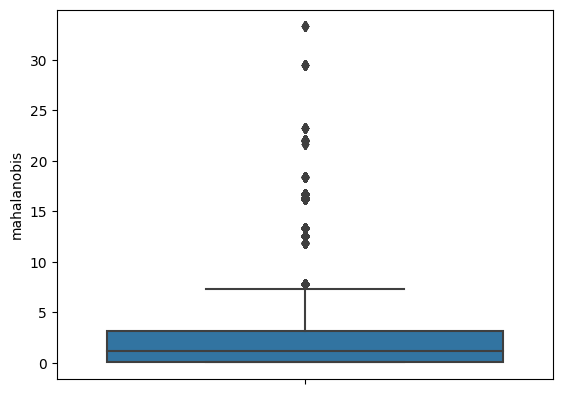

In [170]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] < umbral].mahalanobis)

In [171]:
mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]

property_rooms  property_bedrooms  mahalanobis
55910              7.0                3.0    36.551052
34437              4.0                5.0    40.066339
399545             7.0                3.0    36.551052
458670             5.0                6.0    53.247378
440123             6.0                2.0    40.588085
...                ...                ...          ...
104752             7.0                3.0    36.551052
385681             7.0                3.0    36.551052
327377             7.0                3.0    36.551052
98292              7.0                3.0    36.551052
304359             7.0                3.0    36.551052

[144 rows x 3 columns]

In [172]:
# Train

indice_outlier_train = mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 144 registros en train
Se han eliminado: 40 registros en test


Dispersograma sin los outliers mencionados


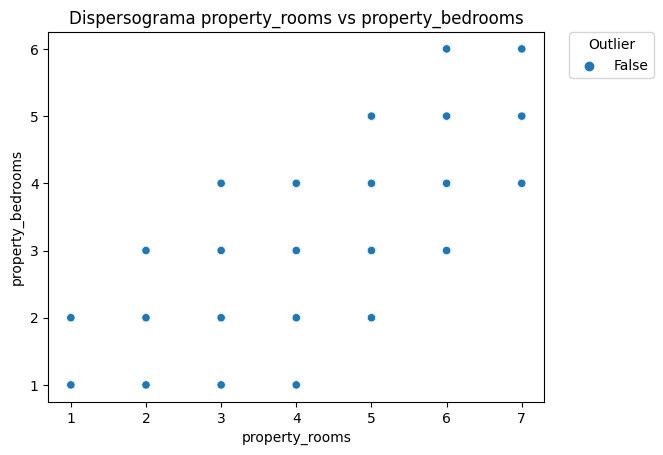

In [173]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test.mahalanobis < umbral],
                   'property_rooms',
                   'property_bedrooms', umbral)

**Analisis entre superficie total y superificie cubierta de valores atipicos**

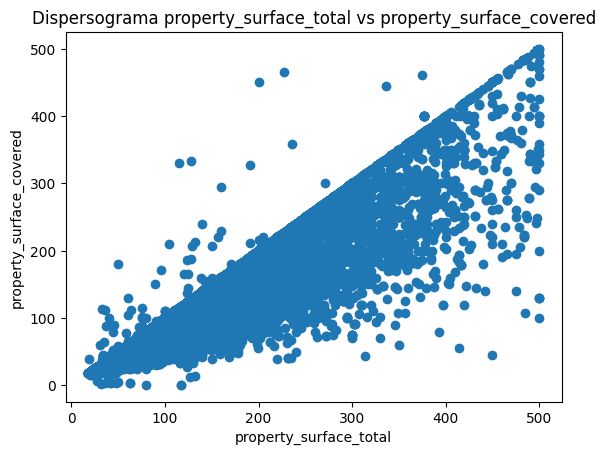

In [174]:
create_scatter_plot(ds_train, 'property_surface_total', 'property_surface_covered')

In [175]:
mahalanobis_surfaces_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total',
                                                            'property_surface_covered')
mahalanobis_surfaces_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total',
                                                           'property_surface_covered')

mahalanobis_surfaces_train.head()

property_surface_total  property_surface_covered  mahalanobis
246905                    72.0                      72.0     0.281352
214507                   107.0                     103.0     0.514917
410704                   151.0                     151.0     2.778473
137149                    55.0                      50.0     0.216513
310802                    79.0                      79.0     0.328139

<AxesSubplot: ylabel='mahalanobis'>

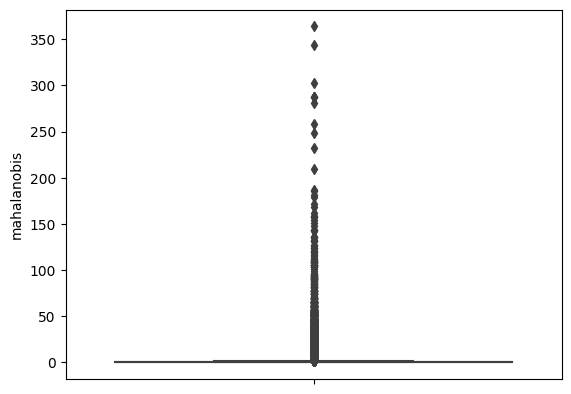

In [176]:
sns.boxplot(y=mahalanobis_surfaces_train.mahalanobis)

In [177]:
mahalanobis_surfaces_train.isna().sum()

property_surface_total      0
property_surface_covered    0
mahalanobis                 0
dtype: int64

In [178]:
#Defino umbral
umbral = 175  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral]

property_surface_total  property_surface_covered  mahalanobis
387598                   475.0                     140.0   232.097684
61175                    500.0                     200.0   178.753649
138208                   500.0                     100.0   343.565697
104359                   200.0                     450.0   257.720808
45540                    420.0                     120.0   186.109351
97055                    500.0                     130.0   287.451035
32735                    485.0                     108.0   302.479329
97083                    500.0                     130.0   287.451035
52468                    450.0                      45.0   363.936895
450430                   442.0                     140.0   186.459486
412681                   393.0                      80.0   209.116422
394706                   227.0                     466.0   248.923568
430838                   350.0                      60.0   181.369445
121279                   500.0                     130.0   287.451035
393711                   414.0                      56.0   280.758396

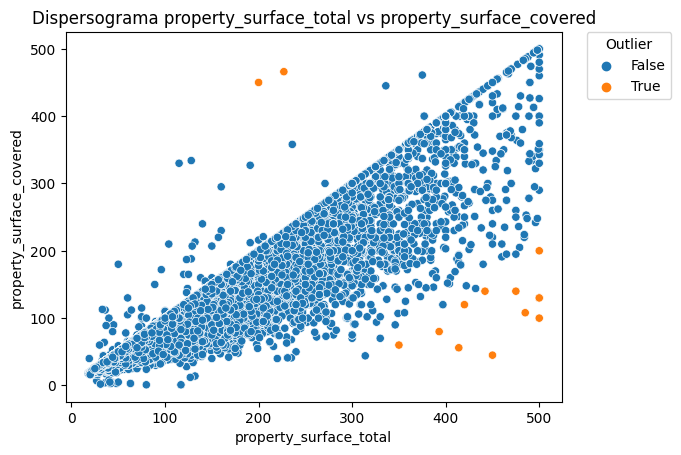

In [179]:
create_scattergram(mahalanobis_surfaces_train, 'property_surface_total', 'property_surface_covered', umbral)

In [180]:
# Train

indice_outlier_train = mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_surfaces_test[mahalanobis_surfaces_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 15 registros en train
Se han eliminado: 5 registros en test


Dispersograma sin los outliers mencionados


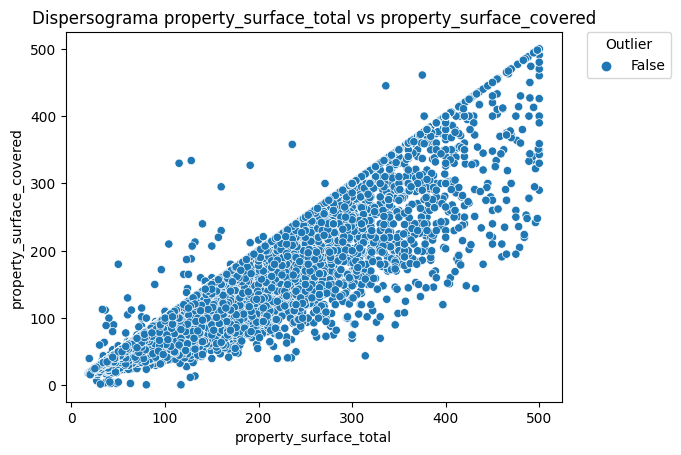

In [181]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_surfaces_train[mahalanobis_surfaces_train.mahalanobis < umbral],
                   'property_surface_total',
                   'property_surface_covered', umbral)

**Analisis entre latitud y logitud de valores atipicos**

In [182]:
mahalanobis_lat_long_train = calculate_mahalanobis_distance(ds_train, 'latitud', 'longitud')
mahalanobis_lat_long_test = calculate_mahalanobis_distance(ds_test, 'latitud', 'longitud')

In [183]:
#Defino umbral
umbral = 1  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]

El mínimo según el umbral es de: 160.37907094725023


latitud   longitud  mahalanobis
209842 -33.081030 -68.468140  1570.688745
102556 -32.961851 -60.628828   170.762271
45536  -32.065926 -64.527838   710.471045
318763 -27.469213 -58.830635  3063.032665
25574  -33.081030 -68.468140  1570.688745
...           ...        ...          ...
107791 -33.762758 -61.966286   196.408140
234893 -27.631190 -55.496357  3568.123727
156989 -33.081030 -68.468140  1570.688745
284385 -33.081030 -68.468140  1570.688745
248772 -27.469213 -58.830635  3063.032665

[79 rows x 3 columns]

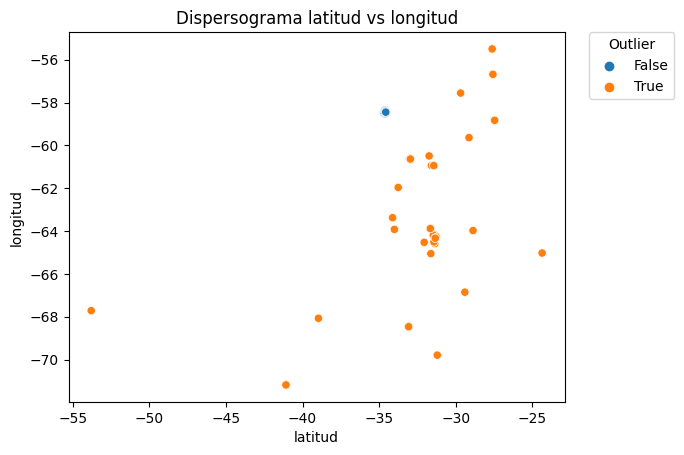

El grafico muestra 79 outliers
El mínimo según el umbral es de: 160.37907094725023


In [184]:
create_scattergram(mahalanobis_lat_long_train, 'latitud', 'longitud', umbral)
print(
    f"El grafico muestra {len(mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")

Dispersograma sin los outliers mencionados


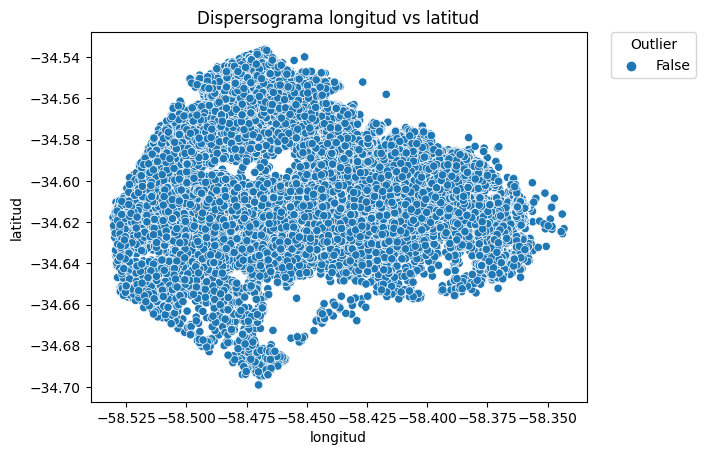

In [185]:
print("Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_lat_long_train[mahalanobis_lat_long_train.mahalanobis < umbral], 'longitud', 'latitud',
                   umbral)

In [186]:
# Train

indice_outlier_train = mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test


indice_outlier_test = mahalanobis_lat_long_test[mahalanobis_lat_long_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 79 registros en train
Se han eliminado: 25 registros en test


In [187]:
ds_train.place_l3.isna().sum()

40

In [188]:
ds_train.dropna(subset='place_l3', inplace=True)
ds_train.place_l3.isna().sum()

0

**Analisis entre superficie total y precio**

In [189]:
mahalanobis_price_surface_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_price')
mahalanobis_price_surface_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_price')

mahalanobis_price_surface_train['mahalanobis'].describe()

count    73049.000000
mean         2.404326
std         62.155734
min          0.000145
25%          0.199589
50%          0.428305
75%          0.736502
max      16494.404251
Name: mahalanobis, dtype: float64

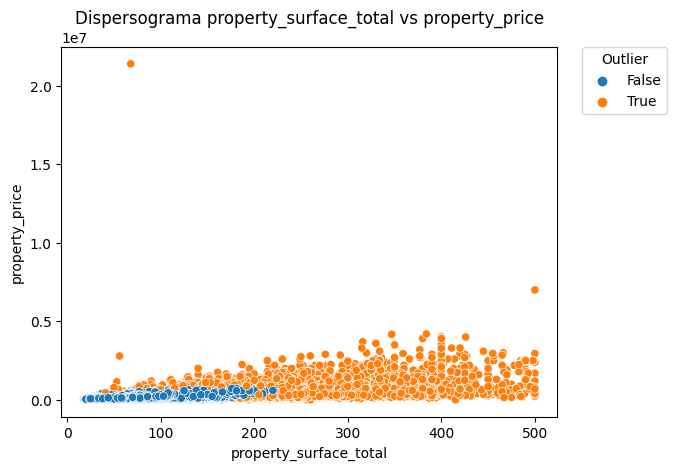

El grafico muestra 5260 outliers
El mínimo según el umbral es de: 5.003811660853444
Los outliers representan un 7.20064614163096%


In [190]:
umbral = 5
create_scattergram(mahalanobis_price_surface_train, 'property_surface_total', 'property_price', umbral)
print(
    f"El grafico muestra {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
print(
    f"Los outliers representan un {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]) * 100 / len(ds_train)}%")

<AxesSubplot: ylabel='mahalanobis'>

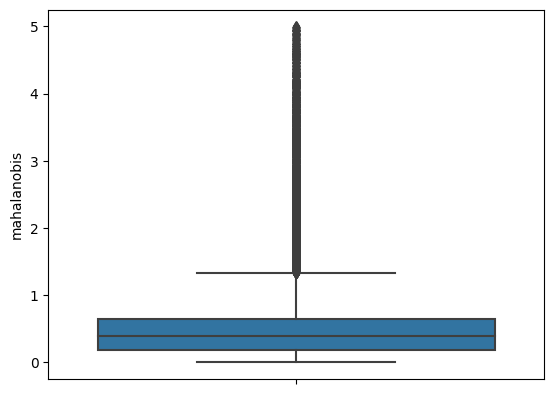

In [191]:
sns.boxplot(y=mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] < umbral].mahalanobis)

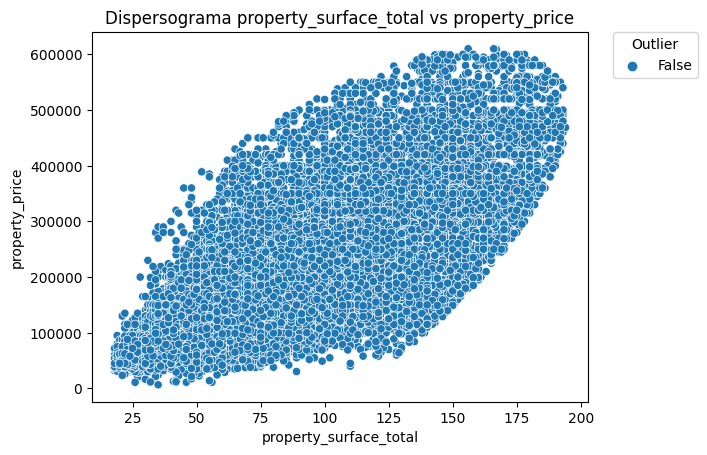

In [192]:
create_scattergram(mahalanobis_price_surface_train[mahalanobis_price_surface_train.mahalanobis < 3],
                   'property_surface_total',
                   'property_price', 3)

In [193]:
mahalanobis_price_surface_train[
    'price_m2'] = mahalanobis_price_surface_train.property_price / mahalanobis_price_surface_train.property_surface_total

mahalanobis_price_surface_test[
    'price_m2'] = mahalanobis_price_surface_test.property_price / mahalanobis_price_surface_test.property_surface_total

cantidad de datos del ds: 73049
outliers encontrados para los price_m2: 3387
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4284.482758620689, limite inf: 325.86206896551744


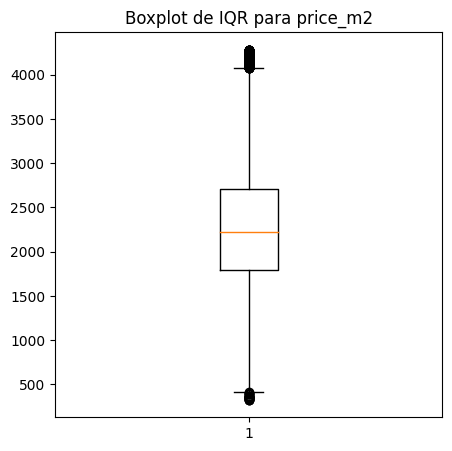

cantidad de datos del ds: 17688
outliers encontrados para los price_m2: 824
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4272.52816020025, limite inf: 330.100125156446


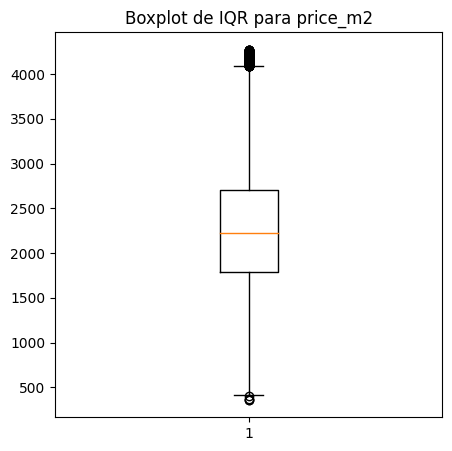

In [194]:
calculate_univariate_iqr(mahalanobis_price_surface_train['price_m2'], mahalanobis_price_surface_train)
calculate_univariate_iqr(mahalanobis_price_surface_test['price_m2'], mahalanobis_price_surface_test)

Hay 3361 registros en train por encima del límite superior en train (4.601021232323509)
Hay 26 registros en train por debajo del límite inferior en train  (0.03559254746813782)
Hay 816 registros en train por encima del límite superior en train (1.1170584128461718)%
Hay 5 registros en train por debajo del límite inferior en train  (0.006844720666949582%)


Text(0.5, 1.0, 'Distribución sin outliers')

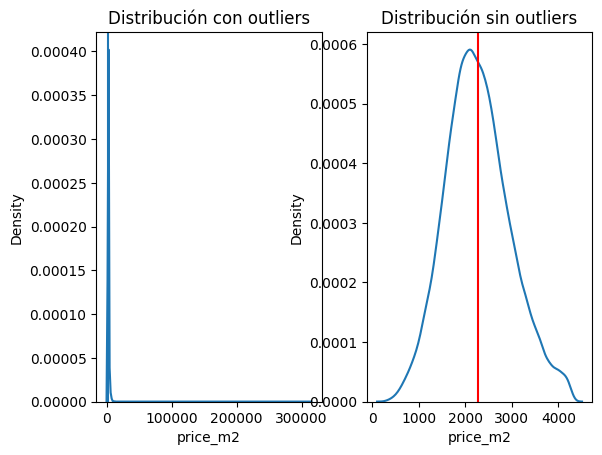

In [195]:
limites = boxplot_outliers_edges(mahalanobis_price_surface_train['price_m2'])
limite_inf = limites[0]
limite_sup = limites[1]
outliers_sup_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 > limite_sup)]
outliers_inf_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 < limite_inf)]

outliers_sup_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 > limite_sup)]
outliers_inf_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 < limite_inf)]

print(
    f"Hay {len(outliers_sup_price_m2_train)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_train) * 100 / len(ds_train)})")
print(
    f"Hay {len(outliers_inf_price_m2_train)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_train) * 100 / len(ds_train)})")

print(
    f"Hay {len(outliers_sup_price_m2_test)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_test) * 100 / len(ds_train)})%")
print(
    f"Hay {len(outliers_inf_price_m2_test)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_test) * 100 / len(ds_train)}%)")

fig, axs = plt.subplots(ncols=2)

ds_plot = mahalanobis_price_surface_train[
    (mahalanobis_price_surface_train.price_m2 > limite_inf) & (mahalanobis_price_surface_train.price_m2 < limite_sup)]

sns.kdeplot(mahalanobis_price_surface_train.price_m2, ax=axs[0])
sns.kdeplot(ds_plot.price_m2, ax=axs[1])

axs[0].axvline(mahalanobis_price_surface_train.price_m2.mean())
axs[1].axvline(ds_plot.price_m2.mean(), color='red')

axs[0].set_title("Distribución con outliers")
axs[1].set_title("Distribución sin outliers")

In [196]:
# Train

ds_train.drop(outliers_sup_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_sup_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_test)} registros en test")

Se han eliminado: 3361 registros en train
Se han eliminado: 816 registros en test


In [197]:
# Train

ds_train.drop(outliers_inf_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_inf_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_test)} registros en test")

Se han eliminado: 26 registros en train
Se han eliminado: 5 registros en test


#### LOF

In [198]:
def create_scores_based_on_training(dataset, col1, col2):
    #Conjunto de entrenamiento
    dataset = dataset[~(dataset[f'{col1}'].isna())]  # que hago con los NAN? Para la preddicion necesito sacarlos.
    dataset = dataset[~(dataset[f'{col2}'].isna())]

    X = dataset[[f'{col1}', f'{col2}']].values

    #Creo el clasificador
    clf = LocalOutlierFactor(n_neighbors=20)

    #Genero prediccion
    y_pred = clf.fit_predict(X)

    #Guardo los scores
    dataset['scores'] = clf.negative_outlier_factor_

    return dataset.copy()

In [199]:
def create_dispersion_diagram(dataset, col1, col2):
    new_lof_ds = dataset.copy()
    new_lof_ds['target'] = 0
    new_col_ds = new_lof_ds
    new_col_ds[[f'{col1}', f'{col2}', 'target']]

    sns.scatterplot(x=new_col_ds[f'{col1}'], y=new_col_ds[f'{col2}'], hue=new_col_ds['target'])
    plt.title(f'Diagrama de Dispersión {col1} vs {col2}')
    plt.show()
    return new_lof_ds

In [200]:
def create_lof_graph(dataset, col1, col2):
    #Calculo radio para plotear score
    radius = (dataset.scores.max() - dataset.scores) / (dataset.scores.max() - dataset.scores.min())

    #Grafico LOF
    plt.figure(figsize=(10, 10))
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, edgecolor='grey', s=30, label='Datos',
                facecolors='none')
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, s=1300 * radius, edgecolors='red',
                facecolors='none', label='Outlier scores')
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

**Analisis de outliers para ambientes y habitaciones**

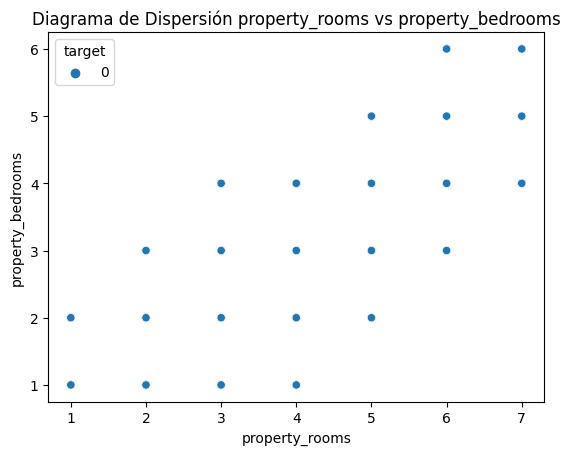

In [201]:
rooms_bedrooms_lof_df = create_dispersion_diagram(ds_train, 'property_rooms', 'property_bedrooms')

In [202]:
new_rooms_bedrooms_lof_df = create_scores_based_on_training(rooms_bedrooms_lof_df, 'property_rooms',
                                                            'property_bedrooms')
new_rooms_bedrooms_lof_df

id start_date                      end_date  \
246905  T1d2uwg2mrb8jlndfZTy5w== 2021-10-08 2022-02-20 00:00:00.000000000   
214507  SNtdz2yZJ9bFEKtLVfMdGQ== 2021-12-27 2022-01-27 00:00:00.000000000   
410704  1d/ZXQI90kkVumA6Q4kFog== 2021-03-02 2021-04-20 00:00:00.000000000   
137149  tj3+Udsk+N3j9Tc4sgViMQ== 2021-01-22 2021-06-30 00:00:00.000000000   
310802  izBngRb9/lTBT7mrPh5JIw== 2021-09-01 2021-09-02 00:00:00.000000000   
...                          ...        ...                           ...   
169912  HYD5mYaP6gMtpqNmeSL2Mg== 2021-07-28 2021-07-31 00:00:00.000000000   
192135  WqWwLIpVRuq68AxOTka6zQ== 2021-07-11 2021-09-23 07:47:58.182328191   
449809  UL4QDZmrD+er+85yJyRxGg== 2021-12-16 2022-02-09 00:00:00.000000000   
87771   f7ohX5CYmOcqbjqgijHaQg== 2021-11-11 2022-01-27 00:00:00.000000000   
72569   U3jrFxYITX6tfIp1y8/O8w== 2021-05-29 2021-06-19 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
246905 -34.613560 -58.436845      Caballito  Departamento             4.0   
214507 -34.608650 -58.408870      Balvanera  Departamento             4.0   
410704 -34.625915 -58.520649      Versalles          Casa             3.0   
137149 -34.582098 -58.448859        Palermo  Departamento             2.0   
310802 -34.578438 -58.462492  Villa Ortuzar  Departamento             4.0   
...           ...        ...            ...           ...             ...   
169912 -34.582722 -58.414936        Palermo  Departamento             4.0   
192135 -34.625197 -58.392171  San Cristobal  Departamento             1.0   
449809 -34.605126 -58.418537        Almagro            PH             4.0   
87771  -34.572106 -58.434114        Palermo  Departamento             2.0   
72569  -34.574388 -58.448728     Colegiales  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
246905                3.0                    72.0                      72.0   
214507                3.0                   107.0                     103.0   
410704                2.0                   151.0                     151.0   
137149                1.0                    55.0                      50.0   
310802                3.0                    79.0                      79.0   
...                   ...                     ...                       ...   
169912                3.0                   181.0                     171.0   
192135                1.0                    38.0                      35.0   
449809                3.0                    58.0                      58.0   
87771                 1.0                    44.0                      42.0   
72569                 2.0                    70.0                      56.0   

        property_price                                     property_title  \
246905        127000.0  RECICLADO A NUEVO!! Hermoso Departamento 4 Amb...   
214507        165000.0  Departamento 4 Amb c/dep.serv al Frente c/Coch...   
410704        155000.0           CASA A RECICLAR - EN VENTA - VERSALLES!    
137149        142298.0                   Venta - Newbery Jorge  3445 5º A   
310802        167900.0     VENTA DEPARTAMENTO 4 AMBIENTES - VILLA ORTUZAR   
...                ...                                                ...   
169912        580000.0  VENTA DEPARTAMENTO 4 AMBIENTES PALERMO COCHERA...   
192135         79000.0                       Departamento - San Cristobal   
449809        122000.0                  VENTA DE PH EN ZONA PLAZA ALMAGRO   
87771         130000.0             Departamento - 2 Ambientes Las Cañitas   
72569         160749.0     Wel.Venta.Departamento. 3 ambientes.Colegiales   

        target  scores  
246905       0    -1.0  
214507       0    -1.0  
410704       0    -1.0  
137149       0    -1.0  
310802       0    -1.0  
...        ...     ...  
169912       0    -1.0  
192135       0    -1.0  
449809       0    -1.0  
87771        0    -1.0  
72569        0    -1.0  

[6966

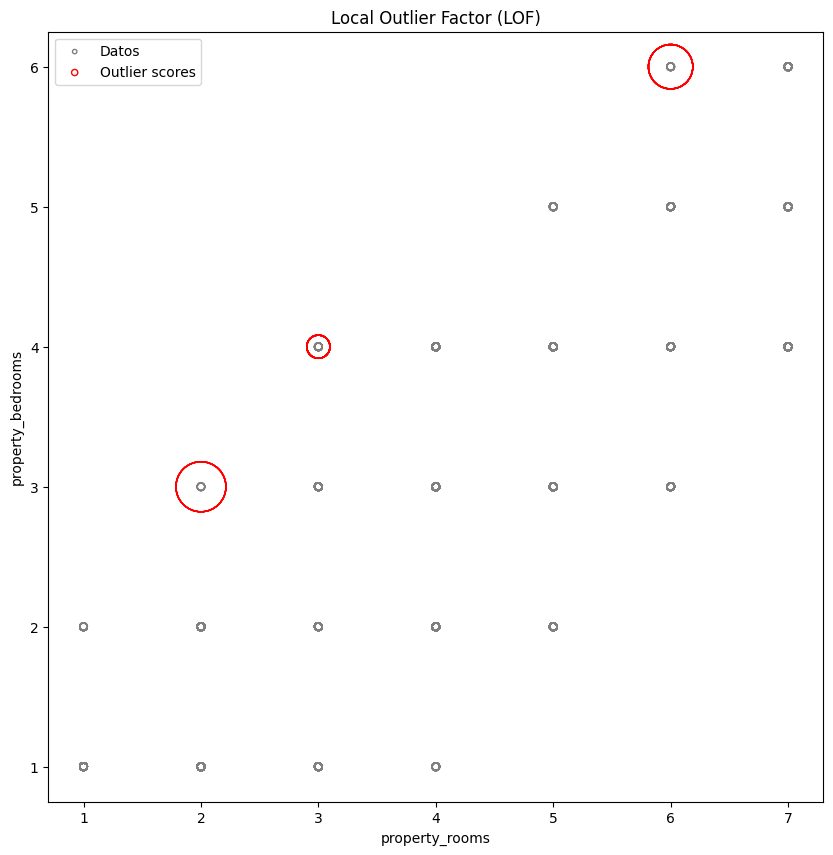

In [203]:
create_lof_graph(new_rooms_bedrooms_lof_df, 'property_rooms', 'property_bedrooms')

**Analisis de outliers para superficie total y superficie cubierta**

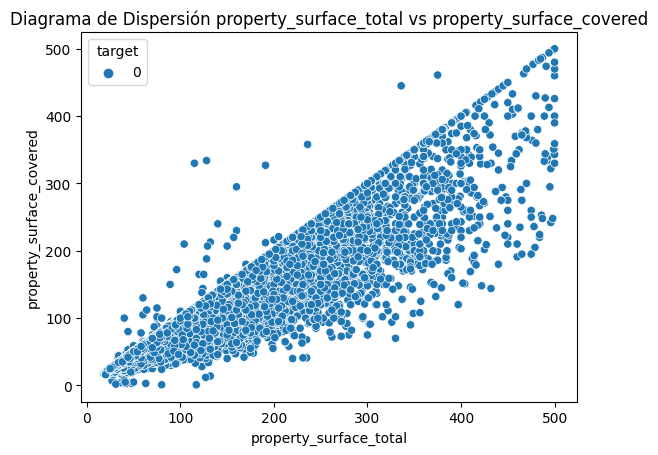

In [204]:
total_covered_lof_df = create_dispersion_diagram(ds_train, 'property_surface_total',
                                                 'property_surface_covered')

In [205]:
new_total_covered_lof_df = create_scores_based_on_training(total_covered_lof_df, 'property_surface_total',
                                                           'property_surface_covered')
new_total_covered_lof_df

id start_date                      end_date  \
246905  T1d2uwg2mrb8jlndfZTy5w== 2021-10-08 2022-02-20 00:00:00.000000000   
214507  SNtdz2yZJ9bFEKtLVfMdGQ== 2021-12-27 2022-01-27 00:00:00.000000000   
410704  1d/ZXQI90kkVumA6Q4kFog== 2021-03-02 2021-04-20 00:00:00.000000000   
137149  tj3+Udsk+N3j9Tc4sgViMQ== 2021-01-22 2021-06-30 00:00:00.000000000   
310802  izBngRb9/lTBT7mrPh5JIw== 2021-09-01 2021-09-02 00:00:00.000000000   
...                          ...        ...                           ...   
169912  HYD5mYaP6gMtpqNmeSL2Mg== 2021-07-28 2021-07-31 00:00:00.000000000   
192135  WqWwLIpVRuq68AxOTka6zQ== 2021-07-11 2021-09-23 07:47:58.182328191   
449809  UL4QDZmrD+er+85yJyRxGg== 2021-12-16 2022-02-09 00:00:00.000000000   
87771   f7ohX5CYmOcqbjqgijHaQg== 2021-11-11 2022-01-27 00:00:00.000000000   
72569   U3jrFxYITX6tfIp1y8/O8w== 2021-05-29 2021-06-19 00:00:00.000000000   

          latitud   longitud       place_l3 property_type  property_rooms  \
246905 -34.613560 -58.436845      Caballito  Departamento             4.0   
214507 -34.608650 -58.408870      Balvanera  Departamento             4.0   
410704 -34.625915 -58.520649      Versalles          Casa             3.0   
137149 -34.582098 -58.448859        Palermo  Departamento             2.0   
310802 -34.578438 -58.462492  Villa Ortuzar  Departamento             4.0   
...           ...        ...            ...           ...             ...   
169912 -34.582722 -58.414936        Palermo  Departamento             4.0   
192135 -34.625197 -58.392171  San Cristobal  Departamento             1.0   
449809 -34.605126 -58.418537        Almagro            PH             4.0   
87771  -34.572106 -58.434114        Palermo  Departamento             2.0   
72569  -34.574388 -58.448728     Colegiales  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
246905                3.0                    72.0                      72.0   
214507                3.0                   107.0                     103.0   
410704                2.0                   151.0                     151.0   
137149                1.0                    55.0                      50.0   
310802                3.0                    79.0                      79.0   
...                   ...                     ...                       ...   
169912                3.0                   181.0                     171.0   
192135                1.0                    38.0                      35.0   
449809                3.0                    58.0                      58.0   
87771                 1.0                    44.0                      42.0   
72569                 2.0                    70.0                      56.0   

        property_price                                     property_title  \
246905        127000.0  RECICLADO A NUEVO!! Hermoso Departamento 4 Amb...   
214507        165000.0  Departamento 4 Amb c/dep.serv al Frente c/Coch...   
410704        155000.0           CASA A RECICLAR - EN VENTA - VERSALLES!    
137149        142298.0                   Venta - Newbery Jorge  3445 5º A   
310802        167900.0     VENTA DEPARTAMENTO 4 AMBIENTES - VILLA ORTUZAR   
...                ...                                                ...   
169912        580000.0  VENTA DEPARTAMENTO 4 AMBIENTES PALERMO COCHERA...   
192135         79000.0                       Departamento - San Cristobal   
449809        122000.0                  VENTA DE PH EN ZONA PLAZA ALMAGRO   
87771         130000.0             Departamento - 2 Ambientes Las Cañitas   
72569         160749.0     Wel.Venta.Departamento. 3 ambientes.Colegiales   

        target        scores  
246905       0 -1.000000e+00  
214507       0 -1.170702e+00  
410704       0 -2.745584e+09  
137149       0 -1.000000e+00  
310802       0 -1.000000e+00  
...        ...           ...  
169912       0 -1.011842e+00  
192135       0 -1.000000e+00  
449809       0 -1.000000e+0

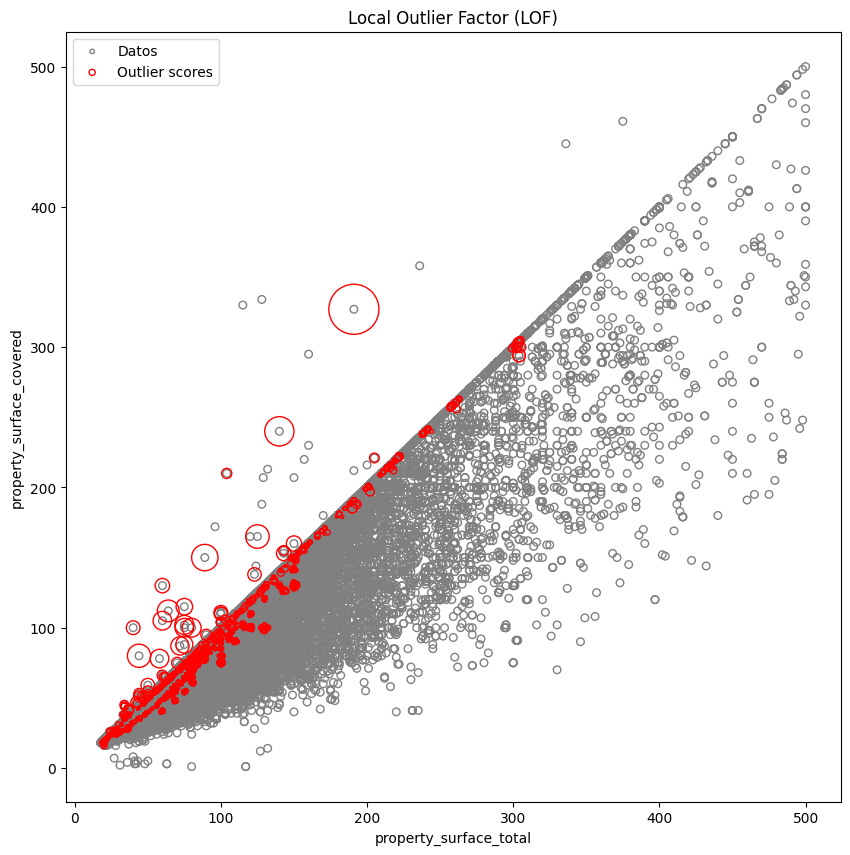

In [206]:
create_lof_graph(new_total_covered_lof_df, 'property_surface_total', 'property_surface_covered')

### Reduccion de la Dimensionalidad

#### Analisis PCA

In [207]:
# Train
ds_train.drop(columns=['id'], inplace=True)

# Test
ds_test.drop(columns=['id'], inplace=True)

In [208]:
from sklearn.preprocessing import StandardScaler

ds_reducido = ds_train.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido

latitud   longitud  property_rooms  property_bedrooms  \
246905 -34.613560 -58.436845             4.0                3.0   
214507 -34.608650 -58.408870             4.0                3.0   
410704 -34.625915 -58.520649             3.0                2.0   
137149 -34.582098 -58.448859             2.0                1.0   
310802 -34.578438 -58.462492             4.0                3.0   
...           ...        ...             ...                ...   
169912 -34.582722 -58.414936             4.0                3.0   
192135 -34.625197 -58.392171             1.0                1.0   
449809 -34.605126 -58.418537             4.0                3.0   
87771  -34.572106 -58.434114             2.0                1.0   
72569  -34.574388 -58.448728             3.0                2.0   

        property_surface_total  property_surface_covered  
246905                    72.0                      72.0  
214507                   107.0                     103.0  
410704                   151.0                     151.0  
137149                    55.0                      50.0  
310802                    79.0                      79.0  
...                        ...                       ...  
169912                   181.0                     171.0  
192135                    38.0                      35.0  
449809                    58.0                      58.0  
87771                     44.0                      42.0  
72569                     70.0                      56.0  

[69662 rows x 6 columns]

In [209]:
ds_reducido_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido), columns=ds_reducido.columns)
ds_reducido_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -0.649849  0.084157        1.038870           1.237354   
1     -0.463729  0.834139        1.038870           1.237354   
2     -1.118145 -2.162585        0.225589           0.173462   
3      0.542668 -0.237953       -0.587691          -0.890430   
4      0.681397 -0.603435        1.038870           1.237354   
...         ...       ...             ...                ...   
69657  0.519028  0.671519        1.038870           1.237354   
69658 -1.090926  1.281822       -1.400971          -0.890430   
69659 -0.330163  0.574967        1.038870           1.237354   
69660  0.921407  0.157376       -0.587691          -0.890430   
69661  0.834893 -0.234425        0.225589           0.173462   

       property_surface_total  property_surface_covered  
0                   -0.168367                  0.017259  
1                    0.403214                  0.631746  
2                    1.121772                  1.583210  
3                   -0.445991                 -0.418828  
4                   -0.054051                  0.156014  
...                       ...                       ...  
69657                1.611698                  1.979653  
69658               -0.723616                 -0.716161  
69659               -0.396999                 -0.260251  
69660               -0.625631                 -0.577405  
69661               -0.201028                 -0.299895  

[69662 rows x 6 columns]

**Replicamos para test las mismas transformaciones**

In [210]:
ds_reducido_test = ds_test.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido_test

latitud   longitud  property_rooms  property_bedrooms  \
22637  -34.630964 -58.465666             3.0                2.0   
365457 -34.596589 -58.410986             3.0                2.0   
26147  -34.596549 -58.403133             6.0                4.0   
358999 -34.619609 -58.400149             1.0                1.0   
69561  -34.580743 -58.411841             2.0                1.0   
...           ...        ...             ...                ...   
314526 -34.577094 -58.465333             5.0                3.0   
352849 -34.593539 -58.402114             6.0                3.0   
205270 -34.550719 -58.456377             2.0                1.0   
40998  -34.603496 -58.379792             1.0                1.0   
39812  -34.603665 -58.377891             1.0                1.0   

        property_surface_total  property_surface_covered  
22637                     74.0                      60.0  
365457                    64.0                      57.0  
26147                    210.0                     195.0  
358999                    24.0                      24.0  
69561                     43.0                      43.0  
...                        ...                       ...  
314526                   180.0                     140.0  
352849                   178.0                     163.0  
205270                    68.0                      48.0  
40998                     24.0                      24.0  
39812                     24.0                      24.0  

[16867 rows x 6 columns]

In [211]:
ds_reducido_test_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido_test),
                                            columns=ds_reducido.columns)
ds_reducido_test_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -1.313488 -0.676293        0.221806           0.170456   
1     -0.012646  0.785587        0.221806           0.170456   
2     -0.011130  0.995529        2.647482           2.294636   
3     -0.883770  1.075312       -1.395311          -0.891634   
4      0.587036  0.762738       -0.586753          -0.891634   
...         ...       ...             ...                ...   
16862  0.725126 -0.667390        1.838923           1.232546   
16863  0.102785  1.022771        2.647482           1.232546   
16864  1.723251 -0.427945       -0.586753          -0.891634   
16865 -0.274028  1.619557       -1.395311          -0.891634   
16866 -0.280412  1.670386       -1.395311          -0.891634   

       property_surface_total  property_surface_covered  
0                   -0.138042                 -0.219246  
1                   -0.302063                 -0.279155  
2                    2.092649                  2.476649  
3                   -0.958149                 -0.938152  
4                   -0.646508                 -0.558730  
...                       ...                       ...  
16862                1.600585                  1.378321  
16863                1.567781                  1.837622  
16864               -0.236455                 -0.458882  
16865               -0.958149                 -0.938152  
16866               -0.958149                 -0.938152  

[16867 rows x 6 columns]

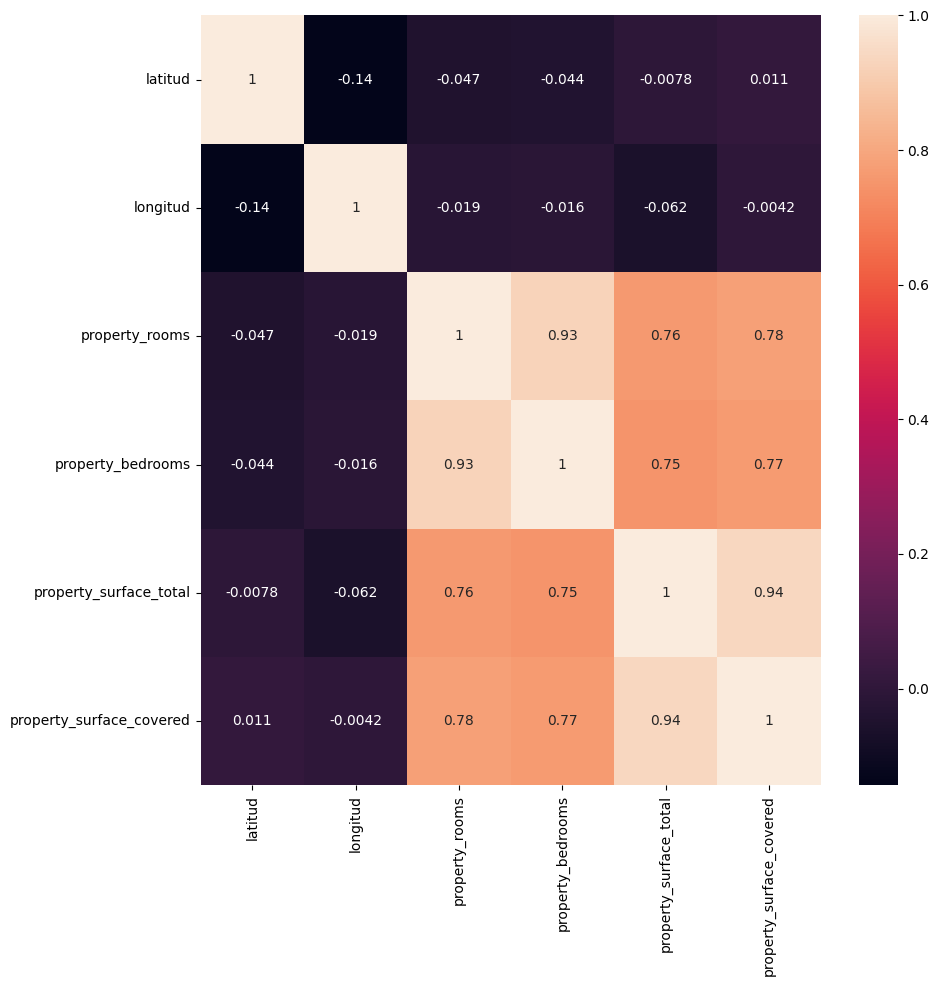

In [212]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ds_reducido_normalizado.corr(), annot=True)

In [213]:
ds_reducido_normalizado.shape

(69662, 6)

In [214]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
superficie_transformada = pca.fit_transform(ds_reducido_normalizado)

ds_pca = pd.DataFrame(data=superficie_transformada,
                      columns=['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5', 'cp_6'])
ds_pca

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6
0      1.068917  0.596887  0.421920 -1.171520  0.110360  0.082534
1      1.645417  0.959054 -0.285216 -0.590669  0.126612  0.096751
2      1.615903 -0.790968  2.207022  1.191984  0.012570  0.494184
3     -1.174060 -0.572179 -0.197934  0.270684 -0.209712  0.038056
4      1.187167 -0.836103 -0.035356 -1.154603  0.110750  0.104559
...         ...       ...       ...       ...       ...       ...
69657  2.913172  0.076635 -0.958465  0.597457  0.164135  0.228521
69658 -1.872062  1.644885 -0.117824  0.514464  0.369402 -0.000025
69659  0.800431  0.730159 -0.129995 -1.440328  0.099487  0.008066
69660 -1.357349 -0.551873 -0.732163  0.077513 -0.217759  0.019156
69661 -0.061242 -0.730089 -0.393362 -0.509234 -0.053221 -0.098309

[69662 rows x 6 columns]

In [215]:
varianza_explicada = pca.explained_variance_ratio_
for varianza in varianza_explicada:
    print(round(varianza, 2))

0.58
0.19
0.14
0.07
0.01
0.01


In [216]:
varianza_explicada.cumsum()

array([0.57723976, 0.76839471, 0.911284  , 0.97884393, 0.99077775,
       1.        ])

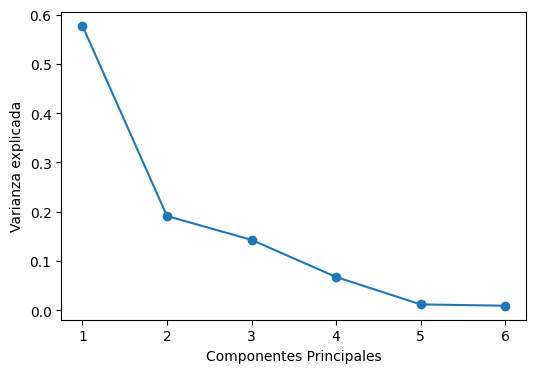

In [217]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

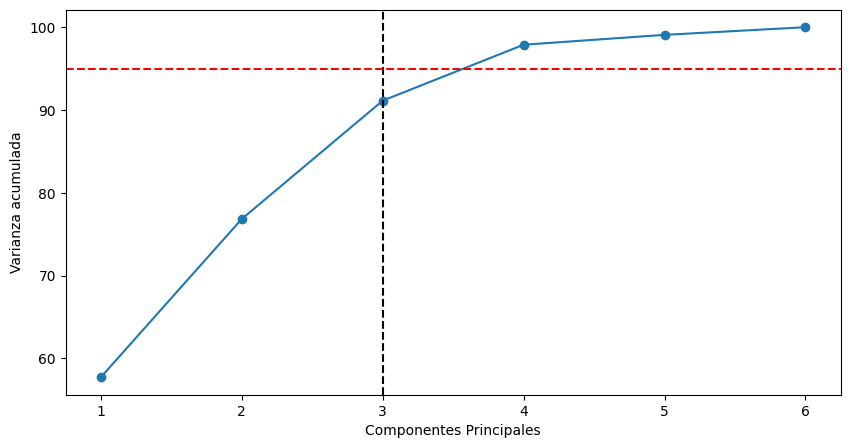

In [218]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))
k = np.argmax(varianza_explicada.cumsum() * 100 > 95)

plt.figure(figsize=(10, 5))
plt.plot(list_x, varianza_explicada.cumsum() * 100, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza acumulada')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

In [219]:
ds_pca.drop(columns=['cp_4', 'cp_5', 'cp_6'], inplace=True)
ds_pca.head()

cp_1      cp_2      cp_3
0  1.068917  0.596887  0.421920
1  1.645417  0.959054 -0.285216
2  1.615903 -0.790968  2.207022
3 -1.174060 -0.572179 -0.197934
4  1.187167 -0.836103 -0.035356

### Exportamos datasets

In [220]:
ds_test = ds_test.drop(['start_date', 'end_date'], axis=1)
ds_train = ds_train.drop(['start_date', 'end_date'], axis=1)

In [221]:
ds_train.to_csv('datasets/tp1-train.csv')
ds_test.to_csv('datasets/tp1-test.csv')